In [1]:
import sys
sys.path.append("../")
sys.path.append("../fedml_api/standalone/flofa/elastic_nn/")

In [2]:
import time
import torch
import random
import argparse

import numpy as np
import pandas as pd

from load_model import load_model
from evaluate import evaluate
from load_data import dataset

INFO:root:*********partition data***************


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:N = 50000
INFO:root:traindata_cls_counts = {0: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}}


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:train_dl_global number = 782
INFO:root:test_dl_global number = 157
INFO:root:client_idx = 0, local_sample_number = 50000


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 0, batch_num_train_local = 782, batch_num_test_local = 157


In [3]:
CKPT_PATH = './best_checkpoint_supernet.pt'

batch_size = 64

# Setting random seed
random_seed = 0
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
print('Successfully imported all packages and configured random seed to %d!' % random_seed)

def cuda_time() -> float:
    torch.cuda.synchronize()
    return time.perf_counter()

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
torch.cuda.manual_seed(random_seed)

Successfully imported all packages and configured random seed to 0!


In [4]:
model = load_model(CKPT_PATH, dataset)

cpu_device = 'cpu'
gpu_device = 'cuda:0'

In [5]:
import json
 
# Opening JSON file
f = open('acc_dataset_resnet10_26.json')
data = json.load(f)

In [6]:
supernet = model.model

In [7]:
print(supernet)

OFAResNets32x32_10_26(
  (input_stem): ModuleList(
    (0): DynamicConvLayer(
      (conv): DynamicConv2d(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
      )
      (bn): DynamicBatchNorm2d(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (act): ReLU(inplace=True)
    )
  )
  (blocks): ModuleList(
    (0): DynamicResidualBlock(
      (conv1): Sequential(
        (conv): DynamicConv2d(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
        )
        (bn): DynamicBatchNorm2d(
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (act): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (conv): DynamicConv2d(
          (conv): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
        )
        (bn): DynamicBatchNorm2d(
          (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

In [8]:
point_cloud_dataset_gpu = {}
print(len(data))
for i, arch in enumerate(data):
    supernet.set_active_subnet(**json.loads(arch.replace("'", '"')))
    acc, gpu_lat = evaluate(supernet, dataset, gpu_device)
    point_cloud_dataset_gpu[arch] = (data[arch], gpu_lat)
    print(arch, point_cloud_dataset_gpu[arch])
    if i % 10 == 0:
        print(f"{(100*(i/len(data)))}% complete")
        

5000
{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} (0.9156, 22.755784634500742)
0.0% complete
{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} (0.8927, 6.663691531866789)
{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} (0.9023, 9.987093228846788)
{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} (0.9092, 14.58260528743267)
{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} (0.9125, 19.152809027582407)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.22, 0.18, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9076, 15.330765582621098)
{'d': [1, 0, 0, 0], 'e': [0.22, 0.1, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.25, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9004, 9.679062850773335)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.1, 0.25, 0.22, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9015, 9.58031453192234)
{'d': [2, 0, 1, 0], 'e': [0.1, 0.18, 0.25, 0.1, 0.1, 0.18, 0.14, 0.14, 0.25, 0.18, 0.18, 0.22], 'k

{'d': [1, 2, 1, 1], 'e': [0.22, 0.1, 0.25, 0.22, 0.14, 0.22, 0.25, 0.1, 0.14, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 15.624348912388086)
{'d': [2, 1, 1, 2], 'e': [0.1, 0.18, 0.1, 0.22, 0.1, 0.18, 0.14, 0.22, 0.22, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 17.062577977776527)
{'d': [2, 0, 2, 2], 'e': [0.22, 0.22, 0.25, 0.14, 0.1, 0.1, 0.25, 0.18, 0.18, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9087, 16.503162868320942)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.22, 0.14, 0.18, 0.22, 0.14, 0.25, 0.14, 0.22, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.8983, 9.974255412817001)
{'d': [2, 1, 0, 1], 'e': [0.18, 0.25, 0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.18, 0.18, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.907, 15.034074801951647)
1.2% complete
{'d': [2, 0, 2, 0], 'e': [0.18, 0.1, 0.14, 0.22, 0.25, 0.14, 0.22, 0.25, 0.14, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.908, 14.13763016462326)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.25, 0.18, 0.25, 0.22, 0.18, 0.22, 0.25, 0

{'d': [1, 2, 1, 1], 'e': [0.14, 0.1, 0.22, 0.14, 0.25, 0.22, 0.18, 0.22, 0.18, 0.22, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9126, 15.307537466287613)
2.1999999999999997% complete
{'d': [2, 2, 2, 1], 'e': [0.25, 0.14, 0.14, 0.22, 0.14, 0.18, 0.25, 0.14, 0.25, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9143, 19.431061670184135)
{'d': [0, 0, 0, 2], 'e': [0.22, 0.25, 0.1, 0.14, 0.18, 0.22, 0.1, 0.1, 0.14, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.8977, 10.629661660641432)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.22, 0.22, 0.18, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9021, 11.47801885381341)
{'d': [2, 2, 0, 0], 'e': [0.14, 0.22, 0.14, 0.18, 0.14, 0.14, 0.22, 0.14, 0.25, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.908, 15.314371418207884)
{'d': [1, 1, 2, 1], 'e': [0.25, 0.1, 0.22, 0.18, 0.18, 0.25, 0.14, 0.1, 0.18, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 14.677988551557064)
{'d': [2, 2, 0, 2], 'e': [0.1, 0.25, 0.18, 0.25, 0.22

{'d': [2, 2, 2, 2], 'e': [0.25, 0.14, 0.1, 0.25, 0.1, 0.25, 0.14, 0.1, 0.22, 0.18, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9098, 20.5602103844285)
{'d': [1, 2, 2, 2], 'e': [0.14, 0.25, 0.22, 0.18, 0.18, 0.18, 0.25, 0.18, 0.1, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9125, 17.052299343049526)
{'d': [2, 1, 0, 2], 'e': [0.22, 0.22, 0.14, 0.18, 0.18, 0.14, 0.1, 0.14, 0.18, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9068, 16.02945141494274)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.14, 0.18, 0.22, 0.1, 0.18, 0.22, 0.25, 0.18, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9051, 14.13606395944953)
{'d': [0, 1, 0, 2], 'e': [0.18, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.14, 0.18, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9018, 12.071690056473017)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.22, 0.14, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9078, 13.153723999857903)
{'d': [2, 2, 1, 1], 'e': [0.18, 0.1, 0.1, 0.22, 0.18, 0.14, 0.22, 0.14, 0.22, 0.25, 0.1, 

{'d': [1, 1, 2, 1], 'e': [0.1, 0.14, 0.1, 0.14, 0.25, 0.1, 0.1, 0.18, 0.1, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9112, 14.071295317262411)
{'d': [1, 1, 2, 1], 'e': [0.14, 0.14, 0.14, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9067, 14.944478310644627)
{'d': [0, 1, 1, 2], 'e': [0.14, 0.25, 0.18, 0.25, 0.18, 0.22, 0.25, 0.25, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9072, 14.993297215551138)
4.3999999999999995% complete
{'d': [0, 2, 1, 2], 'e': [0.25, 0.18, 0.22, 0.22, 0.1, 0.25, 0.18, 0.18, 0.1, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 14.942186418920755)
{'d': [0, 2, 1, 2], 'e': [0.1, 0.18, 0.22, 0.1, 0.25, 0.1, 0.22, 0.14, 0.18, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.906, 14.82849670574069)
{'d': [1, 1, 2, 2], 'e': [0.1, 0.25, 0.25, 0.25, 0.18, 0.1, 0.18, 0.1, 0.14, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9087, 17.343389615416527)
{'d': [1, 2, 1, 0], 'e': [0.18, 0.22, 0.1, 0.1, 0.14, 0.25, 0.

{'d': [1, 2, 1, 1], 'e': [0.25, 0.14, 0.25, 0.14, 0.25, 0.18, 0.1, 0.14, 0.1, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.912, 16.23899033293128)
{'d': [0, 0, 1, 0], 'e': [0.18, 0.22, 0.1, 0.1, 0.1, 0.14, 0.22, 0.1, 0.1, 0.22, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9028, 8.455571345984936)
{'d': [1, 1, 0, 2], 'e': [0.1, 0.18, 0.14, 0.22, 0.14, 0.14, 0.14, 0.14, 0.25, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.903, 13.959055487066507)
{'d': [2, 2, 2, 0], 'e': [0.14, 0.22, 0.18, 0.1, 0.22, 0.18, 0.1, 0.25, 0.14, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9097, 16.91764323040843)
{'d': [1, 1, 0, 0], 'e': [0.14, 0.18, 0.1, 0.1, 0.18, 0.22, 0.22, 0.25, 0.18, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9073, 11.387497466057539)
{'d': [1, 1, 0, 0], 'e': [0.25, 0.18, 0.14, 0.1, 0.1, 0.1, 0.1, 0.14, 0.18, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.904, 10.420124419033527)
{'d': [1, 1, 1, 1], 'e': [0.25, 0.25, 0.1, 0.14, 0.25, 0.1, 0.18, 0.18, 0.18, 0.18, 0.1, 0.1], 'ks

{'d': [0, 1, 2, 0], 'e': [0.1, 0.22, 0.1, 0.25, 0.22, 0.18, 0.14, 0.18, 0.25, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9047, 11.22677680104971)
{'d': [0, 0, 2, 0], 'e': [0.14, 0.25, 0.1, 0.22, 0.18, 0.18, 0.22, 0.18, 0.1, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9025, 9.517541620880365)
{'d': [0, 0, 1, 2], 'e': [0.25, 0.22, 0.1, 0.22, 0.25, 0.18, 0.25, 0.14, 0.18, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9029, 11.116686929017305)
{'d': [0, 1, 2, 1], 'e': [0.14, 0.18, 0.14, 0.14, 0.22, 0.22, 0.14, 0.25, 0.14, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9073, 13.590917643159628)
{'d': [1, 2, 2, 0], 'e': [0.22, 0.22, 0.14, 0.25, 0.1, 0.18, 0.25, 0.25, 0.1, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9099, 15.333386417478323)
6.6000000000000005% complete
{'d': [2, 0, 0, 2], 'e': [0.1, 0.1, 0.18, 0.18, 0.1, 0.18, 0.22, 0.1, 0.22, 0.22, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9011, 14.765896927565336)
{'d': [2, 2, 1, 2], 'e': [0.25, 0.14, 0.25, 0.1, 0.18, 0.22,

{'d': [1, 0, 0, 1], 'e': [0.14, 0.25, 0.18, 0.22, 0.18, 0.1, 0.1, 0.14, 0.25, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9011, 10.70998515933752)
{'d': [0, 1, 2, 2], 'e': [0.25, 0.14, 0.14, 0.22, 0.1, 0.22, 0.22, 0.1, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9085, 13.171286042779684)
7.6% complete
{'d': [1, 1, 0, 2], 'e': [0.22, 0.14, 0.1, 0.1, 0.1, 0.1, 0.22, 0.25, 0.1, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9055, 13.751572370529175)
{'d': [0, 2, 0, 2], 'e': [0.18, 0.1, 0.18, 0.1, 0.1, 0.22, 0.18, 0.1, 0.22, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.903, 13.400885928422213)
{'d': [2, 0, 0, 0], 'e': [0.14, 0.14, 0.18, 0.14, 0.1, 0.14, 0.14, 0.1, 0.18, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9043, 12.110063713043928)
{'d': [1, 1, 1, 1], 'e': [0.18, 0.14, 0.25, 0.1, 0.22, 0.18, 0.18, 0.25, 0.1, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9101, 14.456655643880367)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.1, 0.1, 0.18, 0.18, 0.14, 0.25, 0.25, 0.22, 0

{'d': [0, 0, 1, 0], 'e': [0.1, 0.25, 0.1, 0.14, 0.25, 0.1, 0.14, 0.22, 0.25, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9016, 8.634180016815662)
{'d': [1, 2, 1, 1], 'e': [0.14, 0.22, 0.1, 0.18, 0.25, 0.22, 0.25, 0.22, 0.25, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9143, 15.777956414967775)
{'d': [1, 0, 2, 1], 'e': [0.25, 0.18, 0.1, 0.14, 0.14, 0.14, 0.22, 0.1, 0.1, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9051, 13.647195976227522)
{'d': [1, 2, 0, 1], 'e': [0.25, 0.18, 0.14, 0.14, 0.25, 0.25, 0.18, 0.18, 0.25, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9083, 14.148214645683765)
{'d': [1, 2, 0, 1], 'e': [0.22, 0.22, 0.22, 0.22, 0.18, 0.1, 0.14, 0.25, 0.25, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.907, 15.171637758612633)
{'d': [2, 0, 1, 2], 'e': [0.18, 0.1, 0.1, 0.1, 0.14, 0.18, 0.14, 0.1, 0.14, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9047, 14.584534242749214)
{'d': [0, 2, 2, 2], 'e': [0.14, 0.22, 0.25, 0.1, 0.18, 0.14, 0.25, 0.22, 0.18, 0.1, 0.1, 

{'d': [2, 2, 2, 0], 'e': [0.25, 0.1, 0.18, 0.25, 0.1, 0.22, 0.18, 0.18, 0.22, 0.14, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9135, 16.947515215724707)
{'d': [1, 2, 0, 2], 'e': [0.1, 0.25, 0.14, 0.22, 0.14, 0.14, 0.1, 0.22, 0.14, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9043, 15.601918008178473)
{'d': [0, 1, 1, 1], 'e': [0.25, 0.18, 0.22, 0.25, 0.1, 0.25, 0.25, 0.18, 0.1, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9046, 11.859612725675106)
{'d': [2, 1, 1, 1], 'e': [0.18, 0.14, 0.25, 0.1, 0.25, 0.22, 0.1, 0.25, 0.1, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9102, 15.397894755005836)
9.8% complete
{'d': [1, 2, 0, 0], 'e': [0.14, 0.18, 0.22, 0.14, 0.1, 0.22, 0.1, 0.22, 0.22, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9053, 12.703170627355576)
{'d': [0, 0, 0, 1], 'e': [0.1, 0.1, 0.22, 0.18, 0.18, 0.1, 0.18, 0.22, 0.22, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8955, 8.682796824723482)
{'d': [0, 2, 0, 0], 'e': [0.25, 0.1, 0.14, 0.22, 0.1, 0.1, 0.25, 0.25, 0.14, 0.1

{'d': [0, 0, 2, 2], 'e': [0.18, 0.18, 0.25, 0.25, 0.22, 0.1, 0.25, 0.1, 0.1, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9039, 13.375908322632313)
{'d': [1, 2, 1, 0], 'e': [0.25, 0.18, 0.18, 0.18, 0.25, 0.18, 0.22, 0.25, 0.14, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9114, 14.826574455946684)
{'d': [1, 2, 0, 0], 'e': [0.18, 0.25, 0.18, 0.25, 0.14, 0.1, 0.14, 0.18, 0.18, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9063, 12.412018328905106)
{'d': [0, 0, 0, 1], 'e': [0.22, 0.14, 0.25, 0.25, 0.1, 0.18, 0.1, 0.1, 0.25, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9003, 8.933366555720568)
{'d': [1, 2, 1, 0], 'e': [0.18, 0.18, 0.22, 0.25, 0.25, 0.25, 0.14, 0.25, 0.18, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9114, 14.907663501799107)
{'d': [0, 1, 0, 0], 'e': [0.22, 0.18, 0.14, 0.1, 0.22, 0.22, 0.1, 0.18, 0.14, 0.25, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9033, 9.208291862159967)
{'d': [1, 2, 0, 0], 'e': [0.25, 0.25, 0.1, 0.1, 0.1, 0.25, 0.1, 0.25, 0.14, 0.22, 0.1

{'d': [0, 2, 2, 0], 'e': [0.1, 0.22, 0.22, 0.22, 0.1, 0.22, 0.14, 0.22, 0.22, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9076, 12.379476428031921)
{'d': [2, 1, 2, 0], 'e': [0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.22, 0.14, 0.14, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.91, 14.895393420010805)
{'d': [2, 1, 1, 0], 'e': [0.1, 0.22, 0.14, 0.18, 0.25, 0.14, 0.18, 0.22, 0.22, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9105, 14.742063079029322)
{'d': [0, 2, 2, 1], 'e': [0.14, 0.1, 0.18, 0.14, 0.25, 0.25, 0.18, 0.14, 0.14, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 14.882707875221968)
{'d': [0, 2, 2, 2], 'e': [0.14, 0.14, 0.25, 0.1, 0.18, 0.14, 0.1, 0.1, 0.25, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9078, 15.296400617808104)
{'d': [2, 0, 1, 0], 'e': [0.18, 0.22, 0.22, 0.1, 0.1, 0.22, 0.25, 0.18, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9086, 13.14265625551343)
{'d': [0, 1, 0, 2], 'e': [0.1, 0.25, 0.14, 0.14, 0.18, 0.18, 0.14, 0.22, 0.25, 0.18, 0.1

{'d': [2, 1, 2, 2], 'e': [0.1, 0.1, 0.22, 0.18, 0.1, 0.18, 0.14, 0.22, 0.14, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9084, 17.889948282390833)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.18, 0.22, 0.14, 0.25, 0.18, 0.25, 0.1, 0.22, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8966, 7.846392411738634)
{'d': [1, 2, 1, 1], 'e': [0.25, 0.14, 0.25, 0.14, 0.22, 0.1, 0.18, 0.18, 0.22, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9116, 15.760499611496925)
13.0% complete
{'d': [2, 2, 2, 2], 'e': [0.1, 0.14, 0.18, 0.1, 0.22, 0.18, 0.25, 0.22, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9127, 20.074381306767464)
{'d': [2, 0, 2, 2], 'e': [0.1, 0.22, 0.25, 0.14, 0.14, 0.18, 0.18, 0.1, 0.18, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9048, 16.437181271612644)
{'d': [2, 2, 0, 0], 'e': [0.14, 0.25, 0.14, 0.25, 0.22, 0.1, 0.25, 0.22, 0.18, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9095, 15.430517215281725)
{'d': [2, 2, 2, 0], 'e': [0.14, 0.22, 0.25, 0.1, 0.14, 0.18, 0.25, 0.18

{'d': [1, 2, 0, 0], 'e': [0.18, 0.25, 0.14, 0.1, 0.22, 0.25, 0.1, 0.14, 0.18, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.908, 13.126265350729227)
{'d': [2, 0, 0, 2], 'e': [0.25, 0.22, 0.14, 0.18, 0.22, 0.22, 0.22, 0.1, 0.22, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9023, 16.440349258482456)
{'d': [1, 0, 1, 2], 'e': [0.18, 0.1, 0.14, 0.1, 0.14, 0.1, 0.14, 0.1, 0.25, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9031, 14.18005283921957)
{'d': [1, 2, 1, 0], 'e': [0.25, 0.14, 0.1, 0.1, 0.25, 0.1, 0.14, 0.22, 0.1, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9113, 13.416111934930086)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.25, 0.14, 0.25, 0.18, 0.18, 0.18, 0.18, 0.14, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9074, 13.542237784713507)
{'d': [1, 1, 1, 1], 'e': [0.25, 0.25, 0.1, 0.25, 0.1, 0.18, 0.18, 0.14, 0.25, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9085, 14.295451622456312)
{'d': [2, 0, 0, 1], 'e': [0.14, 0.14, 0.1, 0.25, 0.25, 0.25, 0.14, 0.22, 0.25, 0.18, 0.1, 

{'d': [2, 1, 1, 0], 'e': [0.18, 0.25, 0.25, 0.1, 0.18, 0.22, 0.18, 0.25, 0.25, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9129, 14.631364215165377)
{'d': [2, 0, 2, 1], 'e': [0.25, 0.14, 0.14, 0.22, 0.14, 0.18, 0.25, 0.1, 0.1, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9074, 14.672587811946869)
{'d': [2, 0, 1, 1], 'e': [0.1, 0.25, 0.22, 0.14, 0.25, 0.25, 0.18, 0.18, 0.14, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9039, 14.16638856753707)
{'d': [2, 1, 0, 0], 'e': [0.22, 0.22, 0.14, 0.25, 0.18, 0.22, 0.14, 0.25, 0.1, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9079, 13.867963291704655)
{'d': [1, 2, 1, 2], 'e': [0.25, 0.14, 0.25, 0.25, 0.25, 0.18, 0.14, 0.14, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9124, 18.64538285881281)
{'d': [0, 1, 0, 0], 'e': [0.22, 0.22, 0.25, 0.22, 0.22, 0.25, 0.14, 0.22, 0.22, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9045, 9.304685890674591)
15.2% complete
{'d': [1, 2, 2, 0], 'e': [0.14, 0.14, 0.14, 0.18, 0.25, 0.25, 0.22, 0

{'d': [0, 2, 1, 0], 'e': [0.18, 0.14, 0.22, 0.25, 0.18, 0.25, 0.25, 0.1, 0.1, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9079, 11.989396531134844)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.1, 0.14, 0.25, 0.25, 0.1, 0.22, 0.1, 0.18, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9056, 12.837331555783749)
16.2% complete
{'d': [0, 2, 1, 2], 'e': [0.1, 0.25, 0.14, 0.14, 0.18, 0.18, 0.14, 0.22, 0.18, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.907, 15.362008567899466)
{'d': [0, 0, 2, 0], 'e': [0.14, 0.18, 0.25, 0.25, 0.22, 0.25, 0.18, 0.1, 0.14, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9025, 9.544115886092186)
{'d': [0, 2, 0, 2], 'e': [0.25, 0.1, 0.25, 0.14, 0.14, 0.22, 0.1, 0.25, 0.18, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9046, 13.69846174493432)
{'d': [1, 0, 2, 0], 'e': [0.22, 0.14, 0.14, 0.1, 0.14, 0.25, 0.25, 0.1, 0.1, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 11.49094169959426)
{'d': [0, 1, 2, 1], 'e': [0.25, 0.1, 0.22, 0.1, 0.14, 0.14, 0.25, 0.25, 0.2

{'d': [2, 1, 0, 1], 'e': [0.18, 0.18, 0.14, 0.14, 0.1, 0.25, 0.14, 0.18, 0.18, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9062, 14.223263319581747)
{'d': [2, 2, 1, 1], 'e': [0.18, 0.22, 0.25, 0.14, 0.1, 0.22, 0.18, 0.18, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9115, 17.974882666021585)
{'d': [2, 2, 2, 1], 'e': [0.14, 0.18, 0.1, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.18, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9119, 19.223696272820234)
{'d': [2, 0, 1, 1], 'e': [0.14, 0.22, 0.22, 0.22, 0.1, 0.1, 0.14, 0.18, 0.18, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 14.388661086559296)
{'d': [0, 1, 2, 1], 'e': [0.25, 0.1, 0.1, 0.1, 0.14, 0.1, 0.25, 0.1, 0.25, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9069, 13.149234838783741)
{'d': [1, 1, 2, 2], 'e': [0.1, 0.1, 0.22, 0.25, 0.18, 0.22, 0.25, 0.18, 0.1, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9078, 17.02034818008542)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.25, 0.14, 0.1, 0.1, 0.1, 0.25, 0.25, 0.25, 0.14, 0.25,

{'d': [1, 0, 0, 1], 'e': [0.18, 0.25, 0.18, 0.18, 0.22, 0.1, 0.1, 0.18, 0.25, 0.25, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9027, 11.321237124502659)
{'d': [2, 2, 0, 1], 'e': [0.14, 0.14, 0.14, 0.14, 0.1, 0.18, 0.1, 0.18, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9066, 16.57743602991104)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.14, 0.14, 0.22, 0.14, 0.1, 0.22, 0.25, 0.14, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9062, 12.187707982957363)
{'d': [0, 0, 0, 0], 'e': [0.14, 0.14, 0.14, 0.25, 0.14, 0.1, 0.18, 0.18, 0.22, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.8972, 7.899187039583921)
18.4% complete
{'d': [2, 0, 2, 0], 'e': [0.18, 0.14, 0.1, 0.22, 0.18, 0.14, 0.25, 0.14, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9087, 13.96704027429223)
{'d': [1, 0, 1, 0], 'e': [0.14, 0.25, 0.22, 0.14, 0.25, 0.25, 0.14, 0.18, 0.1, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9054, 10.975665785372257)
{'d': [1, 2, 2, 1], 'e': [0.18, 0.25, 0.25, 0.1, 0.25, 0.18, 0.1, 0.1

{'d': [2, 0, 2, 0], 'e': [0.14, 0.18, 0.14, 0.22, 0.25, 0.25, 0.22, 0.22, 0.14, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9076, 14.648411609232426)
{'d': [2, 2, 0, 0], 'e': [0.1, 0.14, 0.22, 0.22, 0.14, 0.25, 0.22, 0.1, 0.14, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9085, 15.159111749380827)
{'d': [1, 2, 0, 1], 'e': [0.18, 0.25, 0.18, 0.25, 0.14, 0.22, 0.18, 0.22, 0.1, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9087, 14.515918772667646)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.1, 0.18, 0.1, 0.22, 0.1, 0.25, 0.25, 0.25, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.8976, 9.20784417539835)
{'d': [1, 0, 2, 0], 'e': [0.22, 0.22, 0.14, 0.25, 0.18, 0.25, 0.18, 0.18, 0.18, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9076, 12.686678022146225)
{'d': [0, 0, 2, 1], 'e': [0.25, 0.25, 0.18, 0.22, 0.22, 0.22, 0.1, 0.14, 0.18, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9042, 11.927471216768026)
{'d': [1, 0, 2, 2], 'e': [0.22, 0.22, 0.1, 0.22, 0.18, 0.1, 0.18, 0.25, 0.1, 0.22,

{'d': [2, 1, 2, 0], 'e': [0.18, 0.22, 0.22, 0.14, 0.1, 0.22, 0.22, 0.18, 0.18, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9101, 15.446959994733334)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.1, 0.25, 0.25, 0.22, 0.14, 0.22, 0.18, 0.22, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9045, 9.779230691492558)
{'d': [1, 1, 2, 2], 'e': [0.22, 0.25, 0.14, 0.1, 0.22, 0.14, 0.14, 0.1, 0.22, 0.25, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9102, 16.7629255913198)
{'d': [2, 2, 1, 1], 'e': [0.1, 0.14, 0.25, 0.18, 0.22, 0.22, 0.22, 0.18, 0.22, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9118, 18.73229742050171)
{'d': [2, 0, 0, 1], 'e': [0.22, 0.14, 0.1, 0.18, 0.25, 0.18, 0.14, 0.14, 0.22, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9013, 13.49985720589757)
{'d': [1, 0, 1, 2], 'e': [0.18, 0.25, 0.18, 0.1, 0.18, 0.14, 0.25, 0.14, 0.25, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.906, 14.557014778256416)
20.599999999999998% complete
{'d': [1, 0, 1, 2], 'e': [0.14, 0.22, 0.14, 0.1, 0.25, 0.

{'d': [1, 0, 2, 2], 'e': [0.18, 0.14, 0.18, 0.14, 0.18, 0.25, 0.1, 0.18, 0.25, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9065, 15.963580925017595)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.25, 0.18, 0.22, 0.14, 0.14, 0.1, 0.25, 0.14, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9013, 7.687139045447111)
21.6% complete
{'d': [2, 2, 0, 2], 'e': [0.14, 0.14, 0.22, 0.22, 0.14, 0.1, 0.22, 0.18, 0.22, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9056, 18.693590722978115)
{'d': [1, 2, 2, 2], 'e': [0.14, 0.22, 0.22, 0.25, 0.1, 0.22, 0.22, 0.22, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9113, 18.319122679531574)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.18, 0.25, 0.18, 0.18, 0.1, 0.14, 0.25, 0.25, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9091, 13.007799442857504)
{'d': [0, 1, 2, 2], 'e': [0.18, 0.14, 0.22, 0.18, 0.14, 0.1, 0.1, 0.25, 0.22, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 13.346267491579056)
{'d': [1, 1, 2, 2], 'e': [0.1, 0.22, 0.1, 0.1, 0.1, 0.22, 0.22, 0.25, 

{'d': [0, 2, 1, 0], 'e': [0.22, 0.14, 0.22, 0.25, 0.22, 0.1, 0.14, 0.18, 0.1, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 11.719981767237186)
{'d': [2, 0, 2, 1], 'e': [0.25, 0.1, 0.1, 0.25, 0.25, 0.25, 0.18, 0.1, 0.25, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9046, 15.778136067092419)
{'d': [0, 2, 2, 0], 'e': [0.1, 0.14, 0.22, 0.25, 0.18, 0.22, 0.22, 0.25, 0.1, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9076, 13.039485644549131)
{'d': [1, 1, 2, 2], 'e': [0.18, 0.25, 0.14, 0.25, 0.22, 0.22, 0.22, 0.22, 0.14, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9118, 17.055215407162905)
{'d': [1, 2, 2, 0], 'e': [0.18, 0.22, 0.1, 0.18, 0.1, 0.25, 0.14, 0.22, 0.1, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9111, 15.064697712659836)
{'d': [1, 0, 1, 0], 'e': [0.22, 0.18, 0.14, 0.18, 0.25, 0.1, 0.14, 0.14, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.904, 11.117839440703392)
{'d': [0, 2, 1, 2], 'e': [0.18, 0.22, 0.25, 0.25, 0.18, 0.25, 0.18, 0.18, 0.22, 0.14,

{'d': [1, 2, 1, 1], 'e': [0.18, 0.18, 0.18, 0.22, 0.18, 0.1, 0.18, 0.25, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9106, 16.289810184389353)
{'d': [2, 0, 2, 1], 'e': [0.14, 0.14, 0.22, 0.22, 0.14, 0.18, 0.18, 0.14, 0.14, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9082, 15.172082744538784)
{'d': [2, 2, 1, 2], 'e': [0.22, 0.18, 0.1, 0.18, 0.14, 0.18, 0.25, 0.14, 0.25, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9114, 19.726018141955137)
{'d': [1, 0, 1, 0], 'e': [0.14, 0.14, 0.22, 0.1, 0.25, 0.25, 0.22, 0.22, 0.14, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9071, 10.423195362091064)
23.799999999999997% complete
{'d': [1, 0, 2, 2], 'e': [0.14, 0.1, 0.14, 0.18, 0.18, 0.14, 0.22, 0.25, 0.1, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9065, 13.61786164343357)
{'d': [2, 0, 0, 2], 'e': [0.22, 0.18, 0.14, 0.22, 0.25, 0.1, 0.14, 0.14, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9015, 15.925737842917442)
{'d': [1, 2, 2, 1], 'e': [0.1, 0.14, 0.14, 0.18, 0.14, 0

{'d': [0, 2, 1, 1], 'e': [0.14, 0.14, 0.14, 0.25, 0.14, 0.18, 0.1, 0.22, 0.25, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9101, 13.595188688486814)
{'d': [0, 0, 2, 0], 'e': [0.18, 0.1, 0.18, 0.14, 0.14, 0.22, 0.18, 0.18, 0.1, 0.18, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9032, 9.605004079639912)
{'d': [2, 2, 1, 2], 'e': [0.1, 0.25, 0.25, 0.22, 0.14, 0.14, 0.22, 0.25, 0.25, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9133, 19.40826876088977)
{'d': [1, 0, 2, 0], 'e': [0.14, 0.1, 0.1, 0.22, 0.18, 0.22, 0.1, 0.1, 0.25, 0.22, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.903, 11.646357644349337)
{'d': [1, 2, 0, 2], 'e': [0.14, 0.14, 0.1, 0.14, 0.1, 0.14, 0.18, 0.25, 0.25, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9076, 15.219926182180643)
{'d': [1, 2, 2, 2], 'e': [0.18, 0.22, 0.18, 0.1, 0.14, 0.22, 0.22, 0.25, 0.1, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9122, 17.96259395778179)
{'d': [2, 0, 1, 2], 'e': [0.18, 0.22, 0.18, 0.1, 0.22, 0.22, 0.18, 0.22, 0.22, 0.1, 0.1

{'d': [1, 1, 1, 2], 'e': [0.14, 0.14, 0.25, 0.18, 0.1, 0.14, 0.18, 0.25, 0.14, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9089, 15.174137242138386)
{'d': [0, 2, 1, 1], 'e': [0.18, 0.14, 0.14, 0.18, 0.1, 0.18, 0.1, 0.18, 0.22, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9101, 12.832703348249197)
{'d': [0, 0, 1, 0], 'e': [0.18, 0.14, 0.22, 0.18, 0.14, 0.14, 0.18, 0.1, 0.14, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9026, 8.655061013996601)
{'d': [2, 0, 0, 0], 'e': [0.14, 0.25, 0.18, 0.1, 0.25, 0.18, 0.1, 0.18, 0.14, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9018, 11.937680840492249)
{'d': [0, 2, 0, 0], 'e': [0.1, 0.1, 0.14, 0.1, 0.1, 0.22, 0.22, 0.22, 0.18, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9022, 10.183363407850266)
{'d': [2, 0, 0, 0], 'e': [0.25, 0.18, 0.22, 0.22, 0.14, 0.14, 0.18, 0.25, 0.1, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9047, 12.712364830076694)
26.0% complete
{'d': [1, 0, 1, 0], 'e': [0.1, 0.14, 0.18, 0.18, 0.14, 0.22, 0.18, 0

{'d': [1, 0, 1, 1], 'e': [0.22, 0.14, 0.25, 0.25, 0.25, 0.14, 0.14, 0.25, 0.18, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 13.043620809912682)
{'d': [2, 2, 0, 1], 'e': [0.25, 0.25, 0.22, 0.1, 0.25, 0.1, 0.25, 0.18, 0.22, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 17.232761345803738)
27.0% complete
{'d': [2, 0, 1, 2], 'e': [0.14, 0.22, 0.25, 0.25, 0.22, 0.18, 0.14, 0.18, 0.25, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9075, 17.364533245563507)
{'d': [2, 2, 1, 0], 'e': [0.1, 0.18, 0.18, 0.18, 0.22, 0.14, 0.22, 0.14, 0.1, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9119, 16.320334747433662)
{'d': [0, 1, 2, 0], 'e': [0.22, 0.25, 0.18, 0.1, 0.22, 0.25, 0.25, 0.18, 0.18, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9083, 11.599511932581663)
{'d': [1, 2, 1, 2], 'e': [0.25, 0.18, 0.14, 0.18, 0.22, 0.18, 0.1, 0.25, 0.25, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9128, 17.462583724409342)
{'d': [0, 2, 2, 2], 'e': [0.25, 0.25, 0.25, 0.14, 0.1, 0.22, 0.1,

{'d': [2, 0, 1, 0], 'e': [0.18, 0.22, 0.14, 0.1, 0.14, 0.1, 0.18, 0.14, 0.22, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9064, 13.093185611069202)
{'d': [0, 2, 1, 2], 'e': [0.22, 0.22, 0.22, 0.25, 0.1, 0.14, 0.25, 0.22, 0.22, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9069, 15.884638577699661)
{'d': [0, 0, 1, 0], 'e': [0.14, 0.1, 0.25, 0.18, 0.14, 0.25, 0.25, 0.14, 0.1, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9034, 8.504529483616352)
{'d': [2, 1, 0, 1], 'e': [0.14, 0.1, 0.1, 0.1, 0.25, 0.1, 0.22, 0.22, 0.25, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.906, 13.503405265510082)
{'d': [1, 1, 2, 2], 'e': [0.14, 0.25, 0.14, 0.25, 0.25, 0.1, 0.14, 0.1, 0.18, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9096, 16.73387447372079)
{'d': [1, 2, 2, 2], 'e': [0.25, 0.18, 0.1, 0.25, 0.1, 0.18, 0.14, 0.1, 0.1, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9096, 16.502755600959063)
{'d': [0, 1, 2, 2], 'e': [0.18, 0.14, 0.1, 0.18, 0.18, 0.18, 0.18, 0.1, 0.1, 0.25, 0.25, 0.1

{'d': [0, 0, 2, 1], 'e': [0.14, 0.18, 0.14, 0.18, 0.1, 0.18, 0.18, 0.18, 0.22, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9029, 11.943555995821953)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.14, 0.1, 0.1, 0.14, 0.22, 0.1, 0.25, 0.22, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9109, 12.933460716158152)
{'d': [2, 1, 2, 1], 'e': [0.22, 0.14, 0.22, 0.14, 0.22, 0.25, 0.22, 0.25, 0.1, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9139, 16.91539203748107)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.18, 0.18, 0.1, 0.22, 0.25, 0.14, 0.14, 0.1, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9033, 9.371769241988659)
{'d': [1, 0, 2, 0], 'e': [0.25, 0.1, 0.18, 0.18, 0.14, 0.1, 0.1, 0.14, 0.14, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.905, 11.493686493486166)
29.2% complete
{'d': [1, 2, 2, 2], 'e': [0.14, 0.1, 0.22, 0.25, 0.25, 0.18, 0.1, 0.14, 0.14, 0.18, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9109, 18.00579633563757)
{'d': [1, 0, 1, 0], 'e': [0.22, 0.14, 0.14, 0.1, 0.25, 0.25, 0.22, 0.14, 

{'d': [0, 2, 2, 2], 'e': [0.1, 0.1, 0.22, 0.1, 0.22, 0.22, 0.25, 0.25, 0.22, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9068, 16.95832321420312)
30.2% complete
{'d': [2, 1, 0, 2], 'e': [0.18, 0.22, 0.14, 0.22, 0.22, 0.14, 0.22, 0.22, 0.14, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9086, 17.31323478743434)
{'d': [2, 2, 0, 1], 'e': [0.18, 0.25, 0.22, 0.18, 0.25, 0.1, 0.25, 0.22, 0.25, 0.18, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9082, 17.48685436323285)
{'d': [2, 1, 1, 1], 'e': [0.22, 0.25, 0.25, 0.25, 0.22, 0.22, 0.25, 0.1, 0.22, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9118, 17.397322040051222)
{'d': [2, 0, 0, 0], 'e': [0.18, 0.1, 0.1, 0.25, 0.1, 0.1, 0.14, 0.14, 0.22, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9029, 11.547019146382809)
{'d': [1, 1, 2, 1], 'e': [0.25, 0.1, 0.18, 0.14, 0.1, 0.22, 0.25, 0.1, 0.14, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.908, 13.663505762815475)
{'d': [2, 2, 2, 2], 'e': [0.1, 0.22, 0.18, 0.22, 0.22, 0.1, 0.18, 0.14, 0

{'d': [2, 2, 1, 1], 'e': [0.1, 0.22, 0.1, 0.14, 0.18, 0.18, 0.25, 0.22, 0.25, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9136, 17.753761168569326)
{'d': [0, 0, 2, 2], 'e': [0.25, 0.1, 0.22, 0.1, 0.1, 0.25, 0.1, 0.22, 0.14, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9035, 12.401480041444302)
{'d': [1, 1, 0, 0], 'e': [0.22, 0.14, 0.1, 0.18, 0.14, 0.22, 0.18, 0.18, 0.22, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 11.178908869624138)
{'d': [2, 1, 1, 2], 'e': [0.1, 0.22, 0.22, 0.18, 0.25, 0.18, 0.14, 0.18, 0.22, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9105, 17.939140554517508)
{'d': [0, 1, 2, 2], 'e': [0.14, 0.22, 0.18, 0.25, 0.14, 0.1, 0.22, 0.25, 0.22, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9072, 15.090055856853724)
{'d': [2, 1, 1, 2], 'e': [0.14, 0.22, 0.22, 0.25, 0.1, 0.1, 0.25, 0.1, 0.18, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9103, 16.719998698681593)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.14, 0.18, 0.25, 0.22, 0.18, 0.25, 0.18, 0.14, 0.14, 0.

{'d': [0, 0, 0, 1], 'e': [0.1, 0.1, 0.25, 0.18, 0.25, 0.14, 0.18, 0.14, 0.14, 0.14, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.8971, 9.426017571240664)
{'d': [2, 0, 2, 1], 'e': [0.1, 0.1, 0.1, 0.22, 0.18, 0.22, 0.18, 0.14, 0.18, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9054, 15.453888103365898)
{'d': [2, 2, 2, 0], 'e': [0.22, 0.14, 0.14, 0.22, 0.22, 0.18, 0.14, 0.18, 0.22, 0.18, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9148, 17.796903010457754)
32.4% complete
{'d': [1, 2, 2, 2], 'e': [0.1, 0.25, 0.25, 0.22, 0.14, 0.14, 0.18, 0.14, 0.25, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9097, 19.087967462837696)
{'d': [2, 1, 2, 1], 'e': [0.1, 0.22, 0.1, 0.14, 0.1, 0.1, 0.18, 0.1, 0.18, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9091, 16.405188385397196)
{'d': [1, 2, 2, 2], 'e': [0.18, 0.14, 0.25, 0.14, 0.14, 0.14, 0.1, 0.14, 0.25, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9127, 17.798439878970385)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.25, 0.18, 0.1, 0.25, 0.1, 0.14, 0.

{'d': [2, 1, 1, 1], 'e': [0.14, 0.14, 0.14, 0.18, 0.25, 0.25, 0.1, 0.22, 0.22, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9112, 16.531957779079676)
{'d': [1, 0, 2, 1], 'e': [0.14, 0.25, 0.18, 0.25, 0.22, 0.18, 0.25, 0.25, 0.1, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.906, 13.452805485576391)
{'d': [0, 1, 2, 2], 'e': [0.25, 0.1, 0.25, 0.1, 0.25, 0.25, 0.14, 0.22, 0.14, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9069, 13.422228768467903)
{'d': [0, 1, 1, 1], 'e': [0.22, 0.14, 0.1, 0.25, 0.14, 0.22, 0.14, 0.1, 0.22, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9064, 11.507259216159582)
{'d': [0, 2, 1, 1], 'e': [0.22, 0.25, 0.25, 0.25, 0.14, 0.25, 0.18, 0.25, 0.25, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9085, 14.084192179143429)
{'d': [1, 1, 1, 1], 'e': [0.22, 0.25, 0.1, 0.25, 0.18, 0.18, 0.1, 0.25, 0.18, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9101, 13.650813791900873)
{'d': [1, 2, 1, 0], 'e': [0.22, 0.25, 0.14, 0.14, 0.22, 0.1, 0.18, 0.1, 0.25, 0.18, 0.

{'d': [0, 2, 1, 2], 'e': [0.25, 0.1, 0.18, 0.14, 0.1, 0.18, 0.18, 0.22, 0.1, 0.18, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9062, 15.51597062498331)
{'d': [2, 1, 0, 1], 'e': [0.14, 0.18, 0.22, 0.18, 0.18, 0.1, 0.14, 0.18, 0.14, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.907, 15.81944851204753)
{'d': [0, 2, 1, 1], 'e': [0.18, 0.25, 0.22, 0.14, 0.22, 0.18, 0.25, 0.14, 0.22, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9093, 14.222682546824217)
{'d': [0, 0, 2, 1], 'e': [0.1, 0.18, 0.14, 0.22, 0.25, 0.14, 0.22, 0.18, 0.18, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9026, 12.079259660094976)
{'d': [1, 0, 2, 0], 'e': [0.25, 0.25, 0.14, 0.22, 0.1, 0.25, 0.22, 0.25, 0.18, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9077, 12.644381262362003)
34.599999999999994% complete
{'d': [2, 0, 2, 2], 'e': [0.25, 0.18, 0.22, 0.14, 0.22, 0.22, 0.14, 0.1, 0.25, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9065, 17.330408096313477)
{'d': [1, 0, 2, 1], 'e': [0.22, 0.18, 0.22, 0.18, 0.

{'d': [2, 0, 2, 0], 'e': [0.22, 0.1, 0.25, 0.14, 0.1, 0.18, 0.22, 0.18, 0.1, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.906, 13.475459441542625)
35.6% complete
{'d': [1, 2, 2, 0], 'e': [0.22, 0.22, 0.22, 0.25, 0.14, 0.14, 0.1, 0.22, 0.14, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9139, 15.071035735309124)
{'d': [2, 1, 1, 0], 'e': [0.18, 0.1, 0.25, 0.25, 0.14, 0.18, 0.1, 0.14, 0.14, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9115, 14.160689804702997)
{'d': [2, 0, 0, 2], 'e': [0.1, 0.25, 0.25, 0.1, 0.25, 0.25, 0.25, 0.22, 0.14, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9023, 15.560416504740715)
{'d': [0, 0, 0, 0], 'e': [0.14, 0.1, 0.25, 0.1, 0.1, 0.1, 0.22, 0.22, 0.14, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.8998, 7.559974677860737)
{'d': [0, 0, 0, 0], 'e': [0.1, 0.25, 0.25, 0.22, 0.25, 0.18, 0.14, 0.1, 0.14, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.8952, 7.702647894620895)
{'d': [0, 0, 0, 1], 'e': [0.14, 0.22, 0.25, 0.14, 0.1, 0.25, 0.1, 0.14, 0.1

{'d': [2, 2, 1, 0], 'e': [0.1, 0.14, 0.22, 0.25, 0.14, 0.22, 0.1, 0.25, 0.14, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9119, 16.45706705749035)
{'d': [2, 0, 0, 2], 'e': [0.25, 0.1, 0.25, 0.14, 0.14, 0.1, 0.14, 0.14, 0.18, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9024, 15.562679339200258)
{'d': [1, 0, 2, 0], 'e': [0.25, 0.14, 0.18, 0.14, 0.18, 0.25, 0.22, 0.1, 0.25, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9067, 12.117327470332384)
{'d': [0, 1, 1, 0], 'e': [0.22, 0.25, 0.18, 0.22, 0.25, 0.14, 0.1, 0.22, 0.14, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.908, 10.450439248234034)
{'d': [1, 1, 0, 0], 'e': [0.18, 0.14, 0.14, 0.14, 0.22, 0.14, 0.18, 0.18, 0.14, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9057, 11.23092444613576)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.22, 0.18, 0.14, 0.18, 0.14, 0.18, 0.1, 0.1, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9016, 9.403435792773962)
{'d': [2, 2, 0, 2], 'e': [0.18, 0.1, 0.22, 0.14, 0.14, 0.22, 0.18, 0.22, 0.18, 0.18, 0.

{'d': [1, 0, 2, 2], 'e': [0.18, 0.25, 0.22, 0.18, 0.18, 0.25, 0.25, 0.18, 0.22, 0.18, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9078, 15.538416523486376)
{'d': [0, 2, 2, 2], 'e': [0.18, 0.18, 0.1, 0.18, 0.1, 0.25, 0.1, 0.1, 0.1, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9091, 15.407111588865519)
{'d': [1, 0, 2, 0], 'e': [0.18, 0.25, 0.18, 0.14, 0.14, 0.14, 0.22, 0.25, 0.25, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9069, 12.312433868646622)
37.8% complete
{'d': [1, 0, 2, 2], 'e': [0.25, 0.22, 0.1, 0.22, 0.1, 0.25, 0.25, 0.22, 0.1, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9056, 15.248069074004889)
{'d': [1, 2, 1, 0], 'e': [0.14, 0.25, 0.1, 0.25, 0.1, 0.14, 0.18, 0.22, 0.25, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9098, 13.57883270829916)
{'d': [2, 1, 0, 1], 'e': [0.14, 0.25, 0.25, 0.1, 0.14, 0.1, 0.1, 0.22, 0.1, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9057, 15.091954171657562)
{'d': [2, 1, 1, 1], 'e': [0.18, 0.25, 0.14, 0.18, 0.18, 0.1, 0.18, 0.18, 0.

{'d': [2, 2, 1, 2], 'e': [0.14, 0.18, 0.1, 0.1, 0.14, 0.1, 0.18, 0.25, 0.18, 0.22, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9105, 19.338802807033062)
{'d': [0, 0, 0, 0], 'e': [0.18, 0.14, 0.25, 0.25, 0.22, 0.1, 0.22, 0.1, 0.1, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.8978, 7.708993181586266)
{'d': [0, 2, 1, 1], 'e': [0.1, 0.1, 0.14, 0.1, 0.22, 0.14, 0.18, 0.14, 0.1, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9058, 12.939636688679457)
{'d': [1, 2, 2, 0], 'e': [0.14, 0.18, 0.25, 0.14, 0.22, 0.1, 0.14, 0.18, 0.25, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9108, 14.729262329638004)
{'d': [2, 0, 0, 1], 'e': [0.22, 0.18, 0.18, 0.14, 0.25, 0.22, 0.25, 0.18, 0.25, 0.18, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9021, 13.377225119620562)
{'d': [0, 2, 2, 0], 'e': [0.14, 0.22, 0.1, 0.25, 0.14, 0.25, 0.1, 0.22, 0.25, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9094, 13.258500210940838)
{'d': [0, 0, 2, 1], 'e': [0.18, 0.25, 0.1, 0.18, 0.25, 0.18, 0.22, 0.25, 0.14, 0.18, 0.1,

{'d': [1, 1, 1, 0], 'e': [0.18, 0.14, 0.14, 0.14, 0.14, 0.22, 0.14, 0.14, 0.22, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9098, 11.908278334885836)
{'d': [1, 0, 1, 2], 'e': [0.22, 0.14, 0.14, 0.1, 0.14, 0.25, 0.14, 0.1, 0.25, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9036, 13.737296313047409)
{'d': [1, 2, 2, 2], 'e': [0.1, 0.1, 0.1, 0.18, 0.18, 0.18, 0.18, 0.25, 0.22, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9077, 18.541073985397816)
{'d': [1, 0, 2, 2], 'e': [0.25, 0.1, 0.14, 0.1, 0.14, 0.22, 0.25, 0.1, 0.25, 0.22, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9034, 15.578979067504406)
{'d': [0, 0, 0, 0], 'e': [0.14, 0.1, 0.14, 0.1, 0.22, 0.25, 0.1, 0.25, 0.1, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.8994, 7.054066751152277)
40.0% complete
{'d': [2, 0, 2, 2], 'e': [0.25, 0.18, 0.14, 0.25, 0.14, 0.18, 0.18, 0.22, 0.18, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9074, 18.707295693457127)
{'d': [2, 0, 2, 1], 'e': [0.22, 0.25, 0.25, 0.18, 0.18, 0.14, 0.25, 0.18

{'d': [1, 0, 2, 1], 'e': [0.22, 0.25, 0.22, 0.1, 0.14, 0.25, 0.25, 0.1, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9045, 13.955089263617992)
41.0% complete
{'d': [1, 2, 2, 0], 'e': [0.25, 0.18, 0.1, 0.22, 0.14, 0.25, 0.14, 0.22, 0.14, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9121, 15.311166271567345)
{'d': [2, 2, 0, 2], 'e': [0.18, 0.25, 0.14, 0.14, 0.1, 0.22, 0.18, 0.1, 0.14, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9104, 18.141302559524775)
{'d': [1, 1, 2, 0], 'e': [0.18, 0.18, 0.14, 0.14, 0.18, 0.22, 0.25, 0.25, 0.25, 0.22, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.911, 14.18814156204462)
{'d': [0, 2, 0, 2], 'e': [0.14, 0.14, 0.14, 0.1, 0.22, 0.14, 0.1, 0.14, 0.14, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9033, 14.10920200869441)
{'d': [2, 0, 1, 0], 'e': [0.18, 0.1, 0.25, 0.22, 0.22, 0.1, 0.14, 0.14, 0.22, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9073, 12.59086150676012)
{'d': [1, 0, 1, 2], 'e': [0.22, 0.1, 0.14, 0.14, 0.14, 0.18, 0.18, 0.1

{'d': [0, 0, 2, 1], 'e': [0.25, 0.22, 0.25, 0.25, 0.22, 0.14, 0.14, 0.22, 0.18, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9021, 12.389972154051065)
{'d': [0, 0, 0, 0], 'e': [0.1, 0.14, 0.22, 0.14, 0.25, 0.25, 0.18, 0.22, 0.14, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.8936, 7.416952587664127)
{'d': [2, 1, 0, 0], 'e': [0.18, 0.14, 0.22, 0.14, 0.14, 0.18, 0.25, 0.18, 0.25, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9097, 13.855577073991299)
{'d': [1, 1, 0, 0], 'e': [0.1, 0.22, 0.25, 0.1, 0.14, 0.18, 0.1, 0.18, 0.22, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9026, 10.919293202459812)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.1, 0.1, 0.18, 0.18, 0.18, 0.22, 0.22, 0.18, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9034, 10.283309314399958)
{'d': [1, 0, 1, 1], 'e': [0.18, 0.25, 0.1, 0.18, 0.1, 0.14, 0.25, 0.22, 0.18, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9078, 12.71590469405055)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.18, 0.1, 0.22, 0.18, 0.14, 0.22, 0.18, 0.22, 0.25,

{'d': [0, 0, 1, 0], 'e': [0.25, 0.25, 0.25, 0.14, 0.1, 0.18, 0.22, 0.14, 0.22, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9023, 8.950143400579691)
{'d': [2, 1, 1, 1], 'e': [0.25, 0.25, 0.18, 0.18, 0.22, 0.14, 0.22, 0.18, 0.25, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9143, 16.271573770791292)
{'d': [2, 1, 1, 1], 'e': [0.14, 0.1, 0.1, 0.22, 0.25, 0.25, 0.14, 0.22, 0.25, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9102, 16.081529390066862)
43.2% complete
{'d': [1, 0, 1, 0], 'e': [0.14, 0.1, 0.14, 0.14, 0.14, 0.22, 0.25, 0.14, 0.22, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.906, 10.132988542318344)
{'d': [2, 2, 0, 1], 'e': [0.1, 0.18, 0.25, 0.18, 0.14, 0.1, 0.22, 0.1, 0.22, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.907, 15.839052014052868)
{'d': [0, 1, 2, 0], 'e': [0.14, 0.1, 0.18, 0.18, 0.1, 0.14, 0.18, 0.18, 0.22, 0.22, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9083, 11.301335133612156)
{'d': [1, 2, 2, 1], 'e': [0.1, 0.25, 0.22, 0.1, 0.22, 0.14, 0.14, 0.18

{'d': [1, 1, 1, 1], 'e': [0.18, 0.25, 0.14, 0.14, 0.22, 0.25, 0.25, 0.14, 0.25, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9114, 14.958103373646736)
{'d': [1, 0, 0, 2], 'e': [0.18, 0.22, 0.18, 0.25, 0.1, 0.18, 0.22, 0.14, 0.25, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9011, 13.526278175413609)
{'d': [2, 1, 1, 1], 'e': [0.14, 0.1, 0.14, 0.14, 0.25, 0.18, 0.1, 0.1, 0.22, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9112, 14.947216399013996)
{'d': [0, 1, 1, 1], 'e': [0.1, 0.22, 0.1, 0.14, 0.25, 0.22, 0.14, 0.22, 0.18, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.905, 12.38666633144021)
{'d': [1, 2, 1, 1], 'e': [0.22, 0.14, 0.22, 0.1, 0.14, 0.25, 0.14, 0.18, 0.1, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9107, 15.581179317086935)
{'d': [2, 2, 1, 0], 'e': [0.25, 0.1, 0.25, 0.1, 0.14, 0.22, 0.14, 0.14, 0.1, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9113, 15.411959681659937)
{'d': [1, 1, 2, 1], 'e': [0.14, 0.14, 0.22, 0.1, 0.1, 0.14, 0.25, 0.18, 0.22, 0.14, 0.1, 

{'d': [1, 0, 0, 1], 'e': [0.1, 0.14, 0.22, 0.18, 0.25, 0.14, 0.18, 0.22, 0.25, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8992, 10.381276719272137)
{'d': [0, 2, 2, 2], 'e': [0.1, 0.25, 0.18, 0.18, 0.1, 0.14, 0.22, 0.22, 0.18, 0.25, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9052, 15.767212770879269)
{'d': [0, 1, 0, 0], 'e': [0.1, 0.1, 0.14, 0.25, 0.18, 0.1, 0.14, 0.25, 0.18, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9009, 8.9876439422369)
{'d': [1, 2, 2, 1], 'e': [0.25, 0.25, 0.14, 0.14, 0.22, 0.18, 0.25, 0.22, 0.1, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9126, 17.293621320277452)
{'d': [2, 2, 0, 0], 'e': [0.14, 0.14, 0.25, 0.22, 0.22, 0.14, 0.25, 0.18, 0.22, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9092, 15.658724773675203)
45.4% complete
{'d': [2, 1, 2, 2], 'e': [0.1, 0.22, 0.25, 0.22, 0.25, 0.25, 0.18, 0.25, 0.22, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9105, 20.47046534717083)
{'d': [2, 0, 0, 0], 'e': [0.18, 0.1, 0.18, 0.1, 0.18, 0.14, 0.25, 0.22, 0

{'d': [0, 1, 0, 2], 'e': [0.22, 0.22, 0.22, 0.18, 0.18, 0.25, 0.1, 0.14, 0.18, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9034, 12.516538333147764)
46.400000000000006% complete
{'d': [0, 0, 0, 2], 'e': [0.25, 0.22, 0.14, 0.14, 0.14, 0.22, 0.1, 0.22, 0.25, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.8974, 9.815180208534002)
{'d': [1, 1, 2, 0], 'e': [0.14, 0.22, 0.14, 0.14, 0.25, 0.14, 0.25, 0.14, 0.14, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.91, 13.73650236055255)
{'d': [1, 1, 1, 0], 'e': [0.22, 0.22, 0.1, 0.1, 0.22, 0.25, 0.22, 0.25, 0.25, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9101, 12.943918537348509)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.25, 0.25, 0.22, 0.22, 0.25, 0.1, 0.14, 0.18, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.8996, 9.522569365799427)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.25, 0.1, 0.14, 0.18, 0.14, 0.14, 0.18, 0.25, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9092, 16.736575681716204)
{'d': [2, 1, 2, 2], 'e': [0.22, 0.18, 0.25, 0.25, 0.1, 

{'d': [0, 1, 0, 0], 'e': [0.1, 0.1, 0.1, 0.22, 0.14, 0.22, 0.14, 0.1, 0.18, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9002, 9.129640646278858)
{'d': [1, 1, 0, 2], 'e': [0.14, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.14, 0.22, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9072, 13.569786585867405)
{'d': [0, 2, 2, 0], 'e': [0.1, 0.14, 0.1, 0.25, 0.25, 0.14, 0.1, 0.22, 0.1, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9085, 12.4611284583807)
{'d': [1, 1, 0, 2], 'e': [0.22, 0.22, 0.14, 0.18, 0.14, 0.14, 0.14, 0.1, 0.1, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.907, 14.486157335340977)
{'d': [0, 2, 0, 1], 'e': [0.1, 0.22, 0.18, 0.25, 0.22, 0.1, 0.22, 0.1, 0.22, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9012, 12.71376246586442)
{'d': [2, 1, 1, 1], 'e': [0.22, 0.18, 0.25, 0.14, 0.25, 0.22, 0.1, 0.25, 0.1, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9125, 16.79916800931096)
{'d': [0, 1, 0, 1], 'e': [0.18, 0.14, 0.1, 0.22, 0.25, 0.1, 0.18, 0.1, 0.14, 0.1, 0.25, 0.1], 'ks

{'d': [1, 2, 1, 2], 'e': [0.25, 0.18, 0.1, 0.18, 0.22, 0.25, 0.18, 0.18, 0.25, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9143, 17.11850482970476)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.14, 0.25, 0.14, 0.22, 0.22, 0.14, 0.18, 0.18, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9066, 14.329709578305483)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.25, 0.22, 0.14, 0.22, 0.18, 0.22, 0.18, 0.25, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9025, 10.284386482089758)
{'d': [1, 0, 2, 2], 'e': [0.22, 0.14, 0.22, 0.14, 0.22, 0.1, 0.22, 0.14, 0.18, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9069, 15.080586355179548)
48.6% complete
{'d': [0, 0, 1, 2], 'e': [0.22, 0.14, 0.22, 0.22, 0.22, 0.22, 0.25, 0.14, 0.1, 0.18, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9042, 13.179726712405682)
{'d': [0, 0, 2, 2], 'e': [0.14, 0.18, 0.25, 0.25, 0.25, 0.14, 0.25, 0.1, 0.14, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9018, 12.732230219990015)
{'d': [1, 2, 1, 1], 'e': [0.18, 0.1, 0.25, 0.22, 0.25, 0.14, 0.

{'d': [0, 0, 1, 2], 'e': [0.1, 0.14, 0.22, 0.1, 0.18, 0.22, 0.14, 0.25, 0.22, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9016, 11.422919109463692)
{'d': [2, 0, 2, 2], 'e': [0.22, 0.1, 0.18, 0.22, 0.14, 0.22, 0.1, 0.14, 0.18, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9085, 17.48349741101265)
{'d': [2, 2, 0, 2], 'e': [0.25, 0.22, 0.25, 0.14, 0.18, 0.1, 0.1, 0.25, 0.1, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9078, 18.631702288985252)
{'d': [0, 1, 1, 1], 'e': [0.14, 0.22, 0.14, 0.1, 0.22, 0.22, 0.25, 0.18, 0.22, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 10.879040695726871)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.25, 0.14, 0.25, 0.14, 0.22, 0.22, 0.18, 0.14, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9028, 9.523921459913254)
{'d': [0, 1, 2, 1], 'e': [0.25, 0.14, 0.25, 0.14, 0.1, 0.22, 0.1, 0.22, 0.14, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9068, 12.891246099025011)
{'d': [2, 1, 0, 2], 'e': [0.22, 0.22, 0.1, 0.25, 0.22, 0.25, 0.25, 0.14, 0.25, 0.1, 0.1

{'d': [1, 1, 2, 2], 'e': [0.14, 0.22, 0.25, 0.18, 0.1, 0.14, 0.18, 0.18, 0.25, 0.18, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9087, 17.420464474707842)
{'d': [0, 0, 2, 0], 'e': [0.14, 0.22, 0.18, 0.22, 0.25, 0.18, 0.14, 0.1, 0.1, 0.22, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9025, 9.54132815822959)
{'d': [1, 0, 0, 2], 'e': [0.25, 0.14, 0.14, 0.1, 0.25, 0.22, 0.14, 0.1, 0.18, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9021, 12.592169363051653)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.22, 0.1, 0.22, 0.1, 0.1, 0.18, 0.14, 0.18, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9091, 13.01959017291665)
{'d': [1, 1, 1, 0], 'e': [0.25, 0.1, 0.25, 0.14, 0.14, 0.22, 0.14, 0.1, 0.25, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9084, 11.809219885617495)
{'d': [2, 2, 2, 0], 'e': [0.25, 0.14, 0.18, 0.14, 0.25, 0.1, 0.25, 0.14, 0.25, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9138, 16.95955405011773)
50.8% complete
{'d': [2, 1, 1, 1], 'e': [0.25, 0.18, 0.22, 0.14, 0.1, 0.22, 0.1, 0.14, 0.2

{'d': [2, 0, 1, 0], 'e': [0.18, 0.25, 0.1, 0.25, 0.18, 0.22, 0.25, 0.1, 0.25, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9056, 12.578303460031748)
{'d': [1, 0, 2, 0], 'e': [0.22, 0.25, 0.22, 0.18, 0.25, 0.1, 0.18, 0.14, 0.22, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9078, 12.21012081950903)
51.800000000000004% complete
{'d': [2, 1, 1, 1], 'e': [0.18, 0.14, 0.14, 0.18, 0.18, 0.22, 0.22, 0.18, 0.18, 0.22, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9135, 16.22887710109353)
{'d': [2, 1, 2, 1], 'e': [0.22, 0.25, 0.1, 0.1, 0.22, 0.14, 0.1, 0.14, 0.22, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9099, 17.307254299521446)
{'d': [2, 1, 2, 0], 'e': [0.18, 0.14, 0.1, 0.18, 0.25, 0.18, 0.1, 0.18, 0.22, 0.18, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9125, 15.61495615169406)
{'d': [2, 2, 0, 0], 'e': [0.22, 0.22, 0.22, 0.14, 0.25, 0.18, 0.18, 0.1, 0.18, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9094, 15.434637572616339)
{'d': [0, 1, 0, 1], 'e': [0.22, 0.14, 0.18, 0.22, 0.1, 0.2

{'d': [0, 0, 1, 0], 'e': [0.14, 0.18, 0.14, 0.1, 0.22, 0.1, 0.1, 0.1, 0.14, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9032, 7.854546140879393)
{'d': [0, 0, 2, 1], 'e': [0.22, 0.25, 0.22, 0.14, 0.25, 0.25, 0.1, 0.25, 0.1, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9019, 11.392201203852892)
{'d': [0, 2, 2, 2], 'e': [0.22, 0.18, 0.18, 0.1, 0.25, 0.22, 0.25, 0.25, 0.22, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9103, 15.213162172585726)
{'d': [1, 2, 0, 1], 'e': [0.22, 0.25, 0.1, 0.25, 0.18, 0.25, 0.22, 0.14, 0.18, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.909, 15.847506001591682)
{'d': [1, 0, 2, 1], 'e': [0.25, 0.22, 0.1, 0.18, 0.18, 0.1, 0.1, 0.18, 0.18, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9064, 13.761097937822342)
{'d': [0, 1, 0, 0], 'e': [0.18, 0.1, 0.22, 0.1, 0.18, 0.1, 0.22, 0.18, 0.25, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9034, 9.20952707529068)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.22, 0.14, 0.1, 0.1, 0.1, 0.18, 0.25, 0.18, 0.22, 0.22, 0.18

{'d': [1, 1, 2, 2], 'e': [0.14, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.14, 0.25, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9086, 17.100385576486588)
{'d': [1, 2, 1, 0], 'e': [0.18, 0.1, 0.25, 0.1, 0.25, 0.25, 0.18, 0.14, 0.18, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.913, 13.75416200608015)
{'d': [1, 0, 1, 1], 'e': [0.22, 0.1, 0.22, 0.14, 0.1, 0.14, 0.25, 0.18, 0.22, 0.22, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9059, 12.05927086994052)
{'d': [2, 1, 2, 0], 'e': [0.25, 0.25, 0.22, 0.1, 0.14, 0.14, 0.25, 0.1, 0.25, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9091, 15.644721779972315)
54.0% complete
{'d': [2, 2, 0, 2], 'e': [0.25, 0.18, 0.18, 0.22, 0.1, 0.1, 0.18, 0.18, 0.22, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9076, 17.958652786910534)
{'d': [1, 0, 0, 1], 'e': [0.14, 0.1, 0.1, 0.18, 0.14, 0.1, 0.18, 0.25, 0.22, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9024, 11.7170468904078)
{'d': [0, 1, 2, 2], 'e': [0.14, 0.1, 0.1, 0.1, 0.25, 0.25, 0.1, 0.18, 0.18, 

{'d': [1, 2, 1, 1], 'e': [0.1, 0.25, 0.22, 0.14, 0.18, 0.14, 0.18, 0.18, 0.1, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9111, 14.618857949972153)
{'d': [0, 2, 1, 2], 'e': [0.18, 0.22, 0.25, 0.1, 0.22, 0.14, 0.22, 0.25, 0.25, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9098, 15.009583719074726)
{'d': [0, 2, 1, 0], 'e': [0.22, 0.18, 0.18, 0.14, 0.14, 0.25, 0.18, 0.22, 0.25, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 12.244628183543682)
{'d': [0, 0, 1, 2], 'e': [0.1, 0.1, 0.18, 0.1, 0.18, 0.1, 0.25, 0.18, 0.22, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9013, 11.840636748820543)
{'d': [0, 2, 2, 2], 'e': [0.25, 0.1, 0.14, 0.18, 0.22, 0.25, 0.22, 0.14, 0.18, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9112, 16.269041411578655)
{'d': [2, 2, 0, 2], 'e': [0.22, 0.25, 0.25, 0.25, 0.18, 0.1, 0.25, 0.22, 0.1, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9094, 18.440608121454716)
{'d': [1, 2, 1, 1], 'e': [0.22, 0.22, 0.18, 0.14, 0.22, 0.14, 0.14, 0.18, 0.14, 0.1,

{'d': [1, 0, 1, 2], 'e': [0.25, 0.1, 0.22, 0.18, 0.14, 0.18, 0.1, 0.14, 0.14, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9064, 13.355909194797277)
{'d': [0, 1, 1, 2], 'e': [0.25, 0.1, 0.22, 0.22, 0.25, 0.18, 0.22, 0.14, 0.18, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9059, 13.258287031203508)
{'d': [0, 2, 0, 0], 'e': [0.18, 0.14, 0.18, 0.25, 0.22, 0.1, 0.22, 0.22, 0.14, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.905, 10.854505933821201)
{'d': [0, 1, 2, 2], 'e': [0.18, 0.18, 0.22, 0.18, 0.14, 0.14, 0.1, 0.18, 0.25, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9099, 14.267278835177422)
{'d': [2, 0, 2, 0], 'e': [0.22, 0.18, 0.14, 0.14, 0.14, 0.25, 0.14, 0.25, 0.14, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9071, 13.99549599736929)
{'d': [2, 2, 1, 0], 'e': [0.18, 0.14, 0.14, 0.1, 0.18, 0.22, 0.18, 0.22, 0.18, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9144, 15.997324977070093)
{'d': [2, 2, 2, 0], 'e': [0.25, 0.18, 0.22, 0.14, 0.25, 0.1, 0.25, 0.18, 0.22, 0.25,

{'d': [2, 2, 0, 1], 'e': [0.1, 0.18, 0.25, 0.1, 0.18, 0.25, 0.14, 0.14, 0.25, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9079, 15.726479142904282)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.18, 0.18, 0.14, 0.22, 0.1, 0.18, 0.1, 0.22, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.8973, 7.900968752801418)
{'d': [2, 0, 0, 2], 'e': [0.18, 0.18, 0.1, 0.18, 0.1, 0.22, 0.14, 0.25, 0.18, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9018, 14.799563493579626)
57.199999999999996% complete
{'d': [2, 2, 0, 0], 'e': [0.22, 0.22, 0.25, 0.22, 0.14, 0.25, 0.25, 0.18, 0.1, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.909, 15.879001468420029)
{'d': [1, 2, 1, 2], 'e': [0.18, 0.22, 0.18, 0.1, 0.1, 0.14, 0.14, 0.22, 0.18, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9117, 16.47686790674925)
{'d': [0, 0, 1, 2], 'e': [0.1, 0.1, 0.14, 0.25, 0.25, 0.22, 0.1, 0.1, 0.25, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8997, 10.48988876864314)
{'d': [2, 2, 2, 0], 'e': [0.22, 0.22, 0.14, 0.18, 0.14, 0.14, 0

{'d': [2, 2, 2, 0], 'e': [0.1, 0.1, 0.18, 0.25, 0.25, 0.22, 0.25, 0.25, 0.14, 0.18, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9098, 17.367515712976456)
{'d': [1, 0, 2, 2], 'e': [0.22, 0.25, 0.22, 0.22, 0.18, 0.22, 0.18, 0.25, 0.18, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9067, 15.631679818034172)
{'d': [0, 2, 2, 0], 'e': [0.22, 0.1, 0.25, 0.18, 0.14, 0.1, 0.18, 0.25, 0.22, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9074, 12.886411231011152)
{'d': [1, 0, 1, 1], 'e': [0.25, 0.25, 0.25, 0.25, 0.14, 0.14, 0.14, 0.22, 0.14, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9062, 12.255690060555935)
{'d': [0, 1, 1, 0], 'e': [0.14, 0.18, 0.14, 0.22, 0.18, 0.25, 0.18, 0.14, 0.14, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9086, 10.555666871368885)
{'d': [0, 1, 0, 2], 'e': [0.22, 0.25, 0.22, 0.1, 0.18, 0.25, 0.25, 0.25, 0.1, 0.22, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9035, 13.199046719819307)
{'d': [1, 2, 0, 1], 'e': [0.1, 0.25, 0.25, 0.25, 0.1, 0.22, 0.1, 0.25, 0.25, 0.2

{'d': [1, 0, 0, 0], 'e': [0.25, 0.18, 0.18, 0.14, 0.14, 0.18, 0.25, 0.18, 0.18, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9013, 10.253399051725864)
{'d': [1, 1, 1, 2], 'e': [0.1, 0.25, 0.18, 0.1, 0.1, 0.1, 0.22, 0.22, 0.18, 0.22, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9071, 15.983343496918678)
{'d': [2, 2, 1, 0], 'e': [0.14, 0.18, 0.1, 0.14, 0.18, 0.1, 0.25, 0.14, 0.22, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.911, 15.431447327136993)
{'d': [2, 2, 2, 2], 'e': [0.14, 0.25, 0.1, 0.1, 0.1, 0.25, 0.1, 0.18, 0.18, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9115, 19.14947396144271)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.22, 0.22, 0.25, 0.18, 0.25, 0.18, 0.22, 0.25, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9004, 10.01454908400774)
59.4% complete
{'d': [0, 1, 2, 2], 'e': [0.1, 0.22, 0.18, 0.22, 0.1, 0.25, 0.22, 0.14, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9066, 13.035809062421322)
{'d': [2, 0, 1, 2], 'e': [0.1, 0.14, 0.25, 0.25, 0.18, 0.18, 0.14, 0.14, 0.

{'d': [0, 0, 2, 1], 'e': [0.14, 0.22, 0.22, 0.25, 0.14, 0.14, 0.18, 0.25, 0.1, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9034, 12.048908974975348)
60.4% complete
{'d': [1, 2, 1, 1], 'e': [0.22, 0.18, 0.25, 0.1, 0.1, 0.22, 0.14, 0.22, 0.14, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.91, 14.98444601893425)
{'d': [2, 0, 1, 2], 'e': [0.14, 0.14, 0.18, 0.1, 0.22, 0.22, 0.22, 0.1, 0.22, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9068, 15.134964510798454)
{'d': [1, 1, 1, 2], 'e': [0.22, 0.25, 0.14, 0.22, 0.25, 0.25, 0.1, 0.14, 0.14, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9092, 14.601783081889153)
{'d': [2, 2, 1, 1], 'e': [0.14, 0.18, 0.1, 0.25, 0.1, 0.14, 0.14, 0.22, 0.25, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9115, 16.538973059505224)
{'d': [2, 1, 2, 1], 'e': [0.25, 0.25, 0.25, 0.18, 0.18, 0.14, 0.25, 0.18, 0.18, 0.22, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9124, 18.464890401810408)
{'d': [0, 1, 0, 2], 'e': [0.18, 0.1, 0.1, 0.25, 0.1, 0.1, 0.1, 0.14, 0.1

{'d': [1, 1, 1, 1], 'e': [0.18, 0.1, 0.14, 0.25, 0.22, 0.14, 0.14, 0.18, 0.1, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9094, 13.128715381026268)
{'d': [0, 2, 0, 2], 'e': [0.22, 0.14, 0.1, 0.22, 0.25, 0.18, 0.22, 0.18, 0.1, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9055, 14.744228776544333)
{'d': [0, 0, 2, 1], 'e': [0.25, 0.25, 0.22, 0.18, 0.1, 0.18, 0.25, 0.1, 0.22, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9031, 11.605448182672262)
{'d': [2, 1, 1, 2], 'e': [0.18, 0.22, 0.25, 0.25, 0.1, 0.22, 0.22, 0.1, 0.18, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9112, 18.593116383999586)
{'d': [1, 0, 1, 0], 'e': [0.14, 0.18, 0.25, 0.1, 0.14, 0.25, 0.22, 0.1, 0.18, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9047, 10.603033937513828)
{'d': [1, 2, 0, 0], 'e': [0.1, 0.1, 0.14, 0.22, 0.1, 0.14, 0.14, 0.14, 0.22, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9051, 12.042555771768093)
{'d': [2, 0, 2, 0], 'e': [0.25, 0.14, 0.14, 0.14, 0.22, 0.18, 0.14, 0.25, 0.1, 0.25, 0

{'d': [0, 2, 2, 0], 'e': [0.22, 0.22, 0.22, 0.18, 0.18, 0.1, 0.25, 0.14, 0.18, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9073, 12.943977490067482)
{'d': [2, 0, 0, 2], 'e': [0.18, 0.22, 0.1, 0.18, 0.25, 0.25, 0.22, 0.18, 0.18, 0.14, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9029, 15.873717050999403)
{'d': [2, 1, 2, 0], 'e': [0.22, 0.25, 0.25, 0.1, 0.22, 0.18, 0.25, 0.14, 0.14, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.913, 15.720322635024786)
62.6% complete
{'d': [2, 0, 1, 1], 'e': [0.18, 0.1, 0.18, 0.18, 0.22, 0.25, 0.14, 0.14, 0.14, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9087, 14.921734761446714)
{'d': [2, 0, 1, 0], 'e': [0.22, 0.25, 0.22, 0.14, 0.14, 0.22, 0.18, 0.25, 0.25, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9078, 13.463073316961527)
{'d': [2, 2, 0, 2], 'e': [0.14, 0.18, 0.18, 0.25, 0.1, 0.14, 0.1, 0.25, 0.22, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9071, 17.149696592241526)
{'d': [2, 1, 2, 2], 'e': [0.18, 0.18, 0.22, 0.22, 0.14, 0.22, 0.

{'d': [0, 0, 2, 1], 'e': [0.22, 0.14, 0.25, 0.14, 0.14, 0.22, 0.14, 0.1, 0.1, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9011, 11.156564299017191)
{'d': [0, 1, 1, 1], 'e': [0.22, 0.25, 0.14, 0.25, 0.1, 0.22, 0.18, 0.25, 0.18, 0.14, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9076, 12.286541983485222)
{'d': [0, 0, 2, 2], 'e': [0.18, 0.25, 0.14, 0.22, 0.14, 0.18, 0.1, 0.22, 0.22, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9047, 12.177381757646799)
{'d': [1, 2, 2, 2], 'e': [0.14, 0.14, 0.22, 0.14, 0.25, 0.14, 0.14, 0.14, 0.25, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9104, 18.604516331106424)
{'d': [1, 0, 1, 1], 'e': [0.25, 0.18, 0.1, 0.22, 0.25, 0.1, 0.14, 0.25, 0.18, 0.14, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9071, 13.053644727915525)
{'d': [0, 2, 2, 1], 'e': [0.14, 0.18, 0.14, 0.14, 0.18, 0.1, 0.1, 0.18, 0.1, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9071, 14.075889252126217)
{'d': [2, 0, 2, 2], 'e': [0.25, 0.22, 0.1, 0.1, 0.25, 0.1, 0.14, 0.14, 0.22, 0.14

{'d': [1, 0, 0, 0], 'e': [0.25, 0.18, 0.14, 0.14, 0.18, 0.1, 0.18, 0.14, 0.18, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9007, 10.025984607636929)
{'d': [1, 0, 1, 1], 'e': [0.22, 0.14, 0.14, 0.18, 0.18, 0.18, 0.14, 0.1, 0.1, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9055, 11.489010136574507)
{'d': [0, 2, 1, 0], 'e': [0.22, 0.1, 0.14, 0.22, 0.14, 0.1, 0.14, 0.25, 0.25, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 11.874873097985983)
{'d': [1, 1, 1, 1], 'e': [0.14, 0.14, 0.1, 0.25, 0.22, 0.25, 0.14, 0.18, 0.25, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9096, 14.802958443760872)
{'d': [0, 0, 0, 1], 'e': [0.1, 0.14, 0.18, 0.1, 0.1, 0.1, 0.18, 0.1, 0.14, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.897, 9.324699081480503)
64.8% complete
{'d': [1, 0, 2, 2], 'e': [0.18, 0.22, 0.22, 0.22, 0.25, 0.18, 0.18, 0.18, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9061, 16.11626548692584)
{'d': [2, 1, 1, 0], 'e': [0.1, 0.22, 0.14, 0.18, 0.22, 0.1, 0.1, 0.18, 0.14, 

{'d': [1, 0, 2, 1], 'e': [0.22, 0.14, 0.14, 0.14, 0.18, 0.1, 0.18, 0.18, 0.14, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9072, 13.954750448465347)
65.8% complete
{'d': [2, 0, 1, 1], 'e': [0.25, 0.1, 0.1, 0.18, 0.22, 0.22, 0.18, 0.22, 0.1, 0.22, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9062, 14.781260676681995)
{'d': [1, 2, 0, 2], 'e': [0.25, 0.25, 0.25, 0.14, 0.25, 0.25, 0.14, 0.22, 0.18, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9074, 17.266302276402712)
{'d': [1, 0, 2, 2], 'e': [0.25, 0.22, 0.25, 0.14, 0.25, 0.1, 0.1, 0.22, 0.14, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9038, 15.97391664981842)
{'d': [1, 1, 2, 0], 'e': [0.14, 0.22, 0.14, 0.18, 0.25, 0.1, 0.18, 0.25, 0.18, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9107, 14.276658743619919)
{'d': [0, 0, 2, 2], 'e': [0.18, 0.25, 0.14, 0.1, 0.18, 0.1, 0.22, 0.18, 0.1, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9047, 12.355438340455294)
{'d': [2, 0, 2, 1], 'e': [0.18, 0.1, 0.18, 0.18, 0.25, 0.1, 0.18, 0

{'d': [2, 0, 2, 1], 'e': [0.22, 0.18, 0.25, 0.25, 0.25, 0.1, 0.25, 0.22, 0.22, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9082, 16.217633895576)
{'d': [2, 1, 1, 1], 'e': [0.25, 0.18, 0.22, 0.22, 0.22, 0.14, 0.14, 0.25, 0.14, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9129, 17.524916026741266)
{'d': [2, 2, 1, 1], 'e': [0.14, 0.22, 0.1, 0.1, 0.14, 0.22, 0.1, 0.22, 0.18, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9111, 16.580944880843163)
{'d': [0, 1, 1, 0], 'e': [0.14, 0.25, 0.18, 0.14, 0.1, 0.25, 0.22, 0.1, 0.18, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9066, 9.493985492736101)
{'d': [1, 0, 1, 1], 'e': [0.18, 0.14, 0.1, 0.25, 0.14, 0.18, 0.1, 0.25, 0.22, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9059, 12.062763329595327)
{'d': [2, 0, 0, 2], 'e': [0.25, 0.25, 0.18, 0.18, 0.1, 0.1, 0.22, 0.1, 0.14, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9042, 15.445576142519712)
{'d': [1, 2, 1, 1], 'e': [0.25, 0.25, 0.14, 0.22, 0.14, 0.18, 0.18, 0.14, 0.22, 0.18, 0.14

{'d': [0, 0, 0, 2], 'e': [0.14, 0.25, 0.14, 0.22, 0.25, 0.25, 0.22, 0.25, 0.22, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.8987, 11.7234967648983)
{'d': [0, 0, 1, 2], 'e': [0.1, 0.22, 0.25, 0.18, 0.18, 0.14, 0.25, 0.1, 0.18, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9011, 12.440227903425694)
{'d': [2, 2, 2, 0], 'e': [0.22, 0.1, 0.14, 0.1, 0.1, 0.18, 0.25, 0.1, 0.22, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9106, 16.31289292126894)
68.0% complete
{'d': [2, 2, 0, 2], 'e': [0.22, 0.25, 0.22, 0.1, 0.14, 0.18, 0.22, 0.22, 0.14, 0.22, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.908, 18.341999407857656)
{'d': [1, 2, 2, 0], 'e': [0.14, 0.25, 0.22, 0.22, 0.22, 0.18, 0.18, 0.18, 0.25, 0.22, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9151, 15.837216097861528)
{'d': [0, 0, 2, 0], 'e': [0.18, 0.22, 0.25, 0.22, 0.18, 0.18, 0.1, 0.14, 0.22, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9035, 9.794390201568604)
{'d': [0, 2, 0, 2], 'e': [0.25, 0.1, 0.18, 0.25, 0.18, 0.1, 0.25, 0.18

{'d': [0, 1, 0, 1], 'e': [0.22, 0.22, 0.18, 0.18, 0.18, 0.1, 0.1, 0.18, 0.25, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9023, 11.336783692240715)
{'d': [2, 0, 1, 1], 'e': [0.22, 0.14, 0.14, 0.1, 0.14, 0.22, 0.1, 0.18, 0.18, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9081, 13.803619518876076)
{'d': [2, 1, 1, 2], 'e': [0.1, 0.1, 0.22, 0.22, 0.25, 0.1, 0.14, 0.1, 0.14, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9099, 17.237169574946165)
{'d': [2, 1, 2, 1], 'e': [0.1, 0.25, 0.25, 0.22, 0.22, 0.1, 0.25, 0.14, 0.18, 0.22, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9112, 18.05144092068076)
{'d': [1, 1, 1, 2], 'e': [0.14, 0.25, 0.22, 0.25, 0.14, 0.14, 0.25, 0.22, 0.25, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9112, 16.791642270982265)
{'d': [2, 1, 2, 0], 'e': [0.22, 0.25, 0.1, 0.25, 0.25, 0.22, 0.22, 0.14, 0.14, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9131, 15.726837795227766)
{'d': [1, 1, 2, 2], 'e': [0.22, 0.14, 0.22, 0.25, 0.14, 0.18, 0.14, 0.18, 0.1, 0.1

{'d': [0, 0, 1, 1], 'e': [0.22, 0.14, 0.18, 0.14, 0.14, 0.22, 0.1, 0.18, 0.18, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9025, 10.285324975848198)
{'d': [0, 0, 2, 0], 'e': [0.18, 0.14, 0.25, 0.1, 0.25, 0.18, 0.14, 0.1, 0.1, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9016, 9.105960000306368)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.25, 0.25, 0.25, 0.14, 0.14, 0.1, 0.18, 0.1, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9071, 13.132826052606106)
{'d': [2, 0, 2, 0], 'e': [0.18, 0.1, 0.14, 0.18, 0.25, 0.14, 0.22, 0.22, 0.18, 0.18, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9067, 14.11508210003376)
{'d': [1, 2, 1, 0], 'e': [0.1, 0.14, 0.14, 0.25, 0.1, 0.14, 0.22, 0.22, 0.22, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9107, 13.439783547073603)
70.19999999999999% complete
{'d': [2, 1, 1, 1], 'e': [0.25, 0.14, 0.25, 0.18, 0.14, 0.18, 0.14, 0.22, 0.25, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9128, 16.000002529472113)
{'d': [0, 1, 1, 0], 'e': [0.25, 0.1, 0.25, 0.14, 0.1, 0.1

{'d': [2, 2, 0, 1], 'e': [0.18, 0.18, 0.25, 0.18, 0.22, 0.14, 0.22, 0.22, 0.22, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9068, 17.310317791998386)
71.2% complete
{'d': [1, 1, 2, 0], 'e': [0.25, 0.14, 0.22, 0.14, 0.18, 0.25, 0.14, 0.1, 0.25, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.908, 13.110703229904175)
{'d': [2, 1, 0, 1], 'e': [0.25, 0.22, 0.18, 0.22, 0.18, 0.1, 0.22, 0.25, 0.22, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 15.378930419683456)
{'d': [0, 0, 0, 2], 'e': [0.18, 0.22, 0.18, 0.18, 0.1, 0.22, 0.14, 0.14, 0.22, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.8981, 10.798116214573383)
{'d': [1, 1, 2, 2], 'e': [0.25, 0.22, 0.22, 0.25, 0.1, 0.25, 0.22, 0.14, 0.22, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9096, 15.587039571255445)
{'d': [0, 0, 1, 1], 'e': [0.1, 0.22, 0.14, 0.25, 0.22, 0.22, 0.25, 0.18, 0.18, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.8994, 9.8386918194592)
{'d': [0, 0, 2, 2], 'e': [0.22, 0.22, 0.22, 0.1, 0.1, 0.18, 0.18, 0.22, 

{'d': [0, 1, 1, 1], 'e': [0.22, 0.25, 0.18, 0.14, 0.1, 0.18, 0.25, 0.22, 0.1, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9071, 12.067968863993883)
{'d': [1, 1, 2, 1], 'e': [0.14, 0.22, 0.22, 0.18, 0.22, 0.25, 0.14, 0.18, 0.14, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9113, 15.768676158040762)
{'d': [2, 2, 2, 2], 'e': [0.25, 0.14, 0.18, 0.14, 0.1, 0.18, 0.22, 0.18, 0.25, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9129, 21.00170673802495)
{'d': [2, 2, 2, 1], 'e': [0.18, 0.18, 0.14, 0.14, 0.14, 0.1, 0.1, 0.1, 0.22, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9117, 18.67289077490568)
{'d': [2, 2, 1, 2], 'e': [0.14, 0.25, 0.18, 0.22, 0.25, 0.22, 0.25, 0.22, 0.22, 0.22, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9138, 20.442286506295204)
{'d': [0, 1, 2, 0], 'e': [0.1, 0.18, 0.22, 0.1, 0.25, 0.25, 0.18, 0.14, 0.25, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.905, 11.170713230967522)
{'d': [1, 0, 2, 1], 'e': [0.1, 0.1, 0.25, 0.1, 0.1, 0.22, 0.18, 0.22, 0.22, 0.14, 

{'d': [0, 0, 1, 1], 'e': [0.25, 0.14, 0.1, 0.25, 0.14, 0.25, 0.25, 0.22, 0.22, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9015, 11.469800397753716)
{'d': [2, 2, 0, 2], 'e': [0.1, 0.18, 0.25, 0.18, 0.1, 0.18, 0.25, 0.25, 0.18, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9069, 18.858569394797087)
{'d': [1, 0, 0, 1], 'e': [0.1, 0.18, 0.1, 0.25, 0.18, 0.1, 0.25, 0.1, 0.25, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8999, 11.162653099745512)
73.4% complete
{'d': [2, 1, 0, 0], 'e': [0.22, 0.25, 0.22, 0.1, 0.18, 0.18, 0.14, 0.22, 0.18, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9064, 13.780348468571901)
{'d': [0, 1, 1, 0], 'e': [0.18, 0.1, 0.14, 0.1, 0.25, 0.25, 0.22, 0.1, 0.25, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 9.845427609980106)
{'d': [0, 2, 1, 1], 'e': [0.18, 0.1, 0.14, 0.1, 0.22, 0.25, 0.1, 0.22, 0.14, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9097, 13.832300156354904)
{'d': [0, 1, 2, 1], 'e': [0.25, 0.1, 0.14, 0.18, 0.18, 0.1, 0.14, 0.1, 0.1

{'d': [1, 2, 0, 1], 'e': [0.1, 0.18, 0.18, 0.1, 0.14, 0.18, 0.22, 0.25, 0.22, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 13.573895394802094)
{'d': [2, 1, 1, 2], 'e': [0.14, 0.1, 0.22, 0.25, 0.1, 0.22, 0.1, 0.1, 0.25, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9076, 17.16522667557001)
{'d': [2, 1, 1, 1], 'e': [0.14, 0.18, 0.14, 0.1, 0.14, 0.22, 0.18, 0.1, 0.1, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.909, 15.514696668833494)
{'d': [0, 1, 1, 0], 'e': [0.18, 0.25, 0.22, 0.1, 0.22, 0.25, 0.1, 0.25, 0.1, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9064, 9.854574874043465)
{'d': [2, 0, 0, 1], 'e': [0.25, 0.14, 0.18, 0.25, 0.25, 0.25, 0.18, 0.18, 0.22, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9033, 13.607610948383808)
{'d': [0, 2, 2, 2], 'e': [0.22, 0.1, 0.18, 0.18, 0.22, 0.25, 0.14, 0.18, 0.25, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9112, 16.566628962755203)
{'d': [2, 1, 0, 1], 'e': [0.14, 0.18, 0.18, 0.22, 0.1, 0.14, 0.22, 0.25, 0.25, 0.14, 0.14,

{'d': [1, 2, 1, 0], 'e': [0.14, 0.14, 0.1, 0.22, 0.18, 0.1, 0.1, 0.14, 0.18, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9097, 13.250285107642412)
{'d': [2, 0, 1, 0], 'e': [0.14, 0.18, 0.1, 0.18, 0.18, 0.14, 0.14, 0.25, 0.1, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9066, 13.058738503605127)
{'d': [0, 0, 1, 0], 'e': [0.22, 0.18, 0.1, 0.18, 0.22, 0.1, 0.14, 0.22, 0.25, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9026, 9.02621652930975)
{'d': [1, 2, 0, 0], 'e': [0.14, 0.14, 0.18, 0.25, 0.25, 0.1, 0.25, 0.1, 0.18, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.907, 12.650452461093664)
{'d': [2, 2, 2, 0], 'e': [0.25, 0.18, 0.14, 0.25, 0.14, 0.1, 0.22, 0.22, 0.1, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9123, 17.182389739900827)
75.6% complete
{'d': [2, 1, 2, 2], 'e': [0.18, 0.22, 0.25, 0.25, 0.25, 0.25, 0.25, 0.14, 0.18, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9135, 19.376631919294596)
{'d': [1, 0, 1, 1], 'e': [0.22, 0.14, 0.14, 0.25, 0.18, 0.18, 0.1, 0.18, 0

{'d': [2, 0, 1, 0], 'e': [0.14, 0.18, 0.25, 0.18, 0.22, 0.14, 0.22, 0.18, 0.18, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9081, 13.285961281508207)
76.6% complete
{'d': [2, 1, 0, 2], 'e': [0.18, 0.22, 0.22, 0.18, 0.18, 0.1, 0.1, 0.18, 0.22, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9068, 16.272523440420628)
{'d': [1, 0, 2, 2], 'e': [0.14, 0.18, 0.14, 0.25, 0.25, 0.18, 0.25, 0.14, 0.1, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9056, 15.380431525409222)
{'d': [1, 2, 2, 0], 'e': [0.25, 0.22, 0.14, 0.1, 0.18, 0.1, 0.22, 0.1, 0.25, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9102, 14.707182999700308)
{'d': [0, 1, 0, 1], 'e': [0.25, 0.22, 0.22, 0.18, 0.1, 0.18, 0.14, 0.1, 0.1, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9027, 9.797125216573477)
{'d': [1, 2, 2, 1], 'e': [0.25, 0.25, 0.25, 0.14, 0.1, 0.22, 0.1, 0.25, 0.22, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9123, 17.118450440466404)
{'d': [1, 2, 0, 1], 'e': [0.25, 0.14, 0.18, 0.22, 0.25, 0.25, 0.14, 0.1

{'d': [0, 1, 0, 2], 'e': [0.1, 0.25, 0.18, 0.14, 0.14, 0.25, 0.22, 0.22, 0.1, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.8998, 12.913393322378397)
{'d': [1, 1, 0, 2], 'e': [0.25, 0.25, 0.25, 0.18, 0.22, 0.1, 0.25, 0.1, 0.22, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9062, 14.132206421345472)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.1, 0.18, 0.22, 0.1, 0.14, 0.18, 0.22, 0.14, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9048, 12.17820169404149)
{'d': [2, 2, 2, 2], 'e': [0.25, 0.22, 0.25, 0.22, 0.14, 0.14, 0.25, 0.25, 0.22, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9137, 21.950883325189352)
{'d': [1, 1, 0, 1], 'e': [0.25, 0.14, 0.1, 0.22, 0.25, 0.25, 0.18, 0.18, 0.1, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9069, 13.53584798052907)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.14, 0.14, 0.1, 0.22, 0.1, 0.25, 0.18, 0.14, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9019, 11.341557372361422)
{'d': [2, 0, 0, 0], 'e': [0.25, 0.25, 0.22, 0.25, 0.18, 0.1, 0.14, 0.14, 0.18, 0.18, 

{'d': [2, 1, 1, 1], 'e': [0.14, 0.14, 0.14, 0.1, 0.18, 0.25, 0.1, 0.14, 0.18, 0.18, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9102, 16.14280641078949)
{'d': [1, 1, 1, 2], 'e': [0.22, 0.14, 0.25, 0.18, 0.14, 0.25, 0.25, 0.1, 0.14, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9096, 15.12122480198741)
{'d': [0, 0, 1, 1], 'e': [0.1, 0.22, 0.22, 0.14, 0.25, 0.14, 0.22, 0.25, 0.25, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9017, 10.86520254611969)
78.8% complete
{'d': [0, 1, 2, 2], 'e': [0.22, 0.25, 0.22, 0.18, 0.1, 0.18, 0.1, 0.18, 0.18, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9073, 14.199455082416534)
{'d': [0, 0, 2, 2], 'e': [0.1, 0.18, 0.14, 0.14, 0.18, 0.1, 0.14, 0.22, 0.14, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.903, 13.014920148998499)
{'d': [2, 2, 2, 1], 'e': [0.14, 0.25, 0.14, 0.14, 0.25, 0.25, 0.22, 0.1, 0.1, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9154, 18.201239500194788)
{'d': [0, 0, 0, 2], 'e': [0.14, 0.22, 0.14, 0.14, 0.22, 0.18, 0.1, 0.14, 

{'d': [1, 1, 2, 2], 'e': [0.14, 0.14, 0.14, 0.14, 0.22, 0.14, 0.18, 0.22, 0.22, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9124, 17.498662881553173)
{'d': [1, 2, 2, 1], 'e': [0.14, 0.22, 0.18, 0.22, 0.25, 0.14, 0.14, 0.14, 0.14, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9132, 16.539641097187996)
{'d': [0, 2, 0, 2], 'e': [0.22, 0.14, 0.14, 0.25, 0.25, 0.14, 0.14, 0.22, 0.1, 0.14, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9043, 14.989003539085388)
{'d': [2, 0, 2, 0], 'e': [0.18, 0.14, 0.18, 0.18, 0.1, 0.25, 0.18, 0.18, 0.14, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9073, 14.022304769605398)
{'d': [1, 0, 1, 2], 'e': [0.1, 0.14, 0.22, 0.14, 0.1, 0.22, 0.14, 0.18, 0.1, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9039, 12.734761275351048)
{'d': [0, 1, 1, 1], 'e': [0.18, 0.18, 0.22, 0.1, 0.14, 0.14, 0.25, 0.14, 0.25, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9077, 12.075494416058064)
{'d': [0, 0, 0, 2], 'e': [0.14, 0.1, 0.14, 0.14, 0.14, 0.22, 0.22, 0.14, 0.25, 

{'d': [1, 0, 2, 0], 'e': [0.1, 0.18, 0.22, 0.25, 0.25, 0.22, 0.14, 0.14, 0.1, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9063, 11.288837995380163)
{'d': [1, 2, 2, 0], 'e': [0.1, 0.25, 0.18, 0.18, 0.18, 0.22, 0.1, 0.25, 0.18, 0.22, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9111, 15.404442697763443)
{'d': [0, 1, 1, 2], 'e': [0.25, 0.22, 0.1, 0.18, 0.22, 0.22, 0.18, 0.18, 0.1, 0.14, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9079, 14.533678162842989)
{'d': [1, 2, 2, 2], 'e': [0.1, 0.14, 0.14, 0.18, 0.25, 0.22, 0.25, 0.22, 0.18, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9113, 18.642621766775846)
81.0% complete
{'d': [2, 1, 0, 2], 'e': [0.1, 0.1, 0.18, 0.18, 0.25, 0.1, 0.25, 0.14, 0.18, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9054, 16.029925737529993)
{'d': [2, 1, 0, 2], 'e': [0.14, 0.1, 0.25, 0.25, 0.18, 0.25, 0.1, 0.25, 0.18, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9055, 16.359024215489626)
{'d': [2, 2, 0, 2], 'e': [0.25, 0.22, 0.1, 0.22, 0.22, 0.18, 0.18, 0.22

{'d': [0, 1, 2, 1], 'e': [0.14, 0.14, 0.25, 0.22, 0.14, 0.1, 0.14, 0.25, 0.22, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9073, 12.252502143383026)
{'d': [1, 2, 1, 1], 'e': [0.18, 0.22, 0.18, 0.22, 0.1, 0.18, 0.25, 0.14, 0.1, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9093, 15.580991003662348)
{'d': [1, 1, 1, 2], 'e': [0.22, 0.14, 0.18, 0.25, 0.25, 0.18, 0.22, 0.1, 0.1, 0.22, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9082, 16.87333434820175)
{'d': [2, 0, 2, 2], 'e': [0.14, 0.18, 0.25, 0.14, 0.1, 0.22, 0.14, 0.1, 0.18, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 18.112774472683668)
{'d': [0, 0, 1, 0], 'e': [0.18, 0.18, 0.22, 0.1, 0.25, 0.14, 0.18, 0.1, 0.22, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9039, 8.0860560759902)
{'d': [1, 0, 2, 2], 'e': [0.1, 0.25, 0.25, 0.18, 0.18, 0.25, 0.14, 0.1, 0.18, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9045, 14.840658009052277)
{'d': [2, 1, 2, 2], 'e': [0.14, 0.22, 0.1, 0.14, 0.1, 0.22, 0.22, 0.22, 0.14, 0.22, 0.1, 0

{'d': [1, 0, 2, 0], 'e': [0.22, 0.14, 0.22, 0.14, 0.18, 0.1, 0.25, 0.1, 0.1, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9074, 11.777686141431332)
{'d': [0, 2, 1, 1], 'e': [0.1, 0.22, 0.14, 0.18, 0.1, 0.1, 0.1, 0.14, 0.1, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9049, 12.380636110901833)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.14, 0.14, 0.14, 0.18, 0.1, 0.18, 0.18, 0.22, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9035, 9.201737865805626)
{'d': [1, 2, 0, 2], 'e': [0.14, 0.22, 0.25, 0.18, 0.1, 0.25, 0.1, 0.18, 0.14, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9055, 16.535289026796818)
{'d': [0, 2, 2, 1], 'e': [0.14, 0.25, 0.25, 0.1, 0.18, 0.14, 0.14, 0.14, 0.1, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9087, 13.192989397794008)
{'d': [2, 1, 0, 2], 'e': [0.22, 0.25, 0.22, 0.25, 0.1, 0.1, 0.22, 0.1, 0.1, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9065, 17.912710830569267)
83.2% complete
{'d': [2, 0, 0, 0], 'e': [0.22, 0.22, 0.14, 0.1, 0.14, 0.18, 0.22, 0.18, 0.25,

{'d': [2, 0, 0, 1], 'e': [0.18, 0.18, 0.22, 0.18, 0.1, 0.18, 0.25, 0.25, 0.18, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9022, 13.349431101232767)
{'d': [1, 2, 1, 0], 'e': [0.14, 0.1, 0.1, 0.14, 0.18, 0.1, 0.14, 0.1, 0.18, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9103, 12.848135270178318)
84.2% complete
{'d': [1, 0, 1, 2], 'e': [0.22, 0.22, 0.22, 0.25, 0.18, 0.14, 0.14, 0.22, 0.22, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9064, 14.498177636414766)
{'d': [2, 1, 0, 0], 'e': [0.25, 0.1, 0.1, 0.25, 0.18, 0.1, 0.1, 0.22, 0.18, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9065, 13.129422254860401)
{'d': [0, 1, 1, 2], 'e': [0.1, 0.25, 0.22, 0.22, 0.22, 0.18, 0.14, 0.18, 0.22, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9062, 12.65299404039979)
{'d': [1, 2, 2, 0], 'e': [0.18, 0.18, 0.18, 0.14, 0.1, 0.1, 0.1, 0.1, 0.14, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9091, 13.545224443078041)
{'d': [0, 1, 1, 0], 'e': [0.18, 0.18, 0.22, 0.14, 0.25, 0.18, 0.1, 0.22, 0.

{'d': [1, 0, 2, 0], 'e': [0.22, 0.18, 0.18, 0.25, 0.22, 0.25, 0.18, 0.22, 0.1, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9072, 12.39839093759656)
{'d': [0, 0, 0, 2], 'e': [0.18, 0.14, 0.1, 0.1, 0.22, 0.25, 0.14, 0.14, 0.14, 0.18, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.8993, 9.720040671527386)
{'d': [2, 0, 0, 1], 'e': [0.14, 0.22, 0.14, 0.18, 0.14, 0.18, 0.22, 0.18, 0.22, 0.18, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9025, 14.416944235563278)
{'d': [1, 1, 2, 2], 'e': [0.18, 0.18, 0.25, 0.22, 0.25, 0.25, 0.22, 0.18, 0.22, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9107, 18.026154953986406)
{'d': [0, 2, 1, 2], 'e': [0.1, 0.14, 0.14, 0.25, 0.14, 0.25, 0.22, 0.22, 0.22, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9049, 15.921861119568348)
{'d': [2, 0, 1, 1], 'e': [0.22, 0.14, 0.14, 0.1, 0.25, 0.18, 0.25, 0.1, 0.1, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9073, 14.093607198446989)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.18, 0.1, 0.14, 0.18, 0.14, 0.14, 0.1, 0.22, 0.1

{'d': [2, 1, 0, 2], 'e': [0.22, 0.18, 0.14, 0.14, 0.22, 0.1, 0.1, 0.1, 0.18, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9093, 16.933574061840773)
{'d': [0, 1, 0, 2], 'e': [0.18, 0.25, 0.18, 0.18, 0.1, 0.1, 0.1, 0.22, 0.22, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9039, 12.625590618699789)
{'d': [2, 0, 1, 2], 'e': [0.1, 0.18, 0.14, 0.14, 0.14, 0.1, 0.25, 0.14, 0.1, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 16.59810161218047)
{'d': [0, 2, 1, 1], 'e': [0.1, 0.22, 0.14, 0.22, 0.22, 0.14, 0.22, 0.1, 0.1, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.906, 13.772799540311098)
86.4% complete
{'d': [2, 1, 0, 1], 'e': [0.14, 0.14, 0.18, 0.18, 0.25, 0.1, 0.25, 0.25, 0.25, 0.18, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9083, 14.975244551897049)
{'d': [2, 1, 2, 2], 'e': [0.18, 0.25, 0.22, 0.25, 0.18, 0.25, 0.25, 0.25, 0.1, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.913, 19.473568070679903)
{'d': [1, 1, 0, 0], 'e': [0.14, 0.1, 0.18, 0.22, 0.25, 0.14, 0.25, 0.1, 0.1

{'d': [1, 0, 1, 0], 'e': [0.14, 0.25, 0.25, 0.18, 0.25, 0.1, 0.1, 0.14, 0.25, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9078, 10.746800433844328)
{'d': [0, 0, 0, 1], 'e': [0.14, 0.14, 0.18, 0.14, 0.14, 0.14, 0.14, 0.25, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.8988, 9.61388349533081)
{'d': [2, 0, 1, 2], 'e': [0.18, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.18, 0.22, 0.22, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9064, 15.927099995315075)
{'d': [0, 0, 2, 1], 'e': [0.22, 0.25, 0.1, 0.25, 0.22, 0.1, 0.18, 0.1, 0.22, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9038, 11.703729722648859)
{'d': [0, 1, 0, 2], 'e': [0.14, 0.1, 0.18, 0.22, 0.14, 0.14, 0.1, 0.22, 0.25, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9043, 11.647342890501022)
{'d': [0, 2, 0, 2], 'e': [0.25, 0.14, 0.18, 0.1, 0.25, 0.1, 0.25, 0.22, 0.22, 0.22, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9042, 13.58000347390771)
{'d': [1, 1, 1, 1], 'e': [0.18, 0.25, 0.25, 0.25, 0.1, 0.14, 0.22, 0.14, 0.14, 0.1, 0.

{'d': [1, 1, 1, 1], 'e': [0.14, 0.1, 0.14, 0.14, 0.1, 0.1, 0.22, 0.25, 0.1, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9083, 13.755154889076948)
{'d': [2, 2, 1, 1], 'e': [0.1, 0.22, 0.22, 0.25, 0.14, 0.18, 0.18, 0.18, 0.14, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9124, 17.565439734607935)
{'d': [2, 2, 2, 2], 'e': [0.1, 0.14, 0.22, 0.22, 0.14, 0.18, 0.1, 0.18, 0.22, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9134, 20.431804656982422)
{'d': [1, 2, 1, 0], 'e': [0.1, 0.1, 0.25, 0.14, 0.14, 0.14, 0.25, 0.18, 0.14, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.909, 13.030057772994041)
{'d': [1, 2, 2, 0], 'e': [0.14, 0.14, 0.22, 0.14, 0.18, 0.1, 0.1, 0.1, 0.22, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9098, 14.02917355298996)
{'d': [2, 2, 1, 0], 'e': [0.25, 0.22, 0.14, 0.1, 0.25, 0.1, 0.1, 0.14, 0.25, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9111, 15.714627876877785)
88.6% complete
{'d': [1, 0, 1, 2], 'e': [0.1, 0.18, 0.25, 0.25, 0.18, 0.14, 0.25, 0.18, 0.2

{'d': [2, 2, 1, 2], 'e': [0.25, 0.1, 0.1, 0.25, 0.1, 0.22, 0.1, 0.14, 0.25, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9111, 18.54840572923422)
{'d': [0, 2, 2, 2], 'e': [0.14, 0.14, 0.22, 0.14, 0.22, 0.14, 0.22, 0.25, 0.22, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9101, 17.48348455876112)
89.60000000000001% complete
{'d': [0, 2, 1, 2], 'e': [0.1, 0.1, 0.22, 0.25, 0.22, 0.14, 0.22, 0.18, 0.18, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9067, 15.946213621646166)
{'d': [1, 1, 1, 2], 'e': [0.22, 0.1, 0.22, 0.18, 0.25, 0.18, 0.18, 0.14, 0.22, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 15.919195022433996)
{'d': [2, 0, 0, 1], 'e': [0.22, 0.1, 0.25, 0.18, 0.1, 0.25, 0.14, 0.22, 0.14, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9035, 14.133367873728275)
{'d': [1, 2, 0, 1], 'e': [0.25, 0.14, 0.14, 0.25, 0.14, 0.18, 0.14, 0.1, 0.14, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9088, 14.39401051029563)
{'d': [0, 0, 1, 2], 'e': [0.18, 0.1, 0.25, 0.18, 0.22, 0.2

{'d': [1, 1, 1, 2], 'e': [0.14, 0.25, 0.22, 0.1, 0.22, 0.18, 0.22, 0.1, 0.1, 0.18, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9105, 15.480088721960783)
{'d': [2, 0, 2, 2], 'e': [0.14, 0.25, 0.14, 0.25, 0.14, 0.1, 0.25, 0.25, 0.25, 0.14, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9086, 18.796019721776247)
{'d': [2, 0, 2, 1], 'e': [0.1, 0.18, 0.25, 0.25, 0.22, 0.18, 0.25, 0.14, 0.22, 0.1, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9057, 16.13247487694025)
{'d': [0, 0, 2, 1], 'e': [0.1, 0.1, 0.22, 0.14, 0.18, 0.25, 0.18, 0.22, 0.18, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9024, 11.850722134113312)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.14, 0.1, 0.14, 0.1, 0.1, 0.14, 0.1, 0.22, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.897, 9.513091575354338)
{'d': [1, 2, 0, 0], 'e': [0.14, 0.1, 0.25, 0.18, 0.25, 0.18, 0.25, 0.25, 0.1, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.91, 13.047703448683023)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.14, 0.25, 0.25, 0.14, 0.1, 0.1, 0.18, 0.22, 0.25, 0.25, 0.

{'d': [2, 1, 1, 0], 'e': [0.1, 0.1, 0.22, 0.25, 0.18, 0.22, 0.1, 0.18, 0.25, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9089, 14.410737436264753)
{'d': [1, 1, 0, 1], 'e': [0.22, 0.25, 0.18, 0.1, 0.22, 0.14, 0.1, 0.18, 0.14, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9061, 12.214130163192749)
{'d': [1, 1, 2, 1], 'e': [0.22, 0.14, 0.1, 0.18, 0.18, 0.1, 0.22, 0.22, 0.25, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9114, 15.452519617974758)
{'d': [1, 1, 1, 1], 'e': [0.1, 0.18, 0.25, 0.14, 0.14, 0.18, 0.14, 0.14, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.907, 14.206253178417683)
91.8% complete
{'d': [2, 1, 1, 0], 'e': [0.1, 0.18, 0.18, 0.1, 0.25, 0.22, 0.1, 0.18, 0.22, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.91, 14.434356335550547)
{'d': [2, 0, 0, 2], 'e': [0.22, 0.25, 0.14, 0.25, 0.18, 0.1, 0.22, 0.1, 0.22, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9037, 15.292093344032764)
{'d': [0, 0, 1, 1], 'e': [0.14, 0.14, 0.14, 0.18, 0.18, 0.22, 0.22, 0.1, 0.

{'d': [0, 0, 0, 1], 'e': [0.1, 0.1, 0.18, 0.1, 0.1, 0.1, 0.14, 0.18, 0.22, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.8954, 8.063496183604002)
{'d': [2, 0, 2, 1], 'e': [0.22, 0.25, 0.22, 0.18, 0.22, 0.25, 0.25, 0.14, 0.22, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9094, 15.944735240191221)
{'d': [1, 2, 1, 2], 'e': [0.1, 0.14, 0.25, 0.22, 0.14, 0.1, 0.22, 0.14, 0.14, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9085, 17.412994150072336)
{'d': [2, 1, 2, 0], 'e': [0.25, 0.1, 0.25, 0.18, 0.25, 0.18, 0.25, 0.1, 0.1, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9126, 15.3901525773108)
{'d': [0, 0, 2, 2], 'e': [0.14, 0.14, 0.25, 0.18, 0.1, 0.18, 0.14, 0.1, 0.1, 0.14, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9023, 13.197394274175167)
{'d': [1, 0, 2, 2], 'e': [0.1, 0.18, 0.22, 0.1, 0.14, 0.22, 0.1, 0.14, 0.14, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9028, 14.08557491376996)
{'d': [0, 2, 2, 1], 'e': [0.1, 0.14, 0.22, 0.1, 0.1, 0.22, 0.14, 0.14, 0.25, 0.1, 0.18, 0.18],

{'d': [0, 1, 1, 1], 'e': [0.14, 0.1, 0.25, 0.22, 0.14, 0.18, 0.22, 0.1, 0.18, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9069, 11.290623713284731)
{'d': [0, 1, 2, 1], 'e': [0.14, 0.14, 0.1, 0.18, 0.1, 0.1, 0.22, 0.25, 0.14, 0.14, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9062, 12.841417267918587)
{'d': [2, 0, 2, 0], 'e': [0.1, 0.25, 0.18, 0.1, 0.18, 0.14, 0.22, 0.22, 0.22, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9062, 13.894657604396343)
{'d': [2, 0, 1, 2], 'e': [0.14, 0.1, 0.25, 0.1, 0.22, 0.14, 0.1, 0.1, 0.22, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9054, 15.846849698573351)
{'d': [2, 1, 1, 0], 'e': [0.14, 0.1, 0.25, 0.1, 0.22, 0.22, 0.18, 0.18, 0.14, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9108, 14.209371153265238)
{'d': [1, 1, 1, 2], 'e': [0.18, 0.1, 0.25, 0.25, 0.22, 0.14, 0.14, 0.18, 0.22, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9094, 15.915599185973406)
94.0% complete
{'d': [1, 0, 2, 1], 'e': [0.22, 0.14, 0.1, 0.18, 0.18, 0.22, 0.14, 0.18,

{'d': [1, 2, 1, 1], 'e': [0.14, 0.25, 0.18, 0.22, 0.25, 0.22, 0.1, 0.25, 0.18, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9117, 16.599948331713676)
{'d': [0, 2, 2, 2], 'e': [0.22, 0.1, 0.22, 0.25, 0.25, 0.14, 0.14, 0.18, 0.25, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9095, 16.078426968306303)
{'d': [0, 0, 1, 2], 'e': [0.1, 0.1, 0.1, 0.1, 0.18, 0.25, 0.14, 0.1, 0.1, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9006, 11.88369607552886)
95.0% complete
{'d': [0, 1, 2, 1], 'e': [0.1, 0.14, 0.25, 0.18, 0.1, 0.18, 0.18, 0.1, 0.14, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9041, 11.463753506541252)
{'d': [2, 0, 2, 1], 'e': [0.22, 0.1, 0.18, 0.14, 0.25, 0.25, 0.18, 0.25, 0.25, 0.22, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9073, 15.383638348430395)
{'d': [2, 0, 0, 1], 'e': [0.1, 0.14, 0.25, 0.22, 0.25, 0.18, 0.18, 0.1, 0.18, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9022, 13.152816612273455)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.18, 0.25, 0.18, 0.22, 0.14, 0.25, 0.22,

{'d': [1, 0, 2, 1], 'e': [0.22, 0.1, 0.1, 0.18, 0.14, 0.14, 0.18, 0.22, 0.25, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9038, 13.912757113575935)
{'d': [0, 1, 2, 0], 'e': [0.14, 0.18, 0.1, 0.1, 0.14, 0.25, 0.25, 0.18, 0.1, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9075, 10.875665303319693)
{'d': [0, 2, 1, 1], 'e': [0.25, 0.22, 0.14, 0.22, 0.14, 0.25, 0.22, 0.1, 0.1, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9076, 14.002463221549988)
{'d': [2, 2, 0, 2], 'e': [0.22, 0.18, 0.22, 0.14, 0.14, 0.22, 0.18, 0.18, 0.1, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9085, 18.705606926232576)
{'d': [0, 0, 2, 1], 'e': [0.18, 0.25, 0.1, 0.22, 0.22, 0.14, 0.1, 0.1, 0.1, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9033, 11.617710161954165)
{'d': [0, 1, 1, 0], 'e': [0.18, 0.18, 0.22, 0.1, 0.22, 0.18, 0.25, 0.1, 0.25, 0.18, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9082, 10.003854613751173)
{'d': [1, 0, 1, 1], 'e': [0.1, 0.25, 0.14, 0.14, 0.22, 0.22, 0.25, 0.1, 0.14, 0.18, 0.

{'d': [2, 0, 1, 0], 'e': [0.25, 0.18, 0.14, 0.22, 0.25, 0.22, 0.14, 0.18, 0.14, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9066, 13.416646234691143)
{'d': [1, 1, 2, 2], 'e': [0.25, 0.22, 0.25, 0.22, 0.1, 0.14, 0.1, 0.25, 0.1, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 17.22407154738903)
{'d': [0, 1, 0, 0], 'e': [0.18, 0.14, 0.25, 0.25, 0.22, 0.1, 0.18, 0.1, 0.1, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9026, 9.678717982023954)
{'d': [1, 1, 0, 2], 'e': [0.18, 0.1, 0.1, 0.22, 0.18, 0.14, 0.1, 0.14, 0.25, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9059, 15.032575372606516)
{'d': [2, 2, 1, 1], 'e': [0.22, 0.18, 0.18, 0.22, 0.18, 0.14, 0.1, 0.14, 0.25, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9127, 17.39745680242777)
97.2% complete
{'d': [1, 0, 1, 0], 'e': [0.25, 0.22, 0.25, 0.1, 0.22, 0.1, 0.18, 0.25, 0.25, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9063, 11.149840150028467)
{'d': [2, 1, 2, 2], 'e': [0.14, 0.18, 0.1, 0.1, 0.14, 0.1, 0.25, 0.14, 0

{'d': [1, 2, 1, 2], 'e': [0.18, 0.22, 0.14, 0.25, 0.14, 0.22, 0.1, 0.14, 0.22, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9118, 17.375262174755335)
98.2% complete
{'d': [2, 0, 0, 0], 'e': [0.1, 0.1, 0.14, 0.18, 0.25, 0.18, 0.1, 0.1, 0.18, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9015, 11.031041014939547)
{'d': [2, 0, 1, 2], 'e': [0.22, 0.22, 0.18, 0.1, 0.25, 0.18, 0.14, 0.22, 0.22, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 16.11107038334012)
{'d': [2, 0, 0, 2], 'e': [0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.1, 0.1, 0.22, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9013, 15.75302155688405)
{'d': [1, 2, 2, 1], 'e': [0.1, 0.25, 0.25, 0.18, 0.14, 0.14, 0.14, 0.25, 0.18, 0.18, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9098, 16.712629329413176)
{'d': [2, 2, 0, 2], 'e': [0.18, 0.14, 0.1, 0.22, 0.14, 0.25, 0.25, 0.22, 0.25, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.908, 18.1102710776031)
{'d': [1, 1, 0, 1], 'e': [0.14, 0.22, 0.18, 0.18, 0.18, 0.1, 0.14, 0.1, 0.

{'d': [1, 0, 2, 2], 'e': [0.1, 0.22, 0.14, 0.22, 0.25, 0.22, 0.22, 0.22, 0.14, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9057, 15.054887067526579)
{'d': [0, 2, 1, 0], 'e': [0.14, 0.1, 0.18, 0.1, 0.25, 0.18, 0.18, 0.22, 0.25, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9099, 11.627481784671545)
{'d': [2, 2, 1, 1], 'e': [0.18, 0.14, 0.18, 0.14, 0.1, 0.1, 0.18, 0.1, 0.14, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9106, 17.191659566015005)
{'d': [1, 2, 1, 1], 'e': [0.14, 0.1, 0.14, 0.18, 0.22, 0.25, 0.22, 0.25, 0.18, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9121, 15.19378311932087)
{'d': [1, 0, 1, 2], 'e': [0.14, 0.25, 0.22, 0.22, 0.25, 0.14, 0.22, 0.1, 0.25, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9054, 14.372618403285742)
{'d': [2, 2, 1, 1], 'e': [0.1, 0.1, 0.25, 0.22, 0.25, 0.25, 0.25, 0.1, 0.22, 0.18, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9101, 17.066769488155842)
{'d': [0, 2, 0, 1], 'e': [0.22, 0.18, 0.14, 0.1, 0.22, 0.1, 0.1, 0.14, 0.22, 0.25, 0.18

In [9]:
import pickle
# Save dataset
point_cloud_file = open('point_cloud_dataset_gpu.pkl', 'ab')

# source, destination
pickle.dump(point_cloud_dataset_gpu, point_cloud_file)                    
point_cloud_file.close()

In [10]:
point_cloud_dataset_cpu = {}
print(len(data))
for i, arch in enumerate(data):
    supernet.set_active_subnet(**json.loads(arch.replace("'", '"')))
    acc, cpu_lat = evaluate(supernet, dataset, cpu_device)
    point_cloud_dataset_cpu[arch] = (data[arch], cpu_lat)
    print(arch, point_cloud_dataset_cpu[arch])
    if i % 10 == 0:
        print(f"{(100*(i/len(data)))}% complete")

5000
{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} (0.9156, 459.16661424562335)
0.0% complete
{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} (0.8927, 133.02380871027708)
{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} (0.9023, 191.0601289011538)
{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} (0.9092, 279.6581467613578)
{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} (0.9125, 341.485345736146)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.22, 0.18, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9076, 296.20806090533733)
{'d': [1, 0, 0, 0], 'e': [0.22, 0.1, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.25, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9004, 204.21244334429502)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.1, 0.25, 0.22, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9015, 186.9291828945279)
{'d': [2, 0, 1, 0], 'e': [0.1, 0.18, 0.25, 0.1, 0.1, 0.18, 0.14, 0.14, 0.25, 0.18, 0.18, 0.22], '

{'d': [1, 2, 1, 1], 'e': [0.22, 0.1, 0.25, 0.22, 0.14, 0.22, 0.25, 0.1, 0.14, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 225.95628583803773)
{'d': [2, 1, 1, 2], 'e': [0.1, 0.18, 0.1, 0.22, 0.1, 0.18, 0.14, 0.22, 0.22, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 265.6569926068187)
{'d': [2, 0, 2, 2], 'e': [0.22, 0.22, 0.25, 0.14, 0.1, 0.1, 0.25, 0.18, 0.18, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9087, 259.27427262067795)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.22, 0.14, 0.18, 0.22, 0.14, 0.25, 0.14, 0.22, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.8983, 147.3535849712789)
{'d': [2, 1, 0, 1], 'e': [0.18, 0.25, 0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.18, 0.18, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.907, 250.40291203185916)
1.2% complete
{'d': [2, 0, 2, 0], 'e': [0.18, 0.1, 0.14, 0.22, 0.25, 0.14, 0.22, 0.25, 0.14, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.908, 258.8160714134574)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.25, 0.18, 0.25, 0.22, 0.18, 0.22, 0.25, 0.

{'d': [1, 2, 1, 1], 'e': [0.14, 0.1, 0.22, 0.14, 0.25, 0.22, 0.18, 0.22, 0.18, 0.22, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9126, 268.8563241623342)
2.1999999999999997% complete
{'d': [2, 2, 2, 1], 'e': [0.25, 0.14, 0.14, 0.22, 0.14, 0.18, 0.25, 0.14, 0.25, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9143, 350.09146109223366)
{'d': [0, 0, 0, 2], 'e': [0.22, 0.25, 0.1, 0.14, 0.18, 0.22, 0.1, 0.1, 0.14, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.8977, 195.26470936834812)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.22, 0.22, 0.18, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9021, 238.51903453469276)
{'d': [2, 2, 0, 0], 'e': [0.14, 0.22, 0.14, 0.18, 0.14, 0.14, 0.22, 0.14, 0.25, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.908, 292.26022781804204)
{'d': [1, 1, 2, 1], 'e': [0.25, 0.1, 0.22, 0.18, 0.18, 0.25, 0.14, 0.1, 0.18, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 278.96402683109045)
{'d': [2, 2, 0, 2], 'e': [0.1, 0.25, 0.18, 0.25, 0.22

{'d': [2, 2, 2, 2], 'e': [0.25, 0.14, 0.1, 0.25, 0.1, 0.25, 0.14, 0.1, 0.22, 0.18, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9098, 317.3080357722938)
{'d': [1, 2, 2, 2], 'e': [0.14, 0.25, 0.22, 0.18, 0.18, 0.18, 0.25, 0.18, 0.1, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9125, 276.70585894957185)
{'d': [2, 1, 0, 2], 'e': [0.22, 0.22, 0.14, 0.18, 0.18, 0.14, 0.1, 0.14, 0.18, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9068, 250.5927847698331)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.14, 0.18, 0.22, 0.1, 0.18, 0.22, 0.25, 0.18, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9051, 213.18176882341504)
{'d': [0, 1, 0, 2], 'e': [0.18, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.14, 0.18, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9018, 166.14636471495032)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.22, 0.14, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9078, 215.67171709612012)
{'d': [2, 2, 1, 1], 'e': [0.18, 0.1, 0.1, 0.22, 0.18, 0.14, 0.22, 0.14, 0.22, 0.25, 0.1

{'d': [1, 1, 2, 1], 'e': [0.1, 0.14, 0.1, 0.14, 0.25, 0.1, 0.1, 0.18, 0.1, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9112, 228.40570844709873)
{'d': [1, 1, 2, 1], 'e': [0.14, 0.14, 0.14, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9067, 247.06436088308692)
{'d': [0, 1, 1, 2], 'e': [0.14, 0.25, 0.18, 0.25, 0.18, 0.22, 0.25, 0.25, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9072, 246.24973218888044)
4.3999999999999995% complete
{'d': [0, 2, 1, 2], 'e': [0.25, 0.18, 0.22, 0.22, 0.1, 0.25, 0.18, 0.18, 0.1, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 239.41094847396016)
{'d': [0, 2, 1, 2], 'e': [0.1, 0.18, 0.22, 0.1, 0.25, 0.1, 0.22, 0.14, 0.18, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.906, 216.24485459178686)
{'d': [1, 1, 2, 2], 'e': [0.1, 0.25, 0.25, 0.25, 0.18, 0.1, 0.18, 0.1, 0.14, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9087, 279.36427872627974)
{'d': [1, 2, 1, 0], 'e': [0.18, 0.22, 0.1, 0.1, 0.14, 0.25, 0

{'d': [1, 2, 1, 1], 'e': [0.25, 0.14, 0.25, 0.14, 0.25, 0.18, 0.1, 0.14, 0.1, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.912, 277.4490790441632)
{'d': [0, 0, 1, 0], 'e': [0.18, 0.22, 0.1, 0.1, 0.1, 0.14, 0.22, 0.1, 0.1, 0.22, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9028, 159.7132483497262)
{'d': [1, 1, 0, 2], 'e': [0.1, 0.18, 0.14, 0.22, 0.14, 0.14, 0.14, 0.14, 0.25, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.903, 236.5252759307623)
{'d': [2, 2, 2, 0], 'e': [0.14, 0.22, 0.18, 0.1, 0.22, 0.18, 0.1, 0.25, 0.14, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9097, 298.3348057605326)
{'d': [1, 1, 0, 0], 'e': [0.14, 0.18, 0.1, 0.1, 0.18, 0.22, 0.22, 0.25, 0.18, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9073, 219.7252120822668)
{'d': [1, 1, 0, 0], 'e': [0.25, 0.18, 0.14, 0.1, 0.1, 0.1, 0.1, 0.14, 0.18, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.904, 194.31834546849132)
{'d': [1, 1, 1, 1], 'e': [0.25, 0.25, 0.1, 0.14, 0.25, 0.1, 0.18, 0.18, 0.18, 0.18, 0.1, 0.1], 'ks':

{'d': [0, 1, 2, 0], 'e': [0.1, 0.22, 0.1, 0.25, 0.22, 0.18, 0.14, 0.18, 0.25, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9047, 154.22676000744104)
{'d': [0, 0, 2, 0], 'e': [0.14, 0.25, 0.1, 0.22, 0.18, 0.18, 0.22, 0.18, 0.1, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9025, 134.1421715915203)
{'d': [0, 0, 1, 2], 'e': [0.25, 0.22, 0.1, 0.22, 0.25, 0.18, 0.25, 0.14, 0.18, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9029, 167.57394773885608)
{'d': [0, 1, 2, 1], 'e': [0.14, 0.18, 0.14, 0.14, 0.22, 0.22, 0.14, 0.25, 0.14, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9073, 182.1869575418532)
{'d': [1, 2, 2, 0], 'e': [0.22, 0.22, 0.14, 0.25, 0.1, 0.18, 0.25, 0.25, 0.1, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9099, 224.58936804905534)
6.6000000000000005% complete
{'d': [2, 0, 0, 2], 'e': [0.1, 0.1, 0.18, 0.18, 0.1, 0.18, 0.22, 0.1, 0.22, 0.22, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9011, 271.08388151973486)
{'d': [2, 2, 1, 2], 'e': [0.25, 0.14, 0.25, 0.1, 0.18, 0.22,

{'d': [1, 0, 0, 1], 'e': [0.14, 0.25, 0.18, 0.22, 0.18, 0.1, 0.1, 0.14, 0.25, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9011, 194.79838199913502)
{'d': [0, 1, 2, 2], 'e': [0.25, 0.14, 0.14, 0.22, 0.1, 0.22, 0.22, 0.1, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9085, 238.56543628498912)
7.6% complete
{'d': [1, 1, 0, 2], 'e': [0.22, 0.14, 0.1, 0.1, 0.1, 0.1, 0.22, 0.25, 0.1, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9055, 253.22587694972754)
{'d': [0, 2, 0, 2], 'e': [0.18, 0.1, 0.18, 0.1, 0.1, 0.22, 0.18, 0.1, 0.22, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.903, 216.05941904708743)
{'d': [2, 0, 0, 0], 'e': [0.14, 0.14, 0.18, 0.14, 0.1, 0.14, 0.14, 0.1, 0.18, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9043, 263.7320249341428)
{'d': [1, 1, 1, 1], 'e': [0.18, 0.14, 0.25, 0.1, 0.22, 0.18, 0.18, 0.25, 0.1, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9101, 259.4439565204084)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.1, 0.1, 0.18, 0.18, 0.14, 0.25, 0.25, 0.22, 0.

{'d': [0, 0, 1, 0], 'e': [0.1, 0.25, 0.1, 0.14, 0.25, 0.1, 0.14, 0.22, 0.25, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9016, 151.99237540364265)
{'d': [1, 2, 1, 1], 'e': [0.14, 0.22, 0.1, 0.18, 0.25, 0.22, 0.25, 0.22, 0.25, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9143, 264.54197838902473)
{'d': [1, 0, 2, 1], 'e': [0.25, 0.18, 0.1, 0.14, 0.14, 0.14, 0.22, 0.1, 0.1, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9051, 220.2935908921063)
{'d': [1, 2, 0, 1], 'e': [0.25, 0.18, 0.14, 0.14, 0.25, 0.25, 0.18, 0.18, 0.25, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9083, 249.1902626119554)
{'d': [1, 2, 0, 1], 'e': [0.22, 0.22, 0.22, 0.22, 0.18, 0.1, 0.14, 0.25, 0.25, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.907, 254.70098135992885)
{'d': [2, 0, 1, 2], 'e': [0.18, 0.1, 0.1, 0.1, 0.14, 0.18, 0.14, 0.1, 0.14, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9047, 275.2332509495318)
{'d': [0, 2, 2, 2], 'e': [0.14, 0.22, 0.25, 0.1, 0.18, 0.14, 0.25, 0.22, 0.18, 0.1, 0.1, 0.

{'d': [2, 2, 2, 0], 'e': [0.25, 0.1, 0.18, 0.25, 0.1, 0.22, 0.18, 0.18, 0.22, 0.14, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9135, 360.05339697003365)
{'d': [1, 2, 0, 2], 'e': [0.1, 0.25, 0.14, 0.22, 0.14, 0.14, 0.1, 0.22, 0.14, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9043, 262.3846593312919)
{'d': [0, 1, 1, 1], 'e': [0.25, 0.18, 0.22, 0.25, 0.1, 0.25, 0.25, 0.18, 0.1, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9046, 187.28523384779692)
{'d': [2, 1, 1, 1], 'e': [0.18, 0.14, 0.25, 0.1, 0.25, 0.22, 0.1, 0.25, 0.1, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9102, 295.2155183069408)
9.8% complete
{'d': [1, 2, 0, 0], 'e': [0.14, 0.18, 0.22, 0.14, 0.1, 0.22, 0.1, 0.22, 0.22, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9053, 219.62251607328653)
{'d': [0, 0, 0, 1], 'e': [0.1, 0.1, 0.22, 0.18, 0.18, 0.1, 0.18, 0.22, 0.22, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8955, 156.44344072788954)
{'d': [0, 2, 0, 0], 'e': [0.25, 0.1, 0.14, 0.22, 0.1, 0.1, 0.25, 0.25, 0.14, 0.14

{'d': [0, 0, 2, 2], 'e': [0.18, 0.18, 0.25, 0.25, 0.22, 0.1, 0.25, 0.1, 0.1, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9039, 175.3409399650991)
{'d': [1, 2, 1, 0], 'e': [0.25, 0.18, 0.18, 0.18, 0.25, 0.18, 0.22, 0.25, 0.14, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9114, 230.92742888256907)
{'d': [1, 2, 0, 0], 'e': [0.18, 0.25, 0.18, 0.25, 0.14, 0.1, 0.14, 0.18, 0.18, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9063, 194.2100872285664)
{'d': [0, 0, 0, 1], 'e': [0.22, 0.14, 0.25, 0.25, 0.1, 0.18, 0.1, 0.1, 0.25, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9003, 137.9045275039971)
{'d': [1, 2, 1, 0], 'e': [0.18, 0.18, 0.22, 0.25, 0.25, 0.25, 0.14, 0.25, 0.18, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9114, 224.64720718562603)
{'d': [0, 1, 0, 0], 'e': [0.22, 0.18, 0.14, 0.1, 0.22, 0.22, 0.1, 0.18, 0.14, 0.25, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9033, 145.46706080436707)
{'d': [1, 2, 0, 0], 'e': [0.25, 0.25, 0.1, 0.1, 0.1, 0.25, 0.1, 0.25, 0.14, 0.22, 0.14

{'d': [0, 2, 2, 0], 'e': [0.1, 0.22, 0.22, 0.22, 0.1, 0.22, 0.14, 0.22, 0.22, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9076, 165.89644644409418)
{'d': [2, 1, 2, 0], 'e': [0.1, 0.1, 0.25, 0.14, 0.18, 0.14, 0.22, 0.14, 0.14, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.91, 270.8159034140408)
{'d': [2, 1, 1, 0], 'e': [0.1, 0.22, 0.14, 0.18, 0.25, 0.14, 0.18, 0.22, 0.22, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9105, 270.294819585979)
{'d': [0, 2, 2, 1], 'e': [0.14, 0.1, 0.18, 0.14, 0.25, 0.25, 0.18, 0.14, 0.14, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 192.9210728034377)
{'d': [0, 2, 2, 2], 'e': [0.14, 0.14, 0.25, 0.1, 0.18, 0.14, 0.1, 0.1, 0.25, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9078, 199.83612587675452)
{'d': [2, 0, 1, 0], 'e': [0.18, 0.22, 0.22, 0.1, 0.1, 0.22, 0.25, 0.18, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9086, 237.08526799455285)
{'d': [0, 1, 0, 2], 'e': [0.1, 0.25, 0.14, 0.14, 0.18, 0.18, 0.14, 0.22, 0.25, 0.18, 0.18, 

{'d': [2, 1, 2, 2], 'e': [0.1, 0.1, 0.22, 0.18, 0.1, 0.18, 0.14, 0.22, 0.14, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9084, 323.2561096549034)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.18, 0.22, 0.14, 0.25, 0.18, 0.25, 0.1, 0.22, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8966, 147.64948468655348)
{'d': [1, 2, 1, 1], 'e': [0.25, 0.14, 0.25, 0.14, 0.22, 0.1, 0.18, 0.18, 0.22, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9116, 260.1106069982052)
13.0% complete
{'d': [2, 2, 2, 2], 'e': [0.1, 0.14, 0.18, 0.1, 0.22, 0.18, 0.25, 0.22, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9127, 350.03360183909535)
{'d': [2, 0, 2, 2], 'e': [0.1, 0.22, 0.25, 0.14, 0.14, 0.18, 0.18, 0.1, 0.18, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9048, 293.5557256452739)
{'d': [2, 2, 0, 0], 'e': [0.14, 0.25, 0.14, 0.25, 0.22, 0.1, 0.25, 0.22, 0.18, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9095, 306.79102512076497)
{'d': [2, 2, 2, 0], 'e': [0.14, 0.22, 0.25, 0.1, 0.14, 0.18, 0.25, 0.18, 

{'d': [1, 2, 0, 0], 'e': [0.18, 0.25, 0.14, 0.1, 0.22, 0.25, 0.1, 0.14, 0.18, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.908, 203.01588447764516)
{'d': [2, 0, 0, 2], 'e': [0.25, 0.22, 0.14, 0.18, 0.22, 0.22, 0.22, 0.1, 0.22, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9023, 270.57392513379455)
{'d': [1, 0, 1, 2], 'e': [0.18, 0.1, 0.14, 0.1, 0.14, 0.1, 0.14, 0.1, 0.25, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9031, 240.87562207132578)
{'d': [1, 2, 1, 0], 'e': [0.25, 0.14, 0.1, 0.1, 0.25, 0.1, 0.14, 0.22, 0.1, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9113, 208.46300506964326)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.25, 0.14, 0.25, 0.18, 0.18, 0.18, 0.18, 0.14, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9074, 208.78054797649384)
{'d': [1, 1, 1, 1], 'e': [0.25, 0.25, 0.1, 0.25, 0.1, 0.18, 0.18, 0.14, 0.25, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9085, 208.7202630005777)
{'d': [2, 0, 0, 1], 'e': [0.14, 0.14, 0.1, 0.25, 0.25, 0.25, 0.14, 0.22, 0.25, 0.18, 0.1, 

{'d': [2, 1, 1, 0], 'e': [0.18, 0.25, 0.25, 0.1, 0.18, 0.22, 0.18, 0.25, 0.25, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9129, 255.84434075281024)
{'d': [2, 0, 2, 1], 'e': [0.25, 0.14, 0.14, 0.22, 0.14, 0.18, 0.25, 0.1, 0.1, 0.1, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9074, 256.09352365136147)
{'d': [2, 0, 1, 1], 'e': [0.1, 0.25, 0.22, 0.14, 0.25, 0.25, 0.18, 0.18, 0.14, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9039, 240.45730317011476)
{'d': [2, 1, 0, 0], 'e': [0.22, 0.22, 0.14, 0.25, 0.18, 0.22, 0.14, 0.25, 0.1, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9079, 247.5982990115881)
{'d': [1, 2, 1, 2], 'e': [0.25, 0.14, 0.25, 0.25, 0.25, 0.18, 0.14, 0.14, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9124, 289.57588681951165)
{'d': [0, 1, 0, 0], 'e': [0.22, 0.22, 0.25, 0.22, 0.22, 0.25, 0.14, 0.22, 0.22, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9045, 137.5836782157421)
15.2% complete
{'d': [1, 2, 2, 0], 'e': [0.14, 0.14, 0.14, 0.18, 0.25, 0.25, 0.22, 

{'d': [0, 2, 1, 0], 'e': [0.18, 0.14, 0.22, 0.25, 0.18, 0.25, 0.25, 0.1, 0.1, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9079, 166.58629309386015)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.1, 0.14, 0.25, 0.25, 0.1, 0.22, 0.1, 0.18, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9056, 200.95326341688633)
16.2% complete
{'d': [0, 2, 1, 2], 'e': [0.1, 0.25, 0.14, 0.14, 0.18, 0.18, 0.14, 0.22, 0.18, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.907, 197.9078933596611)
{'d': [0, 0, 2, 0], 'e': [0.14, 0.18, 0.25, 0.25, 0.22, 0.25, 0.18, 0.1, 0.14, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9025, 138.53441821411252)
{'d': [0, 2, 0, 2], 'e': [0.25, 0.1, 0.25, 0.14, 0.14, 0.22, 0.1, 0.25, 0.18, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9046, 196.8820260837674)
{'d': [1, 0, 2, 0], 'e': [0.22, 0.14, 0.14, 0.1, 0.14, 0.25, 0.25, 0.1, 0.1, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 187.33104327693582)
{'d': [0, 1, 2, 1], 'e': [0.25, 0.1, 0.22, 0.1, 0.14, 0.14, 0.25, 0.25, 0.

{'d': [2, 1, 0, 1], 'e': [0.18, 0.18, 0.14, 0.14, 0.1, 0.25, 0.14, 0.18, 0.18, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9062, 277.518505230546)
{'d': [2, 2, 1, 1], 'e': [0.18, 0.22, 0.25, 0.14, 0.1, 0.22, 0.18, 0.18, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9115, 285.65532993525267)
{'d': [2, 2, 2, 1], 'e': [0.14, 0.18, 0.1, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.18, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9119, 356.73817628994584)
{'d': [2, 0, 1, 1], 'e': [0.14, 0.22, 0.22, 0.22, 0.1, 0.1, 0.14, 0.18, 0.18, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 273.6571251414716)
{'d': [0, 1, 2, 1], 'e': [0.25, 0.1, 0.1, 0.1, 0.14, 0.1, 0.25, 0.1, 0.25, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9069, 215.91851189732552)
{'d': [1, 1, 2, 2], 'e': [0.1, 0.1, 0.22, 0.25, 0.18, 0.22, 0.25, 0.18, 0.1, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9078, 280.2597727626562)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.25, 0.14, 0.1, 0.1, 0.1, 0.25, 0.25, 0.25, 0.14, 0.25, 0.

{'d': [1, 0, 0, 1], 'e': [0.18, 0.25, 0.18, 0.18, 0.22, 0.1, 0.1, 0.18, 0.25, 0.25, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9027, 199.63133800774813)
{'d': [2, 2, 0, 1], 'e': [0.14, 0.14, 0.14, 0.14, 0.1, 0.18, 0.1, 0.18, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9066, 282.3637102730572)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.14, 0.14, 0.22, 0.14, 0.1, 0.22, 0.25, 0.14, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9062, 196.06588669121265)
{'d': [0, 0, 0, 0], 'e': [0.14, 0.14, 0.14, 0.25, 0.14, 0.1, 0.18, 0.18, 0.22, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.8972, 131.23497031629086)
18.4% complete
{'d': [2, 0, 2, 0], 'e': [0.18, 0.14, 0.1, 0.22, 0.18, 0.14, 0.25, 0.14, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9087, 251.42862545326352)
{'d': [1, 0, 1, 0], 'e': [0.14, 0.25, 0.22, 0.14, 0.25, 0.25, 0.14, 0.18, 0.1, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9054, 186.4048007875681)
{'d': [1, 2, 2, 1], 'e': [0.18, 0.25, 0.25, 0.1, 0.25, 0.18, 0.1, 0.

{'d': [2, 0, 2, 0], 'e': [0.14, 0.18, 0.14, 0.22, 0.25, 0.25, 0.22, 0.22, 0.14, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9076, 245.7865827716887)
{'d': [2, 2, 0, 0], 'e': [0.1, 0.14, 0.22, 0.22, 0.14, 0.25, 0.22, 0.1, 0.14, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9085, 261.85559583827853)
{'d': [1, 2, 0, 1], 'e': [0.18, 0.25, 0.18, 0.25, 0.14, 0.22, 0.18, 0.22, 0.1, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9087, 215.54002640768886)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.1, 0.18, 0.1, 0.22, 0.1, 0.25, 0.25, 0.25, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.8976, 141.3923385553062)
{'d': [1, 0, 2, 0], 'e': [0.22, 0.22, 0.14, 0.25, 0.18, 0.25, 0.18, 0.18, 0.18, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9076, 199.39741855487227)
{'d': [0, 0, 2, 1], 'e': [0.25, 0.25, 0.18, 0.22, 0.22, 0.22, 0.1, 0.14, 0.18, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9042, 162.4206569045782)
{'d': [1, 0, 2, 2], 'e': [0.22, 0.22, 0.1, 0.22, 0.18, 0.1, 0.18, 0.25, 0.1, 0.22, 

{'d': [2, 1, 2, 0], 'e': [0.18, 0.22, 0.22, 0.14, 0.1, 0.22, 0.22, 0.18, 0.18, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9101, 257.7065850608051)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.1, 0.25, 0.25, 0.22, 0.14, 0.22, 0.18, 0.22, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9045, 150.887886621058)
{'d': [1, 1, 2, 2], 'e': [0.22, 0.25, 0.14, 0.1, 0.22, 0.14, 0.14, 0.1, 0.22, 0.25, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9102, 263.7462869286537)
{'d': [2, 2, 1, 1], 'e': [0.1, 0.14, 0.25, 0.18, 0.22, 0.22, 0.22, 0.18, 0.22, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9118, 309.3308128416538)
{'d': [2, 0, 0, 1], 'e': [0.22, 0.14, 0.1, 0.18, 0.25, 0.18, 0.14, 0.14, 0.22, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9013, 247.5591137073934)
{'d': [1, 0, 1, 2], 'e': [0.18, 0.25, 0.18, 0.1, 0.18, 0.14, 0.25, 0.14, 0.25, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.906, 250.28273472562432)
20.599999999999998% complete
{'d': [1, 0, 1, 2], 'e': [0.14, 0.22, 0.14, 0.1, 0.25, 0.2

{'d': [1, 0, 2, 2], 'e': [0.18, 0.14, 0.18, 0.14, 0.18, 0.25, 0.1, 0.18, 0.25, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9065, 246.85411108657718)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.25, 0.18, 0.22, 0.14, 0.14, 0.1, 0.25, 0.14, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9013, 140.97632495686412)
21.6% complete
{'d': [2, 2, 0, 2], 'e': [0.14, 0.14, 0.22, 0.22, 0.14, 0.1, 0.22, 0.18, 0.22, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9056, 321.5881354175508)
{'d': [1, 2, 2, 2], 'e': [0.14, 0.22, 0.22, 0.25, 0.1, 0.22, 0.22, 0.22, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9113, 290.1692126877606)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.18, 0.25, 0.18, 0.18, 0.1, 0.14, 0.25, 0.25, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9091, 196.06286520138383)
{'d': [0, 1, 2, 2], 'e': [0.18, 0.14, 0.22, 0.18, 0.14, 0.1, 0.1, 0.25, 0.22, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 182.2112701833248)
{'d': [1, 1, 2, 2], 'e': [0.1, 0.22, 0.1, 0.1, 0.1, 0.22, 0.22, 0.25, 0.

{'d': [0, 2, 1, 0], 'e': [0.22, 0.14, 0.22, 0.25, 0.22, 0.1, 0.14, 0.18, 0.1, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 163.4830130264163)
{'d': [2, 0, 2, 1], 'e': [0.25, 0.1, 0.1, 0.25, 0.25, 0.25, 0.18, 0.1, 0.25, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9046, 257.3994666337967)
{'d': [0, 2, 2, 0], 'e': [0.1, 0.14, 0.22, 0.25, 0.18, 0.22, 0.22, 0.25, 0.1, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9076, 172.8257279843092)
{'d': [1, 1, 2, 2], 'e': [0.18, 0.25, 0.14, 0.25, 0.22, 0.22, 0.22, 0.22, 0.14, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9118, 256.117607653141)
{'d': [1, 2, 2, 0], 'e': [0.18, 0.22, 0.1, 0.18, 0.1, 0.25, 0.14, 0.22, 0.1, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9111, 223.03953235968947)
{'d': [1, 0, 1, 0], 'e': [0.22, 0.18, 0.14, 0.18, 0.25, 0.1, 0.14, 0.14, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.904, 182.67215453088284)
{'d': [0, 2, 1, 2], 'e': [0.18, 0.22, 0.25, 0.25, 0.18, 0.25, 0.18, 0.18, 0.22, 0.14, 0.18

{'d': [1, 2, 1, 1], 'e': [0.18, 0.18, 0.18, 0.22, 0.18, 0.1, 0.18, 0.25, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9106, 282.0241249166429)
{'d': [2, 0, 2, 1], 'e': [0.14, 0.14, 0.22, 0.22, 0.14, 0.18, 0.18, 0.14, 0.14, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9082, 265.8942401409149)
{'d': [2, 2, 1, 2], 'e': [0.22, 0.18, 0.1, 0.18, 0.14, 0.18, 0.25, 0.14, 0.25, 0.1, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9114, 342.50809252262115)
{'d': [1, 0, 1, 0], 'e': [0.14, 0.14, 0.22, 0.1, 0.25, 0.25, 0.22, 0.22, 0.14, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9071, 196.0996087640524)
23.799999999999997% complete
{'d': [1, 0, 2, 2], 'e': [0.14, 0.1, 0.14, 0.18, 0.18, 0.14, 0.22, 0.25, 0.1, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9065, 235.59313248842955)
{'d': [2, 0, 0, 2], 'e': [0.22, 0.18, 0.14, 0.22, 0.25, 0.1, 0.14, 0.14, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9015, 292.46176732704043)
{'d': [1, 2, 2, 1], 'e': [0.1, 0.14, 0.14, 0.18, 0.14, 0.2

{'d': [0, 2, 1, 1], 'e': [0.14, 0.14, 0.14, 0.25, 0.14, 0.18, 0.1, 0.22, 0.25, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9101, 181.26226449385285)
{'d': [0, 0, 2, 0], 'e': [0.18, 0.1, 0.18, 0.14, 0.14, 0.22, 0.18, 0.18, 0.1, 0.18, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9032, 146.7100047506392)
{'d': [2, 2, 1, 2], 'e': [0.1, 0.25, 0.25, 0.22, 0.14, 0.14, 0.22, 0.25, 0.25, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9133, 314.6316413767636)
{'d': [1, 0, 2, 0], 'e': [0.14, 0.1, 0.1, 0.22, 0.18, 0.22, 0.1, 0.1, 0.25, 0.22, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.903, 210.3767091408372)
{'d': [1, 2, 0, 2], 'e': [0.14, 0.14, 0.1, 0.14, 0.1, 0.14, 0.18, 0.25, 0.25, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9076, 288.78862131386995)
{'d': [1, 2, 2, 2], 'e': [0.18, 0.22, 0.18, 0.1, 0.14, 0.22, 0.22, 0.25, 0.1, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9122, 287.00659964233637)
{'d': [2, 0, 1, 2], 'e': [0.18, 0.22, 0.18, 0.1, 0.22, 0.22, 0.18, 0.22, 0.22, 0.1, 0.1

{'d': [1, 1, 1, 2], 'e': [0.14, 0.14, 0.25, 0.18, 0.1, 0.14, 0.18, 0.25, 0.14, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9089, 223.25397953391075)
{'d': [0, 2, 1, 1], 'e': [0.18, 0.14, 0.14, 0.18, 0.1, 0.18, 0.1, 0.18, 0.22, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9101, 178.49440081045032)
{'d': [0, 0, 1, 0], 'e': [0.18, 0.14, 0.22, 0.18, 0.14, 0.14, 0.18, 0.1, 0.14, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9026, 130.77792674303055)
{'d': [2, 0, 0, 0], 'e': [0.14, 0.25, 0.18, 0.1, 0.25, 0.18, 0.1, 0.18, 0.14, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9018, 214.35248823836446)
{'d': [0, 2, 0, 0], 'e': [0.1, 0.1, 0.14, 0.1, 0.1, 0.22, 0.22, 0.22, 0.18, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9022, 157.62096969410777)
{'d': [2, 0, 0, 0], 'e': [0.25, 0.18, 0.22, 0.22, 0.14, 0.14, 0.18, 0.25, 0.1, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9047, 228.169646859169)
26.0% complete
{'d': [1, 0, 1, 0], 'e': [0.1, 0.14, 0.18, 0.18, 0.14, 0.22, 0.18, 0.

{'d': [1, 0, 1, 1], 'e': [0.22, 0.14, 0.25, 0.25, 0.25, 0.14, 0.14, 0.25, 0.18, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 203.62241296097636)
{'d': [2, 2, 0, 1], 'e': [0.25, 0.25, 0.22, 0.1, 0.25, 0.1, 0.25, 0.18, 0.22, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 289.0312341041863)
27.0% complete
{'d': [2, 0, 1, 2], 'e': [0.14, 0.22, 0.25, 0.25, 0.22, 0.18, 0.14, 0.18, 0.25, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9075, 275.178609136492)
{'d': [2, 2, 1, 0], 'e': [0.1, 0.18, 0.18, 0.18, 0.22, 0.14, 0.22, 0.14, 0.1, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9119, 274.60319977253675)
{'d': [0, 1, 2, 0], 'e': [0.22, 0.25, 0.18, 0.1, 0.22, 0.25, 0.25, 0.18, 0.18, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9083, 160.99839797243476)
{'d': [1, 2, 1, 2], 'e': [0.25, 0.18, 0.14, 0.18, 0.22, 0.18, 0.1, 0.25, 0.25, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9128, 247.56800718605518)
{'d': [0, 2, 2, 2], 'e': [0.25, 0.25, 0.25, 0.14, 0.1, 0.22, 0.1, 0.

{'d': [2, 0, 1, 0], 'e': [0.18, 0.22, 0.14, 0.1, 0.14, 0.1, 0.18, 0.14, 0.22, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9064, 248.91052413731813)
{'d': [0, 2, 1, 2], 'e': [0.22, 0.22, 0.22, 0.25, 0.1, 0.14, 0.25, 0.22, 0.22, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9069, 209.0703247115016)
{'d': [0, 0, 1, 0], 'e': [0.14, 0.1, 0.25, 0.18, 0.14, 0.25, 0.25, 0.14, 0.1, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9034, 133.73494064435363)
{'d': [2, 1, 0, 1], 'e': [0.14, 0.1, 0.1, 0.1, 0.25, 0.1, 0.22, 0.22, 0.25, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.906, 245.41347939521074)
{'d': [1, 1, 2, 2], 'e': [0.14, 0.25, 0.14, 0.25, 0.25, 0.1, 0.14, 0.1, 0.18, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9096, 232.99376321956515)
{'d': [1, 2, 2, 2], 'e': [0.25, 0.18, 0.1, 0.25, 0.1, 0.18, 0.14, 0.1, 0.1, 0.1, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9096, 247.1366498619318)
{'d': [0, 1, 2, 2], 'e': [0.18, 0.14, 0.1, 0.18, 0.18, 0.18, 0.18, 0.1, 0.1, 0.25, 0.25, 0.1

{'d': [0, 0, 2, 1], 'e': [0.14, 0.18, 0.14, 0.18, 0.1, 0.18, 0.18, 0.18, 0.22, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9029, 183.31068651750684)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.14, 0.1, 0.1, 0.14, 0.22, 0.1, 0.25, 0.22, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9109, 205.51374722272158)
{'d': [2, 1, 2, 1], 'e': [0.22, 0.14, 0.22, 0.14, 0.22, 0.25, 0.22, 0.25, 0.1, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9139, 297.8849130682647)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.18, 0.18, 0.1, 0.22, 0.25, 0.14, 0.14, 0.1, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9033, 158.52713910862803)
{'d': [1, 0, 2, 0], 'e': [0.25, 0.1, 0.18, 0.18, 0.14, 0.1, 0.1, 0.14, 0.14, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.905, 205.07204430177808)
29.2% complete
{'d': [1, 2, 2, 2], 'e': [0.14, 0.1, 0.22, 0.25, 0.25, 0.18, 0.1, 0.14, 0.14, 0.18, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9109, 286.91102573648095)
{'d': [1, 0, 1, 0], 'e': [0.22, 0.14, 0.14, 0.1, 0.25, 0.25, 0.22, 0.14

{'d': [0, 2, 2, 2], 'e': [0.1, 0.1, 0.22, 0.1, 0.22, 0.22, 0.25, 0.25, 0.22, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9068, 222.84126169979572)
30.2% complete
{'d': [2, 1, 0, 2], 'e': [0.18, 0.22, 0.14, 0.22, 0.22, 0.14, 0.22, 0.22, 0.14, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9086, 264.1181467100978)
{'d': [2, 2, 0, 1], 'e': [0.18, 0.25, 0.22, 0.18, 0.25, 0.1, 0.25, 0.22, 0.25, 0.18, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9082, 277.10366155952215)
{'d': [2, 1, 1, 1], 'e': [0.22, 0.25, 0.25, 0.25, 0.22, 0.22, 0.25, 0.1, 0.22, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9118, 282.6311381533742)
{'d': [2, 0, 0, 0], 'e': [0.18, 0.1, 0.1, 0.25, 0.1, 0.1, 0.14, 0.14, 0.22, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9029, 211.560601554811)
{'d': [1, 1, 2, 1], 'e': [0.25, 0.1, 0.18, 0.14, 0.1, 0.22, 0.25, 0.1, 0.14, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.908, 205.89186418801546)
{'d': [2, 2, 2, 2], 'e': [0.1, 0.22, 0.18, 0.22, 0.22, 0.1, 0.18, 0.14, 0.

{'d': [2, 2, 1, 1], 'e': [0.1, 0.22, 0.1, 0.14, 0.18, 0.18, 0.25, 0.22, 0.25, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9136, 292.2331241890788)
{'d': [0, 0, 2, 2], 'e': [0.25, 0.1, 0.22, 0.1, 0.1, 0.25, 0.1, 0.22, 0.14, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9035, 173.5705204308033)
{'d': [1, 1, 0, 0], 'e': [0.22, 0.14, 0.1, 0.18, 0.14, 0.22, 0.18, 0.18, 0.22, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9057, 177.88862688466907)
{'d': [2, 1, 1, 2], 'e': [0.1, 0.22, 0.22, 0.18, 0.25, 0.18, 0.14, 0.18, 0.22, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9105, 273.0178718455136)
{'d': [0, 1, 2, 2], 'e': [0.14, 0.22, 0.18, 0.25, 0.14, 0.1, 0.22, 0.25, 0.22, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9072, 207.9340109601617)
{'d': [2, 1, 1, 2], 'e': [0.14, 0.22, 0.22, 0.25, 0.1, 0.1, 0.25, 0.1, 0.18, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9103, 261.4389006048441)
{'d': [1, 1, 2, 0], 'e': [0.1, 0.14, 0.18, 0.25, 0.22, 0.18, 0.25, 0.18, 0.14, 0.14, 0.14, 0

{'d': [1, 2, 1, 0], 'e': [0.1, 0.14, 0.22, 0.14, 0.25, 0.18, 0.18, 0.22, 0.22, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9099, 202.99566369503736)
32.800000000000004% complete
{'d': [2, 1, 0, 2], 'e': [0.18, 0.22, 0.22, 0.18, 0.22, 0.25, 0.25, 0.1, 0.22, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9095, 283.76760855317116)
{'d': [1, 0, 1, 1], 'e': [0.1, 0.18, 0.22, 0.14, 0.18, 0.1, 0.18, 0.22, 0.1, 0.22, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9044, 213.47042303532362)
{'d': [0, 2, 1, 0], 'e': [0.14, 0.14, 0.22, 0.25, 0.25, 0.18, 0.14, 0.1, 0.22, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 167.68762217834592)
{'d': [0, 2, 1, 2], 'e': [0.14, 0.1, 0.18, 0.22, 0.14, 0.1, 0.22, 0.18, 0.18, 0.18, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9067, 202.3702616803348)
{'d': [0, 1, 0, 2], 'e': [0.1, 0.18, 0.18, 0.22, 0.1, 0.14, 0.1, 0.22, 0.22, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9001, 168.10266049578786)
{'d': [1, 2, 1, 1], 'e': [0.18, 0.1, 0.25, 0.1, 0.25, 0.

{'d': [2, 2, 2, 2], 'e': [0.25, 0.25, 0.14, 0.18, 0.1, 0.25, 0.18, 0.25, 0.1, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9111, 357.0976006798446)
{'d': [1, 2, 2, 1], 'e': [0.22, 0.22, 0.25, 0.1, 0.25, 0.22, 0.1, 0.14, 0.14, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9098, 266.5553136728704)
{'d': [2, 0, 2, 1], 'e': [0.14, 0.18, 0.25, 0.1, 0.18, 0.1, 0.1, 0.1, 0.1, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9051, 263.39441295713186)
{'d': [2, 1, 0, 0], 'e': [0.18, 0.25, 0.1, 0.14, 0.25, 0.25, 0.1, 0.14, 0.25, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9067, 261.3724754191935)
{'d': [1, 2, 2, 0], 'e': [0.25, 0.25, 0.25, 0.18, 0.1, 0.22, 0.1, 0.25, 0.25, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9097, 260.9435779042542)
{'d': [2, 2, 2, 1], 'e': [0.14, 0.25, 0.22, 0.18, 0.25, 0.14, 0.22, 0.25, 0.22, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9129, 368.1732499040663)
{'d': [0, 1, 1, 0], 'e': [0.25, 0.1, 0.22, 0.22, 0.25, 0.22, 0.14, 0.18, 0.25, 0.1, 0.22, 0

{'d': [1, 1, 0, 0], 'e': [0.14, 0.22, 0.25, 0.14, 0.1, 0.22, 0.14, 0.1, 0.25, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.904, 202.8806352056563)
{'d': [0, 2, 2, 2], 'e': [0.25, 0.25, 0.25, 0.25, 0.14, 0.1, 0.22, 0.14, 0.25, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9087, 258.0644371919334)
{'d': [2, 2, 0, 1], 'e': [0.25, 0.1, 0.14, 0.14, 0.14, 0.18, 0.1, 0.14, 0.18, 0.18, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9065, 284.8066598176956)
35.0% complete
{'d': [2, 2, 0, 1], 'e': [0.14, 0.14, 0.14, 0.14, 0.18, 0.18, 0.25, 0.25, 0.22, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9103, 296.3586837053299)
{'d': [2, 0, 1, 1], 'e': [0.25, 0.22, 0.1, 0.1, 0.18, 0.25, 0.1, 0.18, 0.14, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9052, 268.5000568628311)
{'d': [1, 1, 1, 0], 'e': [0.14, 0.14, 0.1, 0.18, 0.25, 0.25, 0.14, 0.22, 0.18, 0.14, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9092, 219.00288108736277)
{'d': [0, 1, 2, 1], 'e': [0.14, 0.14, 0.1, 0.18, 0.1, 0.18, 0.22, 0.1, 0

{'d': [1, 1, 0, 2], 'e': [0.25, 0.22, 0.22, 0.14, 0.1, 0.25, 0.22, 0.25, 0.1, 0.22, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9062, 250.3010604530573)
{'d': [0, 1, 2, 0], 'e': [0.1, 0.25, 0.14, 0.18, 0.14, 0.18, 0.25, 0.18, 0.18, 0.22, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9037, 167.80521851032972)
{'d': [0, 2, 1, 1], 'e': [0.25, 0.22, 0.14, 0.22, 0.1, 0.1, 0.22, 0.14, 0.18, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9075, 196.24023418873549)
{'d': [2, 1, 2, 2], 'e': [0.18, 0.1, 0.14, 0.18, 0.25, 0.22, 0.1, 0.22, 0.25, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9117, 316.4577217772603)
{'d': [0, 1, 2, 2], 'e': [0.22, 0.18, 0.25, 0.22, 0.1, 0.14, 0.22, 0.1, 0.25, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9069, 191.36212337762117)
{'d': [0, 2, 0, 1], 'e': [0.1, 0.14, 0.25, 0.18, 0.14, 0.25, 0.18, 0.25, 0.18, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9011, 175.17435858026147)
{'d': [2, 1, 1, 2], 'e': [0.18, 0.25, 0.25, 0.25, 0.18, 0.18, 0.25, 0.25, 0.22, 0.2

{'d': [0, 1, 2, 0], 'e': [0.25, 0.1, 0.1, 0.22, 0.14, 0.25, 0.14, 0.25, 0.14, 0.1, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 157.84967690706253)
{'d': [2, 0, 0, 1], 'e': [0.1, 0.25, 0.18, 0.1, 0.1, 0.22, 0.1, 0.14, 0.18, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9025, 238.34253130480647)
{'d': [2, 1, 0, 0], 'e': [0.22, 0.22, 0.14, 0.18, 0.18, 0.1, 0.1, 0.22, 0.14, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9064, 242.2066206112504)
{'d': [0, 2, 1, 1], 'e': [0.14, 0.22, 0.25, 0.14, 0.1, 0.18, 0.18, 0.22, 0.18, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 186.0973517410457)
{'d': [0, 2, 0, 0], 'e': [0.25, 0.18, 0.22, 0.14, 0.1, 0.14, 0.18, 0.22, 0.18, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9035, 174.60588747635484)
37.2% complete
{'d': [2, 2, 1, 1], 'e': [0.25, 0.1, 0.25, 0.18, 0.1, 0.25, 0.1, 0.25, 0.1, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9119, 280.52778197452426)
{'d': [2, 1, 1, 2], 'e': [0.18, 0.14, 0.18, 0.18, 0.18, 0.18, 0.22, 0.25, 0.1

{'d': [2, 0, 0, 2], 'e': [0.14, 0.18, 0.22, 0.1, 0.25, 0.18, 0.18, 0.1, 0.22, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9021, 248.43418942764401)
38.2% complete
{'d': [1, 2, 1, 1], 'e': [0.22, 0.14, 0.18, 0.25, 0.25, 0.18, 0.14, 0.22, 0.18, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9105, 239.92194533348083)
{'d': [2, 2, 1, 2], 'e': [0.14, 0.25, 0.25, 0.25, 0.1, 0.14, 0.1, 0.1, 0.22, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9124, 323.67523508146405)
{'d': [2, 1, 1, 2], 'e': [0.1, 0.18, 0.14, 0.25, 0.25, 0.25, 0.1, 0.14, 0.25, 0.18, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9093, 298.90442844480276)
{'d': [1, 2, 0, 2], 'e': [0.25, 0.1, 0.1, 0.1, 0.1, 0.25, 0.18, 0.25, 0.1, 0.22, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9061, 231.01849630475044)
{'d': [2, 2, 1, 2], 'e': [0.18, 0.25, 0.18, 0.25, 0.14, 0.14, 0.1, 0.25, 0.18, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9149, 310.82052858546376)
{'d': [2, 1, 2, 0], 'e': [0.1, 0.22, 0.1, 0.14, 0.18, 0.22, 0.1, 0.25,

{'d': [2, 0, 0, 1], 'e': [0.1, 0.22, 0.22, 0.22, 0.14, 0.22, 0.22, 0.25, 0.14, 0.25, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9009, 230.07564889267087)
{'d': [1, 1, 0, 0], 'e': [0.25, 0.1, 0.18, 0.18, 0.1, 0.1, 0.14, 0.25, 0.1, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9046, 205.05078649148345)
{'d': [2, 1, 2, 2], 'e': [0.14, 0.25, 0.18, 0.18, 0.14, 0.22, 0.22, 0.22, 0.14, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.912, 323.4744554385543)
{'d': [2, 0, 2, 0], 'e': [0.18, 0.14, 0.18, 0.25, 0.18, 0.14, 0.22, 0.14, 0.22, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9118, 273.5998964868486)
{'d': [0, 0, 1, 1], 'e': [0.22, 0.25, 0.25, 0.22, 0.25, 0.22, 0.14, 0.1, 0.25, 0.22, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9022, 171.28887372091413)
{'d': [1, 2, 1, 1], 'e': [0.1, 0.1, 0.14, 0.22, 0.18, 0.14, 0.18, 0.22, 0.22, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.91, 260.39622351527214)
{'d': [1, 2, 2, 0], 'e': [0.22, 0.18, 0.22, 0.22, 0.18, 0.22, 0.25, 0.14, 0.22, 0.14,

{'d': [2, 0, 1, 1], 'e': [0.18, 0.25, 0.1, 0.25, 0.25, 0.14, 0.14, 0.25, 0.1, 0.22, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9066, 332.99342365935445)
{'d': [2, 0, 1, 1], 'e': [0.1, 0.25, 0.1, 0.22, 0.18, 0.1, 0.1, 0.1, 0.14, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.904, 264.02340047061443)
{'d': [0, 0, 2, 2], 'e': [0.18, 0.25, 0.25, 0.18, 0.14, 0.18, 0.22, 0.1, 0.1, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9029, 190.06720343604684)
40.400000000000006% complete
{'d': [2, 0, 0, 2], 'e': [0.14, 0.14, 0.25, 0.25, 0.1, 0.14, 0.25, 0.22, 0.1, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9033, 293.4681352227926)
{'d': [2, 0, 0, 0], 'e': [0.1, 0.22, 0.1, 0.25, 0.25, 0.1, 0.22, 0.25, 0.14, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.902, 241.20015604421496)
{'d': [2, 0, 2, 2], 'e': [0.14, 0.25, 0.18, 0.25, 0.1, 0.1, 0.14, 0.1, 0.1, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9083, 336.90568851307034)
{'d': [1, 2, 2, 1], 'e': [0.25, 0.18, 0.1, 0.22, 0.18, 0.22, 0.14,

{'d': [1, 0, 0, 0], 'e': [0.18, 0.1, 0.14, 0.22, 0.18, 0.14, 0.14, 0.14, 0.1, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9013, 178.3841511234641)
{'d': [0, 1, 1, 2], 'e': [0.25, 0.1, 0.14, 0.22, 0.25, 0.1, 0.25, 0.14, 0.22, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9058, 204.12245262414217)
{'d': [2, 1, 0, 0], 'e': [0.22, 0.1, 0.18, 0.14, 0.18, 0.22, 0.22, 0.25, 0.25, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9073, 265.88186640292406)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.14, 0.18, 0.25, 0.14, 0.22, 0.1, 0.14, 0.14, 0.22, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.8989, 149.6194531209767)
{'d': [0, 1, 0, 2], 'e': [0.18, 0.14, 0.25, 0.25, 0.14, 0.18, 0.14, 0.18, 0.22, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9026, 198.91733657568693)
{'d': [2, 2, 1, 1], 'e': [0.1, 0.14, 0.14, 0.18, 0.18, 0.1, 0.18, 0.1, 0.18, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.912, 305.4136209189892)
{'d': [2, 1, 0, 0], 'e': [0.22, 0.14, 0.14, 0.25, 0.22, 0.22, 0.1, 0.25, 0.18, 0.25, 0.1

{'d': [2, 1, 2, 1], 'e': [0.22, 0.22, 0.25, 0.22, 0.25, 0.14, 0.22, 0.22, 0.22, 0.22, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9119, 336.5271386690438)
{'d': [1, 0, 1, 0], 'e': [0.25, 0.22, 0.18, 0.1, 0.18, 0.1, 0.25, 0.25, 0.25, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9056, 219.68241380527616)
{'d': [1, 2, 2, 2], 'e': [0.22, 0.22, 0.22, 0.1, 0.18, 0.1, 0.1, 0.22, 0.1, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9121, 272.5775751285255)
{'d': [1, 0, 2, 2], 'e': [0.25, 0.22, 0.1, 0.1, 0.18, 0.25, 0.14, 0.25, 0.18, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9051, 266.7161114513874)
{'d': [2, 1, 1, 1], 'e': [0.1, 0.18, 0.1, 0.18, 0.14, 0.25, 0.18, 0.25, 0.22, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9087, 305.21321278065443)
42.6% complete
{'d': [0, 1, 1, 0], 'e': [0.1, 0.1, 0.22, 0.18, 0.18, 0.18, 0.1, 0.22, 0.22, 0.1, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9056, 158.73504411429167)
{'d': [1, 2, 0, 0], 'e': [0.14, 0.25, 0.14, 0.18, 0.22, 0.14, 0.18, 0.22, 0

{'d': [1, 2, 1, 0], 'e': [0.22, 0.14, 0.1, 0.22, 0.22, 0.18, 0.25, 0.22, 0.14, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9137, 248.85000251233578)
43.6% complete
{'d': [1, 1, 2, 2], 'e': [0.1, 0.18, 0.1, 0.14, 0.22, 0.1, 0.14, 0.14, 0.18, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9103, 262.45951568707824)
{'d': [0, 2, 1, 1], 'e': [0.1, 0.14, 0.25, 0.18, 0.18, 0.22, 0.1, 0.18, 0.18, 0.22, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9072, 217.6832958124578)
{'d': [2, 2, 2, 0], 'e': [0.14, 0.22, 0.18, 0.22, 0.22, 0.14, 0.14, 0.25, 0.25, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9137, 309.27352299913764)
{'d': [1, 1, 0, 1], 'e': [0.14, 0.18, 0.14, 0.25, 0.18, 0.1, 0.14, 0.14, 0.14, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9066, 254.5539814978838)
{'d': [2, 0, 2, 2], 'e': [0.25, 0.22, 0.22, 0.1, 0.1, 0.14, 0.1, 0.22, 0.22, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.906, 306.1206833459437)
{'d': [0, 2, 1, 0], 'e': [0.1, 0.14, 0.1, 0.1, 0.1, 0.25, 0.14, 0.14, 0.1

{'d': [0, 0, 0, 0], 'e': [0.18, 0.1, 0.1, 0.1, 0.18, 0.22, 0.22, 0.22, 0.25, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.8981, 140.1470309123397)
{'d': [0, 2, 1, 0], 'e': [0.14, 0.18, 0.1, 0.25, 0.25, 0.14, 0.18, 0.18, 0.25, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9094, 196.2598673067987)
{'d': [1, 1, 2, 1], 'e': [0.18, 0.25, 0.1, 0.14, 0.1, 0.1, 0.25, 0.22, 0.1, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9103, 239.32721968740225)
{'d': [1, 2, 2, 0], 'e': [0.14, 0.22, 0.18, 0.14, 0.14, 0.1, 0.22, 0.22, 0.18, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9094, 245.03449788317084)
{'d': [1, 0, 1, 2], 'e': [0.14, 0.14, 0.14, 0.1, 0.1, 0.25, 0.1, 0.14, 0.22, 0.22, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9074, 219.66728176921606)
{'d': [0, 1, 1, 2], 'e': [0.14, 0.22, 0.1, 0.25, 0.14, 0.22, 0.14, 0.25, 0.25, 0.18, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9059, 208.43862406909466)
{'d': [2, 1, 2, 2], 'e': [0.14, 0.14, 0.18, 0.14, 0.1, 0.14, 0.1, 0.25, 0.14, 0.25, 0.1, 0.

{'d': [2, 1, 1, 1], 'e': [0.18, 0.18, 0.1, 0.18, 0.22, 0.18, 0.22, 0.14, 0.1, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9117, 269.34793973341584)
{'d': [2, 0, 0, 1], 'e': [0.18, 0.22, 0.18, 0.25, 0.22, 0.1, 0.1, 0.22, 0.18, 0.18, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9024, 240.56278625503182)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.22, 0.25, 0.1, 0.1, 0.25, 0.18, 0.1, 0.1, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9081, 254.47058407589793)
45.800000000000004% complete
{'d': [0, 2, 0, 1], 'e': [0.18, 0.18, 0.25, 0.22, 0.1, 0.22, 0.14, 0.18, 0.18, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9046, 174.96791072189808)
{'d': [0, 0, 0, 1], 'e': [0.1, 0.14, 0.14, 0.14, 0.22, 0.14, 0.22, 0.25, 0.25, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.8953, 145.12975132092834)
{'d': [1, 1, 0, 2], 'e': [0.1, 0.18, 0.22, 0.18, 0.1, 0.1, 0.18, 0.22, 0.14, 0.1, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9029, 210.1136409677565)
{'d': [1, 0, 0, 2], 'e': [0.14, 0.22, 0.22, 0.18, 0.1, 0.18, 0

{'d': [2, 2, 1, 0], 'e': [0.22, 0.25, 0.25, 0.25, 0.18, 0.18, 0.1, 0.25, 0.18, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.914, 302.7874215506017)
{'d': [0, 2, 2, 1], 'e': [0.18, 0.14, 0.1, 0.25, 0.1, 0.25, 0.25, 0.25, 0.25, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9093, 210.16865819692612)
{'d': [0, 1, 1, 2], 'e': [0.25, 0.22, 0.18, 0.14, 0.18, 0.1, 0.25, 0.22, 0.22, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9068, 190.5494699254632)
{'d': [0, 1, 1, 0], 'e': [0.22, 0.18, 0.14, 0.1, 0.18, 0.14, 0.22, 0.14, 0.22, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.906, 157.12664239108562)
{'d': [1, 1, 1, 2], 'e': [0.22, 0.14, 0.22, 0.1, 0.18, 0.25, 0.1, 0.14, 0.22, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9101, 220.16811836510897)
{'d': [2, 0, 2, 0], 'e': [0.25, 0.18, 0.25, 0.25, 0.1, 0.1, 0.1, 0.1, 0.18, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9067, 264.91803880780935)
{'d': [2, 2, 2, 0], 'e': [0.25, 0.25, 0.14, 0.14, 0.18, 0.18, 0.22, 0.18, 0.22, 0.1, 0.

{'d': [2, 1, 0, 0], 'e': [0.25, 0.25, 0.22, 0.22, 0.14, 0.14, 0.14, 0.18, 0.18, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9078, 229.85727656632662)
{'d': [0, 1, 1, 1], 'e': [0.18, 0.22, 0.1, 0.25, 0.14, 0.22, 0.22, 0.1, 0.25, 0.14, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9062, 156.4124853350222)
{'d': [0, 0, 1, 1], 'e': [0.1, 0.14, 0.1, 0.22, 0.25, 0.14, 0.25, 0.1, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9001, 162.49276520684361)
{'d': [2, 0, 1, 0], 'e': [0.25, 0.18, 0.22, 0.1, 0.1, 0.1, 0.1, 0.25, 0.25, 0.18, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9042, 232.77404261752963)
{'d': [1, 0, 0, 2], 'e': [0.14, 0.14, 0.22, 0.22, 0.18, 0.22, 0.25, 0.18, 0.22, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9036, 211.29970019683242)
48.0% complete
{'d': [2, 2, 0, 1], 'e': [0.1, 0.22, 0.1, 0.22, 0.25, 0.18, 0.18, 0.14, 0.22, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9073, 259.90701019763947)
{'d': [1, 0, 0, 0], 'e': [0.22, 0.25, 0.14, 0.18, 0.1, 0.18, 0.25, 0.1

{'d': [1, 0, 2, 1], 'e': [0.25, 0.22, 0.22, 0.18, 0.14, 0.14, 0.18, 0.1, 0.18, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9049, 195.3083399683237)
49.0% complete
{'d': [2, 1, 2, 2], 'e': [0.1, 0.1, 0.1, 0.1, 0.18, 0.22, 0.14, 0.18, 0.1, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.907, 295.4739815555513)
{'d': [1, 0, 0, 1], 'e': [0.18, 0.25, 0.14, 0.1, 0.25, 0.18, 0.18, 0.25, 0.1, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9017, 202.78072822839022)
{'d': [0, 0, 1, 0], 'e': [0.14, 0.1, 0.14, 0.1, 0.25, 0.22, 0.22, 0.22, 0.22, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9021, 140.38385283201933)
{'d': [0, 0, 2, 1], 'e': [0.1, 0.25, 0.22, 0.1, 0.18, 0.14, 0.25, 0.22, 0.18, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9023, 158.07555140927434)
{'d': [2, 1, 1, 0], 'e': [0.14, 0.14, 0.14, 0.22, 0.18, 0.18, 0.1, 0.18, 0.14, 0.22, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9118, 260.30292082577944)
{'d': [0, 2, 0, 0], 'e': [0.18, 0.14, 0.1, 0.25, 0.1, 0.1, 0.22, 0.25, 0.14, 

{'d': [0, 2, 2, 0], 'e': [0.22, 0.22, 0.1, 0.18, 0.25, 0.25, 0.14, 0.22, 0.14, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9117, 182.82610699534416)
{'d': [2, 0, 2, 2], 'e': [0.22, 0.18, 0.1, 0.18, 0.1, 0.25, 0.22, 0.1, 0.25, 0.25, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9071, 287.3238333500922)
{'d': [0, 0, 2, 2], 'e': [0.18, 0.25, 0.22, 0.18, 0.14, 0.14, 0.14, 0.25, 0.14, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9026, 167.89512550458312)
{'d': [0, 0, 2, 1], 'e': [0.25, 0.22, 0.14, 0.14, 0.14, 0.18, 0.25, 0.18, 0.1, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.903, 167.47166514396667)
{'d': [2, 0, 2, 0], 'e': [0.18, 0.18, 0.18, 0.25, 0.1, 0.25, 0.22, 0.1, 0.1, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9062, 237.11601346731186)
{'d': [1, 1, 0, 1], 'e': [0.25, 0.14, 0.22, 0.22, 0.25, 0.14, 0.18, 0.1, 0.25, 0.18, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9063, 208.00642678514123)
{'d': [2, 2, 2, 2], 'e': [0.18, 0.1, 0.1, 0.18, 0.22, 0.22, 0.22, 0.14, 0.25, 0.18, 0

{'d': [2, 0, 1, 2], 'e': [0.1, 0.18, 0.22, 0.22, 0.25, 0.25, 0.1, 0.14, 0.18, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9063, 248.5185557976365)
{'d': [2, 1, 0, 2], 'e': [0.25, 0.14, 0.18, 0.22, 0.14, 0.22, 0.1, 0.14, 0.14, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9073, 278.18973110988736)
{'d': [1, 1, 0, 0], 'e': [0.22, 0.18, 0.18, 0.14, 0.22, 0.22, 0.22, 0.14, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9063, 189.60603242740035)
51.2% complete
{'d': [0, 0, 1, 1], 'e': [0.14, 0.25, 0.1, 0.18, 0.18, 0.22, 0.18, 0.25, 0.1, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9036, 154.3852706439793)
{'d': [1, 1, 1, 1], 'e': [0.22, 0.14, 0.14, 0.1, 0.18, 0.25, 0.25, 0.14, 0.18, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9093, 210.317465942353)
{'d': [1, 0, 1, 0], 'e': [0.14, 0.22, 0.25, 0.18, 0.1, 0.14, 0.1, 0.18, 0.14, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9062, 180.95072750002146)
{'d': [1, 2, 2, 2], 'e': [0.22, 0.14, 0.1, 0.14, 0.22, 0.14, 0.1, 0.18,

{'d': [1, 2, 1, 0], 'e': [0.14, 0.22, 0.14, 0.18, 0.18, 0.1, 0.18, 0.14, 0.22, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9124, 211.81176360696554)
{'d': [0, 1, 2, 0], 'e': [0.22, 0.18, 0.22, 0.22, 0.1, 0.1, 0.18, 0.1, 0.25, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 154.3197875842452)
{'d': [2, 2, 1, 1], 'e': [0.22, 0.1, 0.1, 0.25, 0.18, 0.25, 0.25, 0.22, 0.14, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9126, 284.0164337307215)
{'d': [0, 2, 1, 0], 'e': [0.18, 0.18, 0.14, 0.22, 0.18, 0.18, 0.14, 0.18, 0.14, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9102, 172.15049117803574)
{'d': [1, 0, 0, 1], 'e': [0.22, 0.22, 0.25, 0.22, 0.22, 0.1, 0.1, 0.14, 0.14, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9023, 194.6666158735752)
{'d': [2, 0, 2, 1], 'e': [0.18, 0.22, 0.1, 0.25, 0.18, 0.18, 0.14, 0.18, 0.1, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9048, 258.5872162133455)
{'d': [2, 0, 1, 2], 'e': [0.14, 0.18, 0.18, 0.14, 0.14, 0.1, 0.14, 0.14, 0.18, 0.14, 0.2

{'d': [0, 2, 0, 2], 'e': [0.22, 0.25, 0.14, 0.14, 0.18, 0.25, 0.18, 0.1, 0.22, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9059, 188.7108402326703)
{'d': [0, 0, 0, 0], 'e': [0.22, 0.22, 0.1, 0.1, 0.14, 0.22, 0.1, 0.22, 0.1, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.8998, 114.65477487072349)
{'d': [1, 1, 1, 1], 'e': [0.1, 0.1, 0.18, 0.25, 0.22, 0.25, 0.14, 0.1, 0.14, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9073, 218.86330228298903)
{'d': [1, 1, 1, 0], 'e': [0.25, 0.25, 0.14, 0.1, 0.1, 0.18, 0.14, 0.25, 0.1, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 197.4205576814711)
{'d': [2, 2, 1, 0], 'e': [0.22, 0.1, 0.25, 0.1, 0.1, 0.22, 0.1, 0.22, 0.25, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.91, 255.7930805720389)
53.400000000000006% complete
{'d': [2, 2, 1, 0], 'e': [0.22, 0.22, 0.1, 0.25, 0.1, 0.22, 0.14, 0.25, 0.14, 0.18, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9107, 266.58550202846527)
{'d': [2, 0, 1, 0], 'e': [0.25, 0.18, 0.1, 0.25, 0.1, 0.14, 0.1, 0.22

{'d': [0, 2, 2, 0], 'e': [0.25, 0.18, 0.14, 0.18, 0.18, 0.18, 0.18, 0.18, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9087, 176.0855071246624)
54.400000000000006% complete
{'d': [0, 0, 1, 0], 'e': [0.14, 0.18, 0.25, 0.14, 0.25, 0.1, 0.18, 0.18, 0.1, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9032, 147.89775190874934)
{'d': [1, 2, 1, 0], 'e': [0.14, 0.14, 0.1, 0.25, 0.18, 0.22, 0.18, 0.25, 0.18, 0.18, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9108, 222.22309121862054)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.25, 0.1, 0.25, 0.18, 0.18, 0.25, 0.1, 0.1, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9035, 145.71069926023483)
{'d': [2, 0, 2, 2], 'e': [0.25, 0.22, 0.18, 0.14, 0.14, 0.18, 0.1, 0.25, 0.14, 0.22, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9064, 295.868335198611)
{'d': [2, 1, 0, 0], 'e': [0.25, 0.22, 0.1, 0.14, 0.18, 0.18, 0.14, 0.18, 0.1, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.906, 237.04369589686394)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.22, 0.25, 0.1, 0.22, 

{'d': [2, 1, 2, 0], 'e': [0.1, 0.22, 0.1, 0.1, 0.22, 0.14, 0.25, 0.18, 0.25, 0.25, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9096, 253.89789612963796)
{'d': [0, 2, 0, 2], 'e': [0.18, 0.18, 0.14, 0.25, 0.22, 0.25, 0.18, 0.14, 0.1, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9045, 208.30783369019628)
{'d': [1, 2, 1, 0], 'e': [0.22, 0.1, 0.22, 0.1, 0.22, 0.25, 0.1, 0.25, 0.1, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9091, 203.47841558977962)
{'d': [1, 0, 2, 2], 'e': [0.14, 0.22, 0.25, 0.1, 0.25, 0.22, 0.1, 0.14, 0.22, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9046, 209.60017815232277)
{'d': [2, 1, 0, 1], 'e': [0.1, 0.14, 0.1, 0.14, 0.18, 0.14, 0.14, 0.18, 0.14, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.905, 261.9752106256783)
{'d': [1, 1, 2, 0], 'e': [0.18, 0.14, 0.1, 0.18, 0.25, 0.1, 0.22, 0.25, 0.14, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9104, 208.5330572910607)
{'d': [2, 1, 1, 2], 'e': [0.18, 0.25, 0.18, 0.25, 0.25, 0.22, 0.22, 0.14, 0.14, 0.22, 0.18

{'d': [2, 2, 2, 1], 'e': [0.1, 0.18, 0.22, 0.1, 0.18, 0.18, 0.14, 0.18, 0.22, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9113, 277.4655726738274)
{'d': [2, 0, 0, 1], 'e': [0.22, 0.1, 0.14, 0.22, 0.14, 0.14, 0.14, 0.14, 0.18, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9036, 249.8753902502358)
{'d': [1, 2, 0, 2], 'e': [0.1, 0.18, 0.18, 0.1, 0.18, 0.18, 0.25, 0.25, 0.22, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9069, 236.44768064841628)
{'d': [0, 2, 2, 1], 'e': [0.1, 0.18, 0.25, 0.1, 0.22, 0.1, 0.14, 0.25, 0.25, 0.14, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9094, 188.1406171247363)
{'d': [0, 1, 0, 1], 'e': [0.25, 0.18, 0.18, 0.18, 0.18, 0.25, 0.25, 0.18, 0.18, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9037, 163.6620156466961)
56.599999999999994% complete
{'d': [2, 0, 1, 2], 'e': [0.22, 0.18, 0.1, 0.22, 0.1, 0.1, 0.25, 0.25, 0.1, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9075, 259.45239113643765)
{'d': [0, 2, 0, 2], 'e': [0.25, 0.14, 0.1, 0.1, 0.1, 0.1, 0.14

{'d': [2, 2, 0, 0], 'e': [0.25, 0.22, 0.25, 0.25, 0.22, 0.22, 0.25, 0.22, 0.14, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9109, 260.4177122935653)
57.599999999999994% complete
{'d': [1, 0, 1, 2], 'e': [0.18, 0.22, 0.14, 0.25, 0.14, 0.22, 0.18, 0.25, 0.22, 0.25, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9072, 229.34128157794476)
{'d': [0, 2, 2, 0], 'e': [0.14, 0.14, 0.14, 0.22, 0.18, 0.25, 0.22, 0.14, 0.18, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9095, 178.7304344587028)
{'d': [1, 2, 1, 0], 'e': [0.22, 0.18, 0.18, 0.25, 0.18, 0.22, 0.25, 0.1, 0.25, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9095, 209.31341676041484)
{'d': [2, 2, 0, 1], 'e': [0.14, 0.1, 0.14, 0.14, 0.18, 0.1, 0.1, 0.25, 0.18, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9093, 264.29651575163007)
{'d': [0, 0, 0, 1], 'e': [0.14, 0.18, 0.14, 0.18, 0.14, 0.18, 0.14, 0.22, 0.18, 0.14, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9, 139.52992046251893)
{'d': [0, 0, 1, 1], 'e': [0.14, 0.18, 0.14, 0.25, 0.1,

{'d': [0, 1, 2, 2], 'e': [0.18, 0.14, 0.18, 0.22, 0.25, 0.14, 0.25, 0.14, 0.14, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 193.69747582823038)
{'d': [0, 1, 2, 2], 'e': [0.14, 0.1, 0.22, 0.22, 0.22, 0.25, 0.22, 0.1, 0.25, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9083, 192.67460722476244)
{'d': [2, 2, 2, 0], 'e': [0.25, 0.25, 0.22, 0.1, 0.25, 0.18, 0.1, 0.22, 0.18, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9133, 280.2280155941844)
{'d': [2, 2, 0, 1], 'e': [0.1, 0.1, 0.1, 0.1, 0.25, 0.1, 0.14, 0.18, 0.18, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.904, 269.12278728559613)
{'d': [0, 1, 1, 1], 'e': [0.1, 0.22, 0.14, 0.25, 0.14, 0.25, 0.25, 0.22, 0.25, 0.18, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9027, 168.6850843951106)
{'d': [1, 1, 2, 2], 'e': [0.25, 0.18, 0.22, 0.25, 0.14, 0.25, 0.1, 0.18, 0.22, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9085, 229.75693847984076)
{'d': [2, 2, 1, 0], 'e': [0.25, 0.18, 0.25, 0.14, 0.1, 0.14, 0.22, 0.1, 0.25, 0.1, 0.14,

{'d': [2, 0, 2, 0], 'e': [0.18, 0.22, 0.22, 0.18, 0.25, 0.25, 0.18, 0.25, 0.25, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9064, 279.9242057837546)
{'d': [2, 2, 2, 0], 'e': [0.22, 0.22, 0.18, 0.18, 0.22, 0.22, 0.25, 0.1, 0.14, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.915, 321.2686765938997)
{'d': [1, 1, 1, 2], 'e': [0.1, 0.1, 0.14, 0.1, 0.22, 0.14, 0.22, 0.22, 0.22, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9078, 251.39336315914989)
{'d': [0, 2, 0, 1], 'e': [0.25, 0.18, 0.14, 0.22, 0.18, 0.14, 0.18, 0.25, 0.25, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9041, 219.14098085835576)
59.8% complete
{'d': [1, 1, 1, 1], 'e': [0.22, 0.14, 0.18, 0.22, 0.14, 0.22, 0.25, 0.1, 0.18, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9082, 236.97567339986563)
{'d': [1, 2, 0, 1], 'e': [0.25, 0.25, 0.1, 0.1, 0.18, 0.22, 0.1, 0.14, 0.22, 0.18, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9072, 251.10216103494167)
{'d': [0, 2, 1, 2], 'e': [0.1, 0.14, 0.22, 0.1, 0.18, 0.18, 0.1, 0.18, 0.

{'d': [1, 0, 1, 2], 'e': [0.1, 0.18, 0.1, 0.14, 0.14, 0.22, 0.22, 0.1, 0.25, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9052, 242.1560593880713)
{'d': [1, 1, 1, 1], 'e': [0.14, 0.25, 0.14, 0.14, 0.14, 0.22, 0.14, 0.18, 0.18, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9106, 263.0996341817081)
{'d': [0, 1, 2, 0], 'e': [0.22, 0.18, 0.22, 0.1, 0.18, 0.18, 0.1, 0.25, 0.1, 0.22, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9081, 208.85465582832694)
{'d': [2, 0, 1, 0], 'e': [0.1, 0.18, 0.14, 0.22, 0.14, 0.1, 0.14, 0.1, 0.14, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9064, 245.54886426776648)
{'d': [1, 2, 2, 0], 'e': [0.14, 0.22, 0.14, 0.22, 0.1, 0.18, 0.14, 0.1, 0.1, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9095, 240.989990811795)
{'d': [0, 1, 1, 0], 'e': [0.22, 0.14, 0.25, 0.25, 0.22, 0.14, 0.1, 0.25, 0.14, 0.14, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9091, 154.57928301766515)
{'d': [1, 2, 0, 1], 'e': [0.18, 0.14, 0.14, 0.18, 0.14, 0.18, 0.22, 0.18, 0.25, 0.25, 0.

{'d': [1, 2, 1, 0], 'e': [0.25, 0.22, 0.25, 0.14, 0.14, 0.18, 0.18, 0.18, 0.25, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9116, 214.52665431424975)
{'d': [1, 2, 0, 1], 'e': [0.25, 0.1, 0.25, 0.25, 0.14, 0.14, 0.25, 0.18, 0.18, 0.1, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9073, 215.8869289793074)
{'d': [1, 2, 2, 2], 'e': [0.1, 0.1, 0.25, 0.14, 0.25, 0.14, 0.1, 0.14, 0.25, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9094, 262.1264991350472)
{'d': [2, 2, 0, 0], 'e': [0.18, 0.14, 0.25, 0.1, 0.1, 0.1, 0.18, 0.14, 0.25, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.908, 254.46707773953676)
{'d': [1, 2, 1, 2], 'e': [0.25, 0.25, 0.25, 0.25, 0.14, 0.25, 0.14, 0.22, 0.14, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9099, 234.03467489406466)
{'d': [2, 0, 2, 1], 'e': [0.14, 0.18, 0.25, 0.18, 0.18, 0.22, 0.1, 0.25, 0.25, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9058, 274.5125507004559)
62.0% complete
{'d': [2, 1, 2, 0], 'e': [0.1, 0.18, 0.18, 0.22, 0.22, 0.1, 0.25, 0.22, 0

{'d': [2, 1, 0, 2], 'e': [0.25, 0.22, 0.1, 0.14, 0.22, 0.18, 0.18, 0.18, 0.25, 0.18, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9069, 270.5674250610173)
{'d': [0, 2, 0, 0], 'e': [0.18, 0.22, 0.14, 0.25, 0.22, 0.25, 0.14, 0.18, 0.1, 0.25, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9046, 167.12630279362202)
63.0% complete
{'d': [0, 1, 0, 1], 'e': [0.22, 0.25, 0.18, 0.22, 0.22, 0.1, 0.18, 0.25, 0.25, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9023, 156.35111862793565)
{'d': [2, 0, 2, 0], 'e': [0.14, 0.1, 0.18, 0.14, 0.14, 0.1, 0.14, 0.25, 0.22, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9069, 241.5340735577047)
{'d': [1, 2, 0, 1], 'e': [0.1, 0.22, 0.14, 0.1, 0.22, 0.25, 0.14, 0.14, 0.25, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9069, 218.73928336426616)
{'d': [1, 1, 1, 0], 'e': [0.22, 0.25, 0.22, 0.1, 0.18, 0.14, 0.18, 0.18, 0.18, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9084, 193.05277653038502)
{'d': [2, 0, 0, 1], 'e': [0.25, 0.25, 0.18, 0.18, 0.25, 0.1, 0.25, 0

{'d': [2, 1, 0, 0], 'e': [0.22, 0.25, 0.14, 0.1, 0.1, 0.18, 0.14, 0.1, 0.18, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 239.20616982504725)
{'d': [1, 1, 1, 0], 'e': [0.18, 0.1, 0.22, 0.1, 0.18, 0.18, 0.25, 0.22, 0.22, 0.22, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9099, 214.86919866874814)
{'d': [0, 1, 2, 1], 'e': [0.18, 0.1, 0.14, 0.1, 0.18, 0.14, 0.22, 0.18, 0.1, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9085, 178.29243801534176)
{'d': [2, 2, 0, 2], 'e': [0.22, 0.14, 0.22, 0.25, 0.1, 0.1, 0.14, 0.14, 0.25, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9084, 275.45468965545297)
{'d': [1, 2, 0, 2], 'e': [0.25, 0.25, 0.14, 0.14, 0.25, 0.1, 0.1, 0.14, 0.25, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9062, 240.19402209669352)
{'d': [1, 2, 1, 2], 'e': [0.18, 0.14, 0.22, 0.18, 0.14, 0.1, 0.22, 0.25, 0.1, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9113, 244.65296184644103)
{'d': [0, 1, 1, 1], 'e': [0.25, 0.22, 0.25, 0.22, 0.18, 0.18, 0.14, 0.1, 0.1, 0.25, 0.18,

{'d': [2, 2, 0, 2], 'e': [0.14, 0.22, 0.25, 0.18, 0.1, 0.18, 0.22, 0.18, 0.18, 0.25, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9086, 333.13275491818786)
{'d': [0, 1, 0, 2], 'e': [0.14, 0.18, 0.22, 0.22, 0.22, 0.18, 0.25, 0.1, 0.1, 0.25, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9051, 206.53835143893957)
{'d': [1, 2, 2, 1], 'e': [0.25, 0.18, 0.18, 0.25, 0.1, 0.14, 0.14, 0.14, 0.22, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9112, 285.68151062354445)
{'d': [0, 2, 1, 2], 'e': [0.18, 0.14, 0.22, 0.25, 0.22, 0.1, 0.18, 0.22, 0.25, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.909, 197.815162781626)
{'d': [1, 2, 2, 0], 'e': [0.18, 0.1, 0.22, 0.18, 0.22, 0.14, 0.22, 0.1, 0.1, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9116, 216.89430866390467)
65.2% complete
{'d': [0, 0, 0, 0], 'e': [0.1, 0.18, 0.1, 0.18, 0.25, 0.14, 0.22, 0.25, 0.14, 0.18, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.8956, 127.21426226198673)
{'d': [1, 1, 1, 0], 'e': [0.1, 0.1, 0.25, 0.22, 0.18, 0.1, 0.18, 0.18,

{'d': [2, 0, 2, 1], 'e': [0.22, 0.22, 0.25, 0.18, 0.14, 0.1, 0.22, 0.25, 0.1, 0.18, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9076, 253.97657621651888)
66.2% complete
{'d': [2, 1, 1, 1], 'e': [0.1, 0.1, 0.14, 0.14, 0.14, 0.14, 0.18, 0.25, 0.22, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9086, 270.81328704953194)
{'d': [0, 1, 2, 1], 'e': [0.14, 0.14, 0.25, 0.1, 0.18, 0.1, 0.1, 0.14, 0.14, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9084, 173.31721149384975)
{'d': [0, 0, 1, 0], 'e': [0.14, 0.22, 0.14, 0.25, 0.25, 0.1, 0.1, 0.1, 0.14, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9033, 137.57169665768743)
{'d': [1, 2, 2, 1], 'e': [0.14, 0.18, 0.14, 0.25, 0.1, 0.25, 0.25, 0.18, 0.22, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9094, 245.6916837953031)
{'d': [0, 1, 2, 1], 'e': [0.22, 0.1, 0.14, 0.1, 0.25, 0.1, 0.14, 0.22, 0.1, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9073, 183.09001065790653)
{'d': [2, 2, 2, 1], 'e': [0.18, 0.18, 0.14, 0.25, 0.1, 0.18, 0.18, 0.1, 

{'d': [1, 1, 0, 2], 'e': [0.1, 0.18, 0.1, 0.22, 0.18, 0.1, 0.25, 0.1, 0.14, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9051, 228.39499963447452)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.22, 0.22, 0.22, 0.1, 0.25, 0.18, 0.18, 0.25, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9026, 136.89377503469586)
{'d': [1, 0, 0, 0], 'e': [0.1, 0.1, 0.1, 0.25, 0.14, 0.22, 0.25, 0.18, 0.22, 0.18, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.8991, 176.725612860173)
{'d': [1, 1, 1, 2], 'e': [0.22, 0.14, 0.22, 0.22, 0.1, 0.14, 0.18, 0.14, 0.14, 0.25, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9089, 240.41229924187064)
{'d': [1, 1, 1, 0], 'e': [0.25, 0.14, 0.1, 0.25, 0.25, 0.14, 0.22, 0.18, 0.14, 0.18, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9092, 209.10929329693317)
{'d': [2, 1, 1, 1], 'e': [0.1, 0.14, 0.1, 0.18, 0.14, 0.14, 0.1, 0.18, 0.1, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 261.7089429870248)
{'d': [2, 2, 2, 1], 'e': [0.25, 0.25, 0.18, 0.18, 0.25, 0.1, 0.14, 0.1, 0.1, 0.18, 0.14, 

{'d': [0, 1, 1, 0], 'e': [0.25, 0.18, 0.18, 0.25, 0.1, 0.25, 0.14, 0.1, 0.1, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9041, 152.05944990739226)
{'d': [1, 0, 0, 2], 'e': [0.18, 0.22, 0.22, 0.1, 0.22, 0.14, 0.18, 0.14, 0.18, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.901, 200.4163301549852)
{'d': [1, 2, 0, 2], 'e': [0.22, 0.18, 0.1, 0.22, 0.18, 0.18, 0.22, 0.1, 0.1, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9061, 231.5564309246838)
68.4% complete
{'d': [1, 1, 1, 0], 'e': [0.25, 0.18, 0.22, 0.14, 0.14, 0.1, 0.25, 0.1, 0.22, 0.18, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9075, 194.95332073420286)
{'d': [2, 2, 2, 2], 'e': [0.1, 0.1, 0.25, 0.18, 0.14, 0.14, 0.1, 0.18, 0.18, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9084, 303.523276001215)
{'d': [0, 0, 0, 1], 'e': [0.18, 0.18, 0.1, 0.22, 0.14, 0.25, 0.1, 0.1, 0.1, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.8991, 151.58529533073306)
{'d': [0, 2, 0, 2], 'e': [0.14, 0.14, 0.22, 0.1, 0.1, 0.18, 0.14, 0.18, 0.25, 0.22,

{'d': [1, 0, 1, 2], 'e': [0.22, 0.18, 0.25, 0.14, 0.22, 0.1, 0.25, 0.1, 0.18, 0.1, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9052, 211.91407972946763)
{'d': [0, 0, 2, 1], 'e': [0.25, 0.1, 0.1, 0.14, 0.18, 0.25, 0.1, 0.25, 0.18, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9008, 160.19388968124986)
{'d': [2, 0, 1, 2], 'e': [0.22, 0.1, 0.1, 0.18, 0.18, 0.18, 0.22, 0.25, 0.25, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9055, 259.14069153368473)
{'d': [2, 2, 0, 2], 'e': [0.1, 0.25, 0.1, 0.25, 0.25, 0.1, 0.1, 0.1, 0.25, 0.22, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9058, 323.4320108778775)
{'d': [2, 1, 1, 0], 'e': [0.22, 0.22, 0.18, 0.18, 0.18, 0.22, 0.25, 0.14, 0.22, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.912, 248.03498992696404)
{'d': [0, 2, 2, 0], 'e': [0.22, 0.22, 0.14, 0.1, 0.1, 0.1, 0.25, 0.25, 0.22, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9084, 173.88836927711964)
{'d': [0, 2, 0, 0], 'e': [0.25, 0.14, 0.14, 0.22, 0.18, 0.18, 0.1, 0.18, 0.18, 0.22, 0.22, 0.25]

{'d': [0, 2, 2, 2], 'e': [0.18, 0.22, 0.22, 0.14, 0.22, 0.14, 0.22, 0.18, 0.14, 0.18, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9097, 204.25128480419517)
{'d': [1, 2, 0, 2], 'e': [0.1, 0.1, 0.18, 0.25, 0.18, 0.18, 0.14, 0.22, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9054, 231.3215136528015)
{'d': [2, 1, 1, 0], 'e': [0.25, 0.18, 0.14, 0.25, 0.25, 0.14, 0.14, 0.22, 0.22, 0.22, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9112, 270.2083256095648)
{'d': [2, 0, 2, 1], 'e': [0.22, 0.18, 0.1, 0.1, 0.22, 0.14, 0.22, 0.14, 0.25, 0.18, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9065, 294.5920158177614)
{'d': [0, 1, 0, 1], 'e': [0.18, 0.14, 0.1, 0.22, 0.18, 0.25, 0.22, 0.18, 0.18, 0.18, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9039, 172.67823461443186)
{'d': [1, 2, 1, 1], 'e': [0.18, 0.1, 0.14, 0.1, 0.25, 0.14, 0.18, 0.25, 0.1, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9106, 246.18263114243746)
70.6% complete
{'d': [2, 1, 2, 2], 'e': [0.14, 0.18, 0.18, 0.22, 0.18, 0.18, 0.25, 

{'d': [2, 1, 1, 0], 'e': [0.14, 0.1, 0.14, 0.14, 0.1, 0.18, 0.22, 0.18, 0.25, 0.25, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9114, 236.4596702158451)
{'d': [2, 2, 1, 1], 'e': [0.14, 0.25, 0.22, 0.1, 0.22, 0.1, 0.1, 0.22, 0.1, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9136, 280.3631044924259)
71.6% complete
{'d': [2, 1, 2, 1], 'e': [0.18, 0.18, 0.14, 0.1, 0.14, 0.14, 0.18, 0.18, 0.22, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9117, 302.2990982979536)
{'d': [0, 1, 1, 0], 'e': [0.14, 0.18, 0.22, 0.14, 0.22, 0.1, 0.25, 0.14, 0.22, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9062, 148.26975520700216)
{'d': [1, 2, 2, 2], 'e': [0.1, 0.1, 0.22, 0.22, 0.18, 0.14, 0.1, 0.1, 0.25, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9081, 251.05636920779943)
{'d': [1, 1, 0, 2], 'e': [0.22, 0.22, 0.22, 0.14, 0.14, 0.18, 0.18, 0.22, 0.1, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9077, 220.35062303766608)
{'d': [0, 2, 2, 1], 'e': [0.1, 0.14, 0.14, 0.1, 0.25, 0.25, 0.25, 0.25, 0.1

{'d': [0, 1, 0, 1], 'e': [0.14, 0.14, 0.25, 0.18, 0.1, 0.14, 0.22, 0.1, 0.22, 0.22, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9021, 176.60733042284846)
{'d': [2, 2, 0, 0], 'e': [0.25, 0.1, 0.18, 0.14, 0.14, 0.22, 0.1, 0.25, 0.18, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9076, 269.34421733021736)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.22, 0.14, 0.1, 0.14, 0.22, 0.25, 0.1, 0.22, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9033, 201.03574069216847)
{'d': [1, 1, 0, 2], 'e': [0.25, 0.1, 0.25, 0.14, 0.14, 0.18, 0.18, 0.25, 0.25, 0.1, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9046, 218.75405982136726)
{'d': [1, 2, 2, 1], 'e': [0.25, 0.25, 0.1, 0.18, 0.18, 0.18, 0.1, 0.1, 0.25, 0.18, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.91, 293.9602242782712)
{'d': [2, 0, 1, 2], 'e': [0.1, 0.22, 0.14, 0.22, 0.1, 0.22, 0.18, 0.22, 0.22, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9074, 282.18395356088877)
{'d': [0, 0, 1, 0], 'e': [0.18, 0.14, 0.25, 0.14, 0.22, 0.22, 0.22, 0.22, 0.1, 0.22, 0.14,

{'d': [1, 1, 1, 2], 'e': [0.22, 0.14, 0.1, 0.18, 0.1, 0.18, 0.22, 0.1, 0.14, 0.18, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9076, 227.3948384448886)
{'d': [2, 2, 1, 0], 'e': [0.25, 0.25, 0.18, 0.22, 0.18, 0.18, 0.1, 0.25, 0.18, 0.1, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9125, 268.6412522569299)
{'d': [1, 0, 1, 2], 'e': [0.25, 0.1, 0.22, 0.18, 0.1, 0.22, 0.25, 0.14, 0.18, 0.22, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9057, 229.44751735776663)
{'d': [0, 0, 0, 0], 'e': [0.14, 0.25, 0.22, 0.14, 0.18, 0.1, 0.14, 0.1, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.8975, 132.233399245888)
73.8% complete
{'d': [1, 2, 0, 2], 'e': [0.1, 0.14, 0.1, 0.1, 0.25, 0.18, 0.18, 0.22, 0.1, 0.14, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 222.03510953113437)
{'d': [2, 2, 1, 0], 'e': [0.1, 0.14, 0.14, 0.25, 0.22, 0.14, 0.1, 0.22, 0.18, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9109, 270.66275933757424)
{'d': [2, 2, 2, 2], 'e': [0.1, 0.22, 0.18, 0.22, 0.25, 0.14, 0.25, 0.14, 0.25, 

{'d': [0, 2, 2, 0], 'e': [0.18, 0.18, 0.14, 0.18, 0.14, 0.25, 0.22, 0.18, 0.22, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9103, 209.40446192398667)
{'d': [1, 0, 1, 2], 'e': [0.1, 0.14, 0.14, 0.22, 0.22, 0.14, 0.22, 0.14, 0.18, 0.1, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9055, 237.24254183471203)
{'d': [2, 1, 0, 1], 'e': [0.18, 0.25, 0.18, 0.14, 0.1, 0.1, 0.18, 0.1, 0.18, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9057, 266.19255198165774)
{'d': [1, 2, 2, 0], 'e': [0.25, 0.14, 0.14, 0.14, 0.25, 0.22, 0.18, 0.25, 0.14, 0.25, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9132, 224.41247310489416)
{'d': [1, 0, 1, 2], 'e': [0.18, 0.25, 0.25, 0.25, 0.1, 0.22, 0.18, 0.25, 0.1, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9071, 232.37113878130913)
{'d': [0, 1, 1, 0], 'e': [0.1, 0.1, 0.1, 0.14, 0.25, 0.1, 0.25, 0.25, 0.14, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9037, 155.0588338635862)
{'d': [2, 1, 0, 1], 'e': [0.22, 0.22, 0.18, 0.18, 0.1, 0.25, 0.25, 0.1, 0.14, 0.22, 

{'d': [1, 0, 2, 2], 'e': [0.14, 0.14, 0.1, 0.18, 0.1, 0.18, 0.14, 0.14, 0.14, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9055, 228.45964254811406)
{'d': [1, 0, 2, 1], 'e': [0.22, 0.1, 0.25, 0.1, 0.14, 0.1, 0.22, 0.14, 0.1, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9061, 213.95862298086286)
{'d': [0, 0, 0, 1], 'e': [0.1, 0.18, 0.1, 0.14, 0.1, 0.18, 0.1, 0.22, 0.14, 0.18, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.8958, 148.0172147974372)
{'d': [2, 2, 1, 1], 'e': [0.22, 0.22, 0.18, 0.25, 0.22, 0.14, 0.1, 0.1, 0.14, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9121, 266.77489150315523)
{'d': [1, 0, 1, 0], 'e': [0.22, 0.25, 0.22, 0.22, 0.14, 0.25, 0.14, 0.22, 0.18, 0.18, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9071, 186.56972292810678)
{'d': [1, 0, 0, 2], 'e': [0.18, 0.25, 0.18, 0.14, 0.25, 0.25, 0.1, 0.1, 0.14, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9004, 211.46421050652862)
76.0% complete
{'d': [2, 0, 1, 1], 'e': [0.22, 0.22, 0.22, 0.14, 0.25, 0.14, 0.18, 0.1, 

{'d': [1, 0, 1, 0], 'e': [0.14, 0.22, 0.22, 0.1, 0.1, 0.25, 0.25, 0.18, 0.1, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9073, 188.8831516727805)
{'d': [2, 0, 0, 0], 'e': [0.22, 0.1, 0.1, 0.14, 0.14, 0.1, 0.1, 0.18, 0.18, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9003, 212.00702982023358)
77.0% complete
{'d': [1, 0, 0, 0], 'e': [0.25, 0.25, 0.22, 0.22, 0.18, 0.14, 0.22, 0.22, 0.1, 0.14, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9032, 184.78471776470542)
{'d': [2, 1, 1, 0], 'e': [0.14, 0.14, 0.18, 0.1, 0.18, 0.18, 0.14, 0.22, 0.18, 0.14, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9112, 241.80208081379533)
{'d': [1, 1, 2, 1], 'e': [0.18, 0.14, 0.25, 0.18, 0.22, 0.25, 0.14, 0.14, 0.18, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9113, 217.50987758859992)
{'d': [1, 0, 1, 1], 'e': [0.18, 0.25, 0.14, 0.14, 0.25, 0.18, 0.14, 0.22, 0.18, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9061, 216.36536875739694)
{'d': [2, 2, 1, 2], 'e': [0.14, 0.18, 0.25, 0.14, 0.1, 0.14, 0.25, 

{'d': [2, 2, 2, 0], 'e': [0.1, 0.14, 0.25, 0.25, 0.14, 0.14, 0.14, 0.22, 0.22, 0.14, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9124, 280.14975441619754)
{'d': [0, 0, 0, 0], 'e': [0.22, 0.14, 0.1, 0.14, 0.14, 0.14, 0.25, 0.22, 0.14, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.8983, 132.35054025426507)
{'d': [2, 1, 1, 0], 'e': [0.1, 0.14, 0.14, 0.22, 0.14, 0.14, 0.14, 0.1, 0.1, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9101, 240.6482983380556)
{'d': [0, 1, 2, 2], 'e': [0.25, 0.1, 0.25, 0.1, 0.25, 0.22, 0.25, 0.14, 0.1, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9082, 200.52774660289288)
{'d': [1, 2, 2, 2], 'e': [0.18, 0.22, 0.1, 0.25, 0.18, 0.22, 0.25, 0.25, 0.1, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9123, 282.15892305597663)
{'d': [0, 1, 0, 1], 'e': [0.18, 0.1, 0.22, 0.1, 0.14, 0.22, 0.14, 0.1, 0.25, 0.25, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.9022, 155.31354993581772)
{'d': [1, 1, 0, 2], 'e': [0.25, 0.14, 0.14, 0.25, 0.14, 0.18, 0.18, 0.22, 0.1, 0.22, 0

{'d': [1, 1, 1, 1], 'e': [0.18, 0.1, 0.18, 0.18, 0.18, 0.18, 0.1, 0.18, 0.25, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 225.20988695323467)
{'d': [2, 1, 1, 1], 'e': [0.22, 0.18, 0.18, 0.14, 0.22, 0.25, 0.22, 0.14, 0.14, 0.1, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9122, 294.0653412602842)
{'d': [0, 2, 0, 2], 'e': [0.22, 0.25, 0.14, 0.1, 0.18, 0.14, 0.25, 0.18, 0.18, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9036, 224.47046265006065)
{'d': [2, 2, 1, 1], 'e': [0.1, 0.18, 0.14, 0.18, 0.25, 0.22, 0.14, 0.25, 0.1, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9122, 321.57663898542523)
79.2% complete
{'d': [0, 0, 2, 2], 'e': [0.14, 0.1, 0.1, 0.1, 0.18, 0.14, 0.22, 0.14, 0.22, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9029, 197.47092006728053)
{'d': [1, 0, 0, 2], 'e': [0.18, 0.25, 0.22, 0.22, 0.22, 0.14, 0.22, 0.14, 0.22, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9008, 248.6637362278998)
{'d': [1, 2, 1, 2], 'e': [0.18, 0.14, 0.18, 0.1, 0.22, 0.25, 0.18, 0.

{'d': [1, 1, 1, 1], 'e': [0.1, 0.14, 0.14, 0.18, 0.22, 0.25, 0.18, 0.22, 0.1, 0.25, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9087, 254.50067911297083)
{'d': [0, 2, 1, 1], 'e': [0.1, 0.1, 0.18, 0.22, 0.22, 0.25, 0.25, 0.14, 0.14, 0.25, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9072, 225.49878861755133)
{'d': [0, 0, 0, 2], 'e': [0.14, 0.22, 0.1, 0.18, 0.18, 0.18, 0.18, 0.25, 0.18, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.8979, 164.50862474739552)
{'d': [2, 0, 0, 1], 'e': [0.25, 0.22, 0.14, 0.18, 0.18, 0.1, 0.18, 0.1, 0.1, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9043, 264.35334999114275)
{'d': [1, 0, 0, 0], 'e': [0.18, 0.1, 0.22, 0.1, 0.25, 0.25, 0.22, 0.14, 0.1, 0.22, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9027, 184.44832023233175)
{'d': [2, 2, 0, 0], 'e': [0.1, 0.1, 0.18, 0.1, 0.25, 0.18, 0.22, 0.1, 0.25, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9054, 291.0386562347412)
{'d': [0, 0, 2, 1], 'e': [0.22, 0.22, 0.14, 0.18, 0.25, 0.14, 0.25, 0.18, 0.18, 0.14, 0.22, 

{'d': [1, 2, 0, 1], 'e': [0.25, 0.14, 0.14, 0.14, 0.1, 0.18, 0.18, 0.1, 0.1, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9073, 220.26593200862408)
{'d': [2, 1, 0, 0], 'e': [0.18, 0.25, 0.14, 0.25, 0.25, 0.18, 0.1, 0.18, 0.14, 0.22, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9072, 252.2228398360312)
{'d': [1, 1, 1, 0], 'e': [0.22, 0.22, 0.25, 0.1, 0.1, 0.25, 0.14, 0.1, 0.22, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9063, 182.7709909528494)
{'d': [1, 0, 1, 0], 'e': [0.1, 0.18, 0.25, 0.14, 0.14, 0.1, 0.18, 0.18, 0.14, 0.14, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9069, 179.09536929801106)
{'d': [1, 0, 0, 0], 'e': [0.18, 0.1, 0.14, 0.18, 0.25, 0.25, 0.14, 0.18, 0.22, 0.1, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9011, 159.43820420652628)
{'d': [1, 0, 2, 2], 'e': [0.25, 0.1, 0.25, 0.22, 0.25, 0.1, 0.22, 0.22, 0.14, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9071, 226.73188671469688)
81.39999999999999% complete
{'d': [2, 2, 1, 2], 'e': [0.1, 0.1, 0.22, 0.14, 0.22, 0.22,

{'d': [2, 2, 0, 2], 'e': [0.14, 0.1, 0.22, 0.25, 0.22, 0.14, 0.18, 0.1, 0.18, 0.1, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9064, 333.4192152135074)
{'d': [0, 0, 2, 1], 'e': [0.25, 0.22, 0.25, 0.22, 0.25, 0.1, 0.14, 0.14, 0.1, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.902, 183.9903263375163)
82.39999999999999% complete
{'d': [2, 0, 0, 0], 'e': [0.14, 0.18, 0.1, 0.14, 0.18, 0.25, 0.1, 0.22, 0.14, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9031, 227.31568459421396)
{'d': [1, 0, 0, 1], 'e': [0.1, 0.22, 0.18, 0.25, 0.18, 0.22, 0.25, 0.14, 0.1, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9006, 221.2877887301147)
{'d': [0, 1, 1, 1], 'e': [0.14, 0.14, 0.14, 0.1, 0.22, 0.25, 0.1, 0.1, 0.18, 0.1, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9074, 179.7422094270587)
{'d': [0, 1, 0, 1], 'e': [0.25, 0.1, 0.18, 0.22, 0.25, 0.25, 0.1, 0.18, 0.22, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9027, 171.72756381332874)
{'d': [1, 0, 2, 1], 'e': [0.22, 0.25, 0.1, 0.1, 0.18, 0.25, 0.2

{'d': [1, 0, 0, 0], 'e': [0.18, 0.1, 0.18, 0.18, 0.14, 0.22, 0.22, 0.18, 0.22, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9016, 166.39701472595334)
{'d': [1, 0, 1, 1], 'e': [0.1, 0.1, 0.22, 0.25, 0.22, 0.22, 0.22, 0.14, 0.25, 0.22, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9041, 208.5939932614565)
{'d': [2, 2, 0, 0], 'e': [0.25, 0.25, 0.18, 0.1, 0.25, 0.1, 0.1, 0.14, 0.18, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9077, 257.5015145353973)
{'d': [0, 2, 2, 0], 'e': [0.18, 0.1, 0.25, 0.22, 0.1, 0.1, 0.25, 0.22, 0.14, 0.25, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9089, 181.35589817538857)
{'d': [1, 2, 2, 1], 'e': [0.18, 0.1, 0.1, 0.25, 0.14, 0.1, 0.18, 0.18, 0.18, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9118, 237.78879633173347)
{'d': [2, 1, 2, 2], 'e': [0.14, 0.1, 0.14, 0.18, 0.22, 0.25, 0.25, 0.1, 0.18, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9107, 302.24708691239357)
{'d': [0, 2, 0, 2], 'e': [0.14, 0.18, 0.18, 0.22, 0.25, 0.22, 0.14, 0.1, 0.22, 0.25, 0.22, 0

{'d': [0, 2, 1, 0], 'e': [0.25, 0.18, 0.14, 0.22, 0.14, 0.22, 0.18, 0.22, 0.14, 0.14, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.909, 175.0309133902192)
{'d': [0, 2, 0, 2], 'e': [0.14, 0.1, 0.18, 0.25, 0.22, 0.1, 0.14, 0.18, 0.22, 0.18, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9042, 211.0318529419601)
{'d': [2, 1, 1, 1], 'e': [0.22, 0.25, 0.25, 0.25, 0.18, 0.1, 0.18, 0.18, 0.1, 0.1, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9107, 282.0995943620801)
{'d': [0, 0, 2, 1], 'e': [0.22, 0.14, 0.25, 0.25, 0.25, 0.1, 0.25, 0.14, 0.22, 0.18, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9036, 163.64143369719386)
84.6% complete
{'d': [0, 1, 2, 0], 'e': [0.22, 0.22, 0.1, 0.18, 0.14, 0.18, 0.1, 0.1, 0.18, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9067, 175.1431996934116)
{'d': [2, 0, 0, 1], 'e': [0.14, 0.22, 0.18, 0.22, 0.22, 0.18, 0.25, 0.25, 0.1, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.904, 268.9327048137784)
{'d': [0, 1, 1, 1], 'e': [0.22, 0.1, 0.14, 0.1, 0.14, 0.1, 0.25, 0.22, 0

{'d': [2, 2, 0, 1], 'e': [0.14, 0.18, 0.25, 0.18, 0.14, 0.1, 0.25, 0.14, 0.18, 0.18, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9069, 272.33750857412815)
{'d': [2, 2, 2, 0], 'e': [0.14, 0.22, 0.1, 0.22, 0.22, 0.25, 0.1, 0.14, 0.18, 0.1, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9123, 269.206877425313)
{'d': [1, 1, 1, 0], 'e': [0.25, 0.14, 0.18, 0.1, 0.22, 0.1, 0.18, 0.1, 0.1, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9094, 198.71529443189502)
{'d': [1, 2, 2, 2], 'e': [0.18, 0.18, 0.1, 0.18, 0.25, 0.22, 0.1, 0.18, 0.22, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.911, 264.11810982972383)
{'d': [2, 2, 0, 0], 'e': [0.25, 0.14, 0.22, 0.14, 0.22, 0.1, 0.14, 0.22, 0.1, 0.22, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9081, 264.4135660491884)
{'d': [2, 2, 1, 0], 'e': [0.1, 0.14, 0.1, 0.25, 0.14, 0.14, 0.14, 0.14, 0.1, 0.1, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9102, 250.91140680015087)
{'d': [2, 1, 2, 2], 'e': [0.22, 0.22, 0.1, 0.14, 0.1, 0.1, 0.25, 0.1, 0.25, 0.14, 0.14, 0.14], '

{'d': [1, 1, 2, 1], 'e': [0.1, 0.18, 0.22, 0.1, 0.1, 0.1, 0.22, 0.18, 0.18, 0.25, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9077, 253.1207769177854)
{'d': [2, 2, 1, 0], 'e': [0.22, 0.14, 0.22, 0.1, 0.1, 0.22, 0.18, 0.25, 0.18, 0.14, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9129, 263.9668656513095)
{'d': [0, 2, 0, 0], 'e': [0.25, 0.14, 0.18, 0.1, 0.14, 0.25, 0.14, 0.14, 0.25, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9055, 156.57595796510577)
{'d': [1, 1, 2, 2], 'e': [0.22, 0.14, 0.1, 0.18, 0.14, 0.25, 0.22, 0.18, 0.1, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9102, 241.2544021382928)
{'d': [1, 0, 0, 2], 'e': [0.18, 0.25, 0.18, 0.14, 0.25, 0.22, 0.25, 0.22, 0.1, 0.25, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9021, 218.73977649956942)
{'d': [0, 1, 1, 2], 'e': [0.14, 0.14, 0.18, 0.22, 0.1, 0.22, 0.1, 0.22, 0.1, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.9079, 180.32560162246227)
86.8% complete
{'d': [0, 2, 0, 1], 'e': [0.14, 0.1, 0.22, 0.18, 0.1, 0.25, 0.1, 0.14, 0.2

{'d': [2, 1, 2, 0], 'e': [0.22, 0.25, 0.18, 0.18, 0.1, 0.18, 0.25, 0.25, 0.1, 0.1, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9101, 260.99469903856516)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.25, 0.14, 0.25, 0.14, 0.14, 0.1, 0.18, 0.18, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9048, 167.6947814412415)
87.8% complete
{'d': [2, 2, 2, 1], 'e': [0.1, 0.1, 0.25, 0.1, 0.25, 0.18, 0.18, 0.18, 0.22, 0.25, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9121, 292.0632127672434)
{'d': [0, 1, 0, 0], 'e': [0.22, 0.18, 0.25, 0.22, 0.18, 0.25, 0.22, 0.1, 0.25, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.904, 146.21552731841803)
{'d': [1, 2, 1, 1], 'e': [0.1, 0.1, 0.18, 0.1, 0.14, 0.14, 0.1, 0.22, 0.14, 0.14, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9103, 210.07301649078727)
{'d': [1, 2, 0, 2], 'e': [0.25, 0.18, 0.25, 0.22, 0.25, 0.1, 0.25, 0.18, 0.25, 0.25, 0.18, 0.14], 'ks': 3, 'image_size': 32} (0.907, 243.6874957755208)
{'d': [1, 2, 1, 1], 'e': [0.14, 0.25, 0.25, 0.25, 0.22, 0.1, 0.25, 0.14, 0.

{'d': [0, 1, 1, 0], 'e': [0.22, 0.1, 0.1, 0.1, 0.14, 0.18, 0.22, 0.14, 0.14, 0.14, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9081, 163.19078458473086)
{'d': [1, 0, 0, 1], 'e': [0.25, 0.14, 0.1, 0.25, 0.1, 0.1, 0.14, 0.18, 0.14, 0.25, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9022, 215.03030061721802)
{'d': [1, 2, 1, 0], 'e': [0.14, 0.1, 0.14, 0.22, 0.1, 0.14, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9093, 221.21579442173243)
{'d': [0, 1, 2, 0], 'e': [0.22, 0.1, 0.22, 0.22, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9062, 147.70072987303138)
{'d': [2, 2, 0, 2], 'e': [0.18, 0.1, 0.22, 0.18, 0.14, 0.18, 0.14, 0.1, 0.18, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9085, 287.5934084877372)
{'d': [2, 1, 2, 0], 'e': [0.14, 0.14, 0.22, 0.22, 0.18, 0.1, 0.25, 0.1, 0.18, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9109, 261.29061859101057)
{'d': [0, 0, 0, 2], 'e': [0.25, 0.14, 0.25, 0.22, 0.14, 0.25, 0.25, 0.1, 0.1, 0.25, 0.22, 0

{'d': [0, 2, 1, 2], 'e': [0.22, 0.25, 0.1, 0.14, 0.14, 0.1, 0.18, 0.1, 0.22, 0.18, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9067, 189.74716747179627)
{'d': [0, 0, 2, 1], 'e': [0.22, 0.1, 0.18, 0.22, 0.1, 0.25, 0.18, 0.22, 0.22, 0.1, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.903, 163.94177982583642)
{'d': [2, 1, 1, 0], 'e': [0.1, 0.1, 0.25, 0.18, 0.1, 0.18, 0.14, 0.22, 0.18, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9081, 261.684681661427)
{'d': [1, 1, 0, 1], 'e': [0.25, 0.1, 0.18, 0.25, 0.18, 0.25, 0.22, 0.1, 0.18, 0.22, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9068, 210.03976948559284)
90.0% complete
{'d': [2, 1, 0, 0], 'e': [0.22, 0.18, 0.18, 0.25, 0.18, 0.25, 0.14, 0.18, 0.18, 0.14, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9073, 240.63308890908957)
{'d': [2, 0, 0, 0], 'e': [0.22, 0.1, 0.22, 0.18, 0.14, 0.14, 0.18, 0.14, 0.25, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9032, 236.01015470921993)
{'d': [1, 2, 1, 1], 'e': [0.1, 0.1, 0.14, 0.25, 0.18, 0.1, 0.25, 0.1, 

{'d': [0, 1, 1, 1], 'e': [0.14, 0.18, 0.22, 0.14, 0.22, 0.1, 0.14, 0.1, 0.22, 0.22, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.9063, 168.99869367480278)
{'d': [2, 1, 0, 2], 'e': [0.1, 0.14, 0.18, 0.18, 0.25, 0.25, 0.18, 0.25, 0.22, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9067, 257.91326221078634)
{'d': [2, 2, 0, 0], 'e': [0.14, 0.14, 0.1, 0.14, 0.14, 0.18, 0.22, 0.14, 0.18, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9079, 252.51629194244742)
{'d': [1, 1, 0, 1], 'e': [0.25, 0.18, 0.1, 0.1, 0.25, 0.25, 0.18, 0.14, 0.1, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.907, 208.250629901886)
{'d': [0, 2, 1, 1], 'e': [0.18, 0.22, 0.14, 0.18, 0.1, 0.25, 0.18, 0.18, 0.1, 0.14, 0.1, 0.25], 'ks': 3, 'image_size': 32} (0.9088, 181.29851641133428)
{'d': [2, 2, 1, 1], 'e': [0.14, 0.18, 0.22, 0.1, 0.22, 0.1, 0.14, 0.14, 0.14, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9103, 265.329014044255)
{'d': [1, 0, 2, 2], 'e': [0.14, 0.18, 0.1, 0.18, 0.18, 0.18, 0.1, 0.14, 0.18, 0.25, 0.22, 0.2

{'d': [1, 1, 1, 2], 'e': [0.22, 0.25, 0.22, 0.22, 0.22, 0.14, 0.18, 0.1, 0.14, 0.22, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9102, 273.587479069829)
{'d': [0, 1, 2, 2], 'e': [0.25, 0.1, 0.14, 0.14, 0.25, 0.25, 0.22, 0.22, 0.14, 0.25, 0.18, 0.1], 'ks': 3, 'image_size': 32} (0.907, 231.6379638388753)
{'d': [0, 0, 0, 1], 'e': [0.1, 0.22, 0.22, 0.18, 0.1, 0.1, 0.1, 0.1, 0.25, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.8981, 151.6711405478418)
{'d': [0, 2, 1, 0], 'e': [0.14, 0.22, 0.22, 0.18, 0.1, 0.14, 0.25, 0.1, 0.22, 0.22, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9059, 227.75846309959888)
{'d': [0, 1, 1, 2], 'e': [0.22, 0.22, 0.14, 0.1, 0.18, 0.14, 0.22, 0.1, 0.18, 0.25, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9081, 213.84513257071376)
{'d': [2, 1, 0, 1], 'e': [0.18, 0.25, 0.18, 0.25, 0.25, 0.25, 0.1, 0.1, 0.18, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9079, 306.5654579550028)
92.2% complete
{'d': [2, 2, 1, 0], 'e': [0.14, 0.1, 0.14, 0.25, 0.18, 0.22, 0.18, 0.22, 0.1

{'d': [1, 0, 0, 0], 'e': [0.18, 0.1, 0.18, 0.22, 0.1, 0.1, 0.22, 0.18, 0.18, 0.22, 0.1, 0.22], 'ks': 3, 'image_size': 32} (0.9019, 181.53140265494585)
{'d': [0, 0, 2, 2], 'e': [0.25, 0.25, 0.1, 0.25, 0.14, 0.1, 0.22, 0.22, 0.1, 0.1, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.9024, 180.9146455489099)
93.2% complete
{'d': [1, 0, 0, 1], 'e': [0.25, 0.22, 0.18, 0.14, 0.1, 0.22, 0.22, 0.22, 0.1, 0.14, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9025, 216.132003813982)
{'d': [2, 0, 1, 1], 'e': [0.25, 0.18, 0.14, 0.25, 0.18, 0.14, 0.18, 0.25, 0.14, 0.1, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9079, 255.34627940505743)
{'d': [1, 1, 1, 0], 'e': [0.18, 0.1, 0.25, 0.18, 0.22, 0.14, 0.14, 0.18, 0.18, 0.18, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 199.4805073365569)
{'d': [2, 1, 0, 0], 'e': [0.18, 0.14, 0.22, 0.18, 0.1, 0.18, 0.1, 0.1, 0.1, 0.14, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.9076, 239.47422709316015)
{'d': [0, 1, 0, 0], 'e': [0.14, 0.25, 0.14, 0.18, 0.14, 0.14, 0.22, 0.22, 0.1

{'d': [1, 0, 1, 0], 'e': [0.22, 0.18, 0.18, 0.22, 0.14, 0.18, 0.18, 0.22, 0.22, 0.1, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9052, 180.06770499050617)
{'d': [2, 0, 2, 0], 'e': [0.14, 0.14, 0.18, 0.18, 0.14, 0.14, 0.1, 0.14, 0.22, 0.1, 0.14, 0.18], 'ks': 3, 'image_size': 32} (0.9087, 225.90728923678398)
{'d': [0, 2, 1, 0], 'e': [0.18, 0.22, 0.18, 0.18, 0.14, 0.22, 0.25, 0.18, 0.1, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9092, 173.23866793885827)
{'d': [1, 1, 1, 2], 'e': [0.1, 0.1, 0.25, 0.14, 0.22, 0.25, 0.14, 0.25, 0.14, 0.25, 0.22, 0.14], 'ks': 3, 'image_size': 32} (0.9083, 244.43987719714642)
{'d': [0, 0, 0, 1], 'e': [0.25, 0.14, 0.22, 0.1, 0.18, 0.18, 0.25, 0.25, 0.25, 0.18, 0.25, 0.14], 'ks': 3, 'image_size': 32} (0.8986, 157.26261027157307)
{'d': [2, 0, 2, 2], 'e': [0.18, 0.18, 0.25, 0.1, 0.14, 0.22, 0.25, 0.1, 0.1, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9051, 305.8801421895623)
{'d': [0, 0, 2, 1], 'e': [0.14, 0.18, 0.18, 0.25, 0.14, 0.1, 0.22, 0.25, 0.14, 0.

{'d': [0, 2, 2, 1], 'e': [0.25, 0.18, 0.22, 0.14, 0.18, 0.25, 0.1, 0.25, 0.25, 0.14, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9105, 208.08947421610355)
{'d': [2, 2, 0, 2], 'e': [0.22, 0.25, 0.18, 0.22, 0.14, 0.14, 0.22, 0.18, 0.22, 0.14, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9094, 300.54287295788527)
{'d': [0, 1, 1, 0], 'e': [0.18, 0.1, 0.25, 0.25, 0.1, 0.18, 0.18, 0.25, 0.14, 0.22, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.906, 161.45813018083572)
{'d': [1, 2, 2, 2], 'e': [0.18, 0.22, 0.22, 0.25, 0.14, 0.18, 0.22, 0.18, 0.22, 0.14, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9117, 252.31194915249944)
95.39999999999999% complete
{'d': [2, 1, 1, 0], 'e': [0.1, 0.14, 0.1, 0.1, 0.1, 0.14, 0.25, 0.22, 0.18, 0.14, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9102, 240.87595818564296)
{'d': [1, 1, 0, 1], 'e': [0.22, 0.18, 0.14, 0.1, 0.14, 0.18, 0.1, 0.18, 0.14, 0.22, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9038, 205.4806654341519)
{'d': [0, 0, 2, 0], 'e': [0.22, 0.18, 0.18, 0.14, 0.25, 

{'d': [1, 2, 1, 2], 'e': [0.14, 0.1, 0.18, 0.18, 0.25, 0.14, 0.14, 0.22, 0.22, 0.18, 0.14, 0.25], 'ks': 3, 'image_size': 32} (0.9096, 245.38150485605001)
{'d': [2, 1, 1, 0], 'e': [0.1, 0.25, 0.25, 0.22, 0.25, 0.14, 0.1, 0.25, 0.25, 0.25, 0.1, 0.14], 'ks': 3, 'image_size': 32} (0.9104, 253.51134035736322)
{'d': [0, 2, 1, 2], 'e': [0.22, 0.14, 0.22, 0.14, 0.22, 0.1, 0.18, 0.14, 0.18, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9097, 198.13066190108657)
{'d': [0, 0, 1, 2], 'e': [0.25, 0.1, 0.18, 0.1, 0.22, 0.22, 0.25, 0.1, 0.14, 0.25, 0.25, 0.1], 'ks': 3, 'image_size': 32} (0.9036, 170.44824473559856)
{'d': [1, 1, 0, 2], 'e': [0.22, 0.14, 0.25, 0.22, 0.25, 0.18, 0.22, 0.22, 0.1, 0.22, 0.18, 0.25], 'ks': 3, 'image_size': 32} (0.9049, 240.00622807070613)
{'d': [1, 0, 2, 1], 'e': [0.22, 0.14, 0.18, 0.18, 0.1, 0.25, 0.14, 0.1, 0.14, 0.18, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9047, 214.98255217447877)
{'d': [0, 0, 1, 2], 'e': [0.1, 0.25, 0.22, 0.25, 0.14, 0.1, 0.1, 0.25, 0.25, 0.18,

{'d': [2, 1, 0, 2], 'e': [0.22, 0.25, 0.25, 0.14, 0.18, 0.14, 0.1, 0.14, 0.1, 0.22, 0.25, 0.22], 'ks': 3, 'image_size': 32} (0.9072, 330.6631589308381)
{'d': [1, 2, 2, 0], 'e': [0.1, 0.25, 0.1, 0.14, 0.1, 0.1, 0.14, 0.1, 0.22, 0.25, 0.22, 0.25], 'ks': 3, 'image_size': 32} (0.9086, 239.12944393232465)
{'d': [0, 0, 0, 0], 'e': [0.25, 0.22, 0.22, 0.25, 0.25, 0.22, 0.14, 0.22, 0.14, 0.14, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.8987, 141.28661593422294)
{'d': [2, 1, 2, 1], 'e': [0.22, 0.22, 0.22, 0.25, 0.14, 0.14, 0.14, 0.18, 0.25, 0.25, 0.14, 0.14], 'ks': 3, 'image_size': 32} (0.9131, 326.3094710186124)
{'d': [2, 1, 1, 0], 'e': [0.22, 0.18, 0.25, 0.18, 0.18, 0.18, 0.14, 0.18, 0.18, 0.14, 0.22, 0.18], 'ks': 3, 'image_size': 32} (0.9118, 278.54550732299685)
{'d': [2, 1, 1, 1], 'e': [0.14, 0.14, 0.14, 0.1, 0.14, 0.14, 0.1, 0.14, 0.1, 0.22, 0.1, 0.1], 'ks': 3, 'image_size': 32} (0.9123, 273.1703276745975)
97.6% complete
{'d': [2, 2, 0, 1], 'e': [0.18, 0.22, 0.18, 0.14, 0.1, 0.1, 0.25, 0.14,

{'d': [1, 0, 0, 1], 'e': [0.1, 0.1, 0.14, 0.14, 0.14, 0.22, 0.18, 0.14, 0.18, 0.18, 0.1, 0.18], 'ks': 3, 'image_size': 32} (0.8969, 193.21220880374312)
{'d': [0, 0, 0, 0], 'e': [0.1, 0.25, 0.22, 0.1, 0.22, 0.1, 0.25, 0.18, 0.25, 0.14, 0.22, 0.22], 'ks': 3, 'image_size': 32} (0.8983, 129.7546373680234)
98.6% complete
{'d': [0, 0, 2, 2], 'e': [0.14, 0.18, 0.18, 0.14, 0.25, 0.14, 0.22, 0.1, 0.18, 0.25, 0.25, 0.18], 'ks': 3, 'image_size': 32} (0.9026, 204.63201785460114)
{'d': [2, 0, 1, 2], 'e': [0.22, 0.18, 0.25, 0.1, 0.1, 0.18, 0.14, 0.1, 0.1, 0.18, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9034, 298.053839802742)
{'d': [1, 1, 1, 2], 'e': [0.1, 0.22, 0.14, 0.1, 0.18, 0.18, 0.25, 0.1, 0.25, 0.22, 0.18, 0.18], 'ks': 3, 'image_size': 32} (0.9074, 258.32313308492303)
{'d': [0, 1, 1, 2], 'e': [0.14, 0.18, 0.14, 0.25, 0.25, 0.1, 0.18, 0.22, 0.22, 0.22, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9072, 239.10755682736635)
{'d': [1, 2, 1, 0], 'e': [0.1, 0.18, 0.22, 0.22, 0.18, 0.22, 0.18, 0.14, 

{'d': [2, 2, 1, 1], 'e': [0.1, 0.22, 0.18, 0.1, 0.14, 0.14, 0.18, 0.14, 0.25, 0.18, 0.22, 0.1], 'ks': 3, 'image_size': 32} (0.9095, 304.7524943947792)
{'d': [1, 0, 2, 0], 'e': [0.1, 0.22, 0.18, 0.1, 0.18, 0.18, 0.1, 0.25, 0.22, 0.14, 0.18, 0.22], 'ks': 3, 'image_size': 32} (0.9069, 211.326517816633)
{'d': [2, 2, 0, 2], 'e': [0.25, 0.22, 0.18, 0.22, 0.22, 0.22, 0.25, 0.1, 0.22, 0.22, 0.14, 0.1], 'ks': 3, 'image_size': 32} (0.9108, 334.56407943740487)
{'d': [0, 1, 0, 0], 'e': [0.18, 0.22, 0.22, 0.25, 0.1, 0.1, 0.14, 0.1, 0.14, 0.22, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9014, 159.0935755521059)
{'d': [1, 2, 2, 1], 'e': [0.1, 0.25, 0.22, 0.25, 0.1, 0.25, 0.25, 0.25, 0.22, 0.14, 0.25, 0.25], 'ks': 3, 'image_size': 32} (0.9113, 292.31782415881753)
{'d': [0, 1, 1, 1], 'e': [0.22, 0.25, 0.18, 0.14, 0.1, 0.1, 0.25, 0.14, 0.25, 0.25, 0.14, 0.22], 'ks': 3, 'image_size': 32} (0.9057, 196.85265235602856)
{'d': [2, 1, 2, 1], 'e': [0.25, 0.1, 0.25, 0.14, 0.25, 0.18, 0.22, 0.18, 0.18, 0.18, 0.14

In [11]:
import pickle
# Save dataset
point_cloud_file = open('point_cloud_dataset_cpu.pkl', 'ab')

# source, destination
pickle.dump(point_cloud_dataset_cpu, point_cloud_file)                    
point_cloud_file.close()

In [12]:
dbfile = open('point_cloud_dataset_gpu.pkl', 'rb')    
db = pickle.load(dbfile)
for keys in db:
    print(keys, '=>', db[keys])
dbfile.close()

{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} => (0.9156, 22.755784634500742)
{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} => (0.8927, 6.663691531866789)
{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} => (0.9023, 9.987093228846788)
{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} => (0.9092, 14.58260528743267)
{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} => (0.9125, 19.152809027582407)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.22, 0.18, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} => (0.9076, 15.330765582621098)
{'d': [1, 0, 0, 0], 'e': [0.22, 0.1, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.25, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} => (0.9004, 9.679062850773335)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.1, 0.25, 0.22, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} => (0.9015, 9.58031453192234)
{'d': [2, 0, 1, 0], 'e': [0.1, 0.18, 0.25, 0.1, 0.1, 0.18, 0.14, 0.14, 0.25, 0.18, 0.18, 0.22

In [13]:
dbfile = open('point_cloud_dataset_cpu.pkl', 'rb')    
db = pickle.load(dbfile)
for keys in db:
    print(keys, '=>', db[keys])
dbfile.close()

{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} => (0.9156, 459.16661424562335)
{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} => (0.8927, 133.02380871027708)
{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} => (0.9023, 191.0601289011538)
{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} => (0.9092, 279.6581467613578)
{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} => (0.9125, 341.485345736146)
{'d': [2, 2, 0, 1], 'e': [0.22, 0.22, 0.18, 0.1, 0.14, 0.1, 0.1, 0.25, 0.25, 0.1, 0.14, 0.1], 'ks': 3, 'image_size': 32} => (0.9076, 296.20806090533733)
{'d': [1, 0, 0, 0], 'e': [0.22, 0.1, 0.1, 0.18, 0.22, 0.1, 0.18, 0.14, 0.25, 0.18, 0.1, 0.14], 'ks': 3, 'image_size': 32} => (0.9004, 204.21244334429502)
{'d': [1, 0, 0, 0], 'e': [0.25, 0.1, 0.25, 0.22, 0.22, 0.22, 0.18, 0.25, 0.14, 0.14, 0.22, 0.25], 'ks': 3, 'image_size': 32} => (0.9015, 186.9291828945279)
{'d': [2, 0, 1, 0], 'e': [0.1, 0.18, 0.25, 0.1, 0.1, 0.18, 0.14, 0.14, 0.25, 0.18, 0.18, 0.2

In [1]:
#Restart and run kernel from HERE
import sys
sys.path.append("../")
sys.path.append("../fedml_api/standalone/flofa/elastic_nn/")
import time
import torch
import random
import argparse

import numpy as np
import pandas as pd

from load_model import load_model
from evaluate import evaluate
from load_data import dataset
import pickle
import json

cpu_device = 'cpu'
gpu_device = 'cuda:0'

def pareto_finder(dataset):
    pareto_front = {}
    for arch in dataset.keys():
        pareto_optimal = True
        for arch2 in dataset.keys():
            if dataset[arch][0] < dataset[arch2][0] and dataset[arch][1] > dataset[arch2][1]:
                pareto_optimal = False
                break
        if pareto_optimal:
            pareto_front[arch] = dataset[arch]
    return pareto_front

INFO:root:*********partition data***************


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:N = 50000
INFO:root:traindata_cls_counts = {0: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}}


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:train_dl_global number = 782
INFO:root:test_dl_global number = 157
INFO:root:client_idx = 0, local_sample_number = 50000


download = True
Files already downloaded and verified
download = True
Files already downloaded and verified


INFO:root:client_idx = 0, batch_num_train_local = 782, batch_num_test_local = 157


In [2]:
dbfile = open('point_cloud_dataset_gpu.pkl', 'rb')    
gpu_cloud = pickle.load(dbfile)
dbfile.close()
dbfile = open('point_cloud_dataset_cpu.pkl', 'rb')    
cpu_cloud = pickle.load(dbfile)
dbfile.close()

In [3]:
gpu_pareto = pareto_finder(gpu_cloud)
cpu_pareto = pareto_finder(cpu_cloud)
print(len(gpu_pareto), len(cpu_pareto))

34 28


In [4]:
print(gpu_pareto)

{"{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32}": (0.8927, 6.663691531866789), "{'d': [0, 1, 2, 0], 'e': [0.22, 0.22, 0.14, 0.14, 0.18, 0.25, 0.1, 0.14, 0.18, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32}": (0.9095, 11.132358852773905), "{'d': [0, 0, 0, 0], 'e': [0.22, 0.22, 0.1, 0.1, 0.14, 0.1, 0.1, 0.25, 0.1, 0.14, 0.1, 0.1], 'ks': 3, 'image_size': 32}": (0.9005, 7.220376841723919), "{'d': [0, 0, 0, 0], 'e': [0.1, 0.18, 0.18, 0.1, 0.1, 0.25, 0.1, 0.22, 0.18, 0.1, 0.22, 0.1], 'ks': 3, 'image_size': 32}": (0.8978, 6.667250208556652), "{'d': [2, 2, 1, 0], 'e': [0.25, 0.22, 0.22, 0.14, 0.22, 0.25, 0.25, 0.14, 0.25, 0.22, 0.14, 0.18], 'ks': 3, 'image_size': 32}": (0.9167, 17.06774001941085), "{'d': [1, 1, 1, 0], 'e': [0.14, 0.18, 0.14, 0.14, 0.18, 0.22, 0.14, 0.18, 0.1, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32}": (0.9122, 12.28042896836996), "{'d': [0, 0, 0, 0], 'e': [0.1, 0.25, 0.1, 0.1, 0.22, 0.14, 0.18, 0.18, 0.14, 0.14, 0.14, 0.18], 'ks': 3, 'image_size': 32}": (0.8979,

In [5]:
print(cpu_pareto)

{"{'d': [0, 1, 2, 0], 'e': [0.22, 0.22, 0.14, 0.14, 0.18, 0.25, 0.1, 0.14, 0.18, 0.14, 0.18, 0.25], 'ks': 3, 'image_size': 32}": (0.9095, 153.00523471087217), "{'d': [0, 2, 1, 0], 'e': [0.22, 0.18, 0.1, 0.1, 0.18, 0.18, 0.22, 0.1, 0.14, 0.25, 0.22, 0.18], 'ks': 3, 'image_size': 32}": (0.9098, 163.60872825607657), "{'d': [0, 0, 0, 0], 'e': [0.1, 0.18, 0.18, 0.1, 0.1, 0.25, 0.1, 0.22, 0.18, 0.1, 0.22, 0.1], 'ks': 3, 'image_size': 32}": (0.8978, 111.46843573078513), "{'d': [2, 2, 1, 0], 'e': [0.25, 0.22, 0.22, 0.14, 0.22, 0.25, 0.25, 0.14, 0.25, 0.22, 0.14, 0.18], 'ks': 3, 'image_size': 32}": (0.9167, 283.5557331331074), "{'d': [1, 1, 1, 0], 'e': [0.14, 0.18, 0.14, 0.14, 0.18, 0.22, 0.14, 0.18, 0.1, 0.14, 0.14, 0.25], 'ks': 3, 'image_size': 32}": (0.9122, 189.82047997415066), "{'d': [1, 1, 2, 0], 'e': [0.25, 0.22, 0.1, 0.14, 0.22, 0.22, 0.22, 0.14, 0.1, 0.25, 0.14, 0.1], 'ks': 3, 'image_size': 32}": (0.9141, 239.83249571174383), "{'d': [0, 1, 1, 0], 'e': [0.22, 0.22, 0.25, 0.18, 0.18, 0.2

In [6]:
import os
module_path = os.path.abspath(os.path.join('../fedml_api/standalone/flofa/elastic_nn/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from darts import genotypes
from darts.model import NetworkCIFAR
genotype = genotypes.FedNAS_V1
print(genotype)
model = NetworkCIFAR(38, 10, 2, False, genotype)

Genotype(normal=[('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('sep_conv_3x3', 2), ('sep_conv_5x5', 0), ('sep_conv_3x3', 1), ('sep_conv_5x5', 3), ('dil_conv_5x5', 3), ('sep_conv_3x3', 4)], normal_concat=range(2, 6), reduce=[('max_pool_3x3', 0), ('skip_connect', 1), ('max_pool_3x3', 0), ('max_pool_3x3', 2), ('max_pool_3x3', 0), ('dil_conv_5x5', 1), ('max_pool_3x3', 0), ('dil_conv_5x5', 2)], reduce_concat=range(2, 6))
114 114 76
114 304 152


In [7]:
fednas_gpu_pareto_data = [] 
#largest model
model = NetworkCIFAR(24, 10, 4, False, genotype)
acc, gpu_lat = evaluate(model, dataset, gpu_device, skip_test=True)
fednas_gpu_pareto_data.append([gpu_lat, 89.43])
#middle model
model = NetworkCIFAR(16, 10, 4, False, genotype)
acc, gpu_lat = evaluate(model, dataset, gpu_device, skip_test=True)
fednas_gpu_pareto_data.append([gpu_lat, 86.41])
#smallest model
model = NetworkCIFAR(16, 10, 2, False, genotype)
acc, gpu_lat = evaluate(model, dataset, gpu_device, skip_test=True)
fednas_gpu_pareto_data.append([gpu_lat, 77.33])

72 72 24
72 96 48
96 192 96
192 384 96
48 48 16
48 64 32
64 128 64
128 256 64
48 48 32
48 128 64


In [8]:
print(fednas_gpu_pareto_data)

[[5.857556778937578, 89.43], [5.404122360050678, 86.41], [1.7252236604690552, 77.33]]


In [9]:
fednas_cpu_pareto_data = [] 
#largest model
model = NetworkCIFAR(24, 10, 4, False, genotype)
acc, cpu_lat = evaluate(model, dataset, cpu_device, skip_test=True)
fednas_cpu_pareto_data.append([cpu_lat, 89.43])
#middle model
model = NetworkCIFAR(16, 10, 4, False, genotype)
acc, cpu_lat = evaluate(model, dataset, cpu_device, skip_test=True)
fednas_cpu_pareto_data.append([cpu_lat, 86.41])
#smallest model
model = NetworkCIFAR(16, 10, 2, False, genotype)
acc, cpu_lat = evaluate(model, dataset, cpu_device, skip_test=True)
fednas_cpu_pareto_data.append([cpu_lat, 77.33])
print(fednas_cpu_pareto_data)

72 72 24
72 96 48
96 192 96
192 384 96
48 48 16
48 64 32
64 128 64
128 256 64
48 48 32
48 128 64
[[61.478487495332956, 89.43], [65.57345315814018, 86.41], [22.477845661342144, 77.33]]


In [20]:
fedavg_gpu_pareto_data = [[6.663691531866789, 0.8525],
                         [ 9.987093228846788, 0.8636],
                         [14.58260528743267, 0.8759],
                         [22.755784634500742, 0.8944]]

fedavg_cpu_pareto_data = [[133.02380871027708, 0.8525],
                         [191.0601289011538, 0.8636],
                         [279.6581467613578, 0.8759],
                         [459.16661424562335, 0.8944]]
for i in range(len(fedavg_gpu_pareto_data)):
    fedavg_gpu_pareto_data[i][1] *= 100
    fedavg_cpu_pareto_data[i][1] *= 100
#gpu
'''{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} => (0.9156, 22.755784634500742)
{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} => (0.8927, 6.663691531866789)
{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} => (0.9023, 9.987093228846788)
{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} => (0.9092, 14.58260528743267)
{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} => (0.9125, 19.152809027582407)'''
#cpu

'''{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} (0.9156, 459.16661424562335)
0.0% complete
{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} (0.8927, 133.02380871027708)
{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} (0.9023, 191.0601289011538)
{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} (0.9092, 279.6581467613578)
{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} (0.9125, 341.485345736146)'''

"{'d': [2, 2, 2, 2], 'e': 0.25, 'ks': 3, 'image_size': 32} (0.9156, 459.16661424562335)\n0.0% complete\n{'d': [0, 0, 0, 0], 'e': 0.1, 'ks': 3, 'image_size': 32} (0.8927, 133.02380871027708)\n{'d': [0, 1, 0, 1], 'e': 0.14, 'ks': 3, 'image_size': 32} (0.9023, 191.0601289011538)\n{'d': [1, 1, 1, 1], 'e': 0.18, 'ks': 3, 'image_size': 32} (0.9092, 279.6581467613578)\n{'d': [1, 2, 1, 2], 'e': 0.22, 'ks': 3, 'image_size': 32} (0.9125, 341.485345736146)"

In [21]:
import csv
import matplotlib

matplotlib.rcParams['font.family'] = "Times New Roman"

def_font_size = 20

#matplotlib.rcParams['font.size'] = def_font_size=16
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["lines.linewidth"] = 4
matplotlib.rcParams["lines.markersize"] = 12
matplotlib.rcParams["xtick.labelsize"] = 24
matplotlib.rcParams["ytick.labelsize"] = 24



matplotlib.rc("axes", **{"labelsize": 28, "titlesize": "large"})
matplotlib.rc("legend", **{"fontsize": "medium"})
matplotlib.rcParams["figure.figsize"] = (8, 5)

In [22]:
gpu_pareto_data = [[gpu_pareto[arch][1], gpu_pareto[arch][0]*100] for arch in gpu_pareto]
cpu_pareto_data = [[cpu_pareto[arch][1], cpu_pareto[arch][0]*100] for arch in cpu_pareto]


In [23]:
gpu_pareto_front_df = pd.DataFrame(gpu_pareto_data)
gpu_pareto_front_df.sort_values(0, inplace=True)
superfed_gpu_pareto_front = gpu_pareto_front_df.values
print(superfed_gpu_pareto_front)

[[ 6.66369153 89.27      ]
 [ 6.66725021 89.78      ]
 [ 6.96202591 89.79      ]
 [ 7.03841466 89.83      ]
 [ 7.05406675 89.94      ]
 [ 7.05509884 89.98      ]
 [ 7.22037684 90.05      ]
 [ 7.68713905 90.13      ]
 [ 7.85454614 90.32      ]
 [ 8.08605608 90.39      ]
 [ 8.30457434 90.49      ]
 [ 9.17202532 90.5       ]
 [ 9.25462358 90.56      ]
 [ 9.41525763 90.63      ]
 [ 9.49398549 90.66      ]
 [ 9.8204378  90.81      ]
 [ 9.84542761 90.89      ]
 [10.13320656 90.9       ]
 [10.47206502 90.92      ]
 [11.13235885 90.95      ]
 [11.53344782 91.01      ]
 [11.88581297 91.16      ]
 [12.28042897 91.22      ]
 [12.35557944 91.24      ]
 [13.31685474 91.25      ]
 [13.7218684  91.25      ]
 [13.75416201 91.3       ]
 [13.77310585 91.41      ]
 [15.73146181 91.46      ]
 [15.8372161  91.51      ]
 [16.14609435 91.53      ]
 [16.56948486 91.61      ]
 [16.89810036 91.62      ]
 [17.06774002 91.67      ]]


In [24]:
gpu_pareto_front_df = pd.DataFrame(fednas_gpu_pareto_data)
gpu_pareto_front_df.sort_values(0, inplace=True)
fednas_gpu_pareto_front = gpu_pareto_front_df.values
print(fednas_gpu_pareto_front)

[[ 1.72522366 77.33      ]
 [ 5.40412236 86.41      ]
 [ 5.85755678 89.43      ]]


In [25]:
gpu_pareto_front_df = pd.DataFrame(fedavg_gpu_pareto_data)
gpu_pareto_front_df.sort_values(0, inplace=True)
fedavg_gpu_pareto_front = gpu_pareto_front_df.values
print(fedavg_gpu_pareto_front)

[[ 6.66369153 85.25      ]
 [ 9.98709323 86.36      ]
 [14.58260529 87.59      ]
 [22.75578463 89.44      ]]


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'L', 'N', 'O', 'S', 'T', 'a', 'c', 'd', 'e', 'eight', 'five', 'g', 'i', 'm', 'n', 'nine', 'nonmarkingreturn', 'one', 'parenleft', 'parenright', 'percent', 'r', 's', 'six', 'space', 't', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 19, 20, 21, 24, 25, 27, 28, 36, 41, 47, 49, 50, 54, 55, 68, 70, 71, 72, 74, 76, 80, 81, 85, 86, 87, 88, 89, 92]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 35 glyphs after


INFO:fontTools.subset:prep subsetting not needed
INFO:fontTools.subset:cvt  subsetting not needed
INFO:fontTools.subset:loca subsetting not needed
INFO:fontTools.subset:post subsetted
INFO:fontTools.subset:gasp subsetting not needed
INFO:fontTools.subset:GDEF subsetted
INFO:fontTools.subset:GPOS subsetted
INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:MATH subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


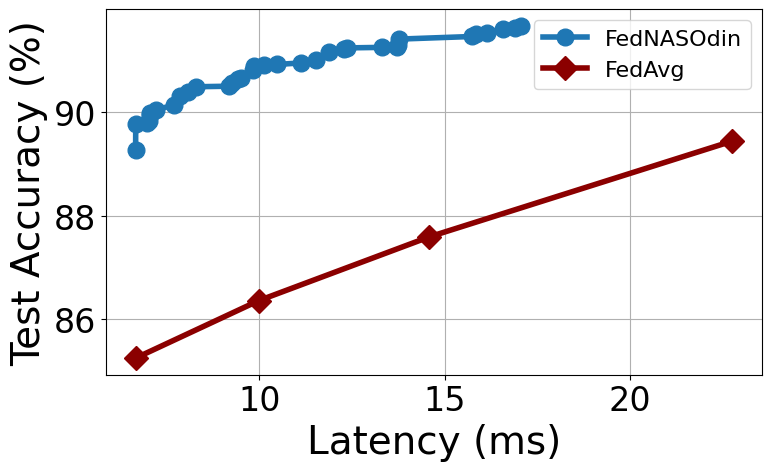

In [35]:
x_pareto = superfed_gpu_pareto_front[:, 0]
y_pareto = superfed_gpu_pareto_front[:, 1]
'''for i in range(len(superfed_gpu_pareto_front)-1):
    x1, y1 = superfed_gpu_pareto_front[i]
    x2, y2 = superfed_gpu_pareto_front[i + 1]
    plt.plot([x1, x2], [y1, y1], color='blue', linestyle='-')  # Horizontal line
    plt.plot([x2, x2], [y1, y2], color='blue', linestyle='-')  # Vertical line'''
plt.plot(x_pareto, y_pareto, marker='o', linestyle='-', label="FedNASOdin")

'''fednas_pareto_x = fednas_gpu_pareto_front[:, 0]
fednas_pareto_y = fednas_gpu_pareto_front[:, 1]
for i in range(len(fednas_gpu_pareto_front)-1):
    x1, y1 = fednas_gpu_pareto_front[i]
    x2, y2 = fednas_gpu_pareto_front[i + 1]
    plt.plot([x1, x2], [y1, y1], color='red', linestyle='-')  # Horizontal line
    plt.plot([x2, x2], [y1, y2], color='red', linestyle='-')  # Vertical line
plt.scatter(fednas_pareto_x, fednas_pareto_y, color='blue', s=75, zorder=2)'''
fedavg_pareto_x = fedavg_gpu_pareto_front[:, 0]
fedavg_pareto_y = fedavg_gpu_pareto_front[:, 1]
'''for i in range(len(fedavg_gpu_pareto_front)-1):
    x1, y1 = fedavg_gpu_pareto_front[i]
    x2, y2 = fedavg_gpu_pareto_front[i + 1]
    plt.plot([x1, x2], [y1, y1], color='red', linestyle='-')  # Horizontal line
    plt.plot([x2, x2], [y1, y2], color='red', linestyle='-')  # Vertical line'''
plt.plot(fedavg_pareto_x, fedavg_pareto_y, marker='D', color='darkred', linestyle='-', label="FedAvg")

fedpnas_pareto_x = []
fedpnas_pareto_y = []

# Add labels and legend
plt.xlabel('Latency (ms)')
plt.ylabel('Test Accuracy (%)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("GPU_NAS_Pareto.pdf")
plt.show()


In [36]:
cpu_pareto_front_df = pd.DataFrame(cpu_pareto_data)
cpu_pareto_front_df.sort_values(0, inplace=True)
superfed_cpu_pareto_front = cpu_pareto_front_df.values
print(superfed_cpu_pareto_front)

[[111.46843573  89.78      ]
 [113.43773212  89.95      ]
 [114.65477487  89.98      ]
 [121.31811725  90.04      ]
 [124.31882899  90.32      ]
 [129.77128038  90.49      ]
 [137.31750837  90.58      ]
 [138.32817916  90.63      ]
 [141.80970574  90.87      ]
 [144.67124362  90.9       ]
 [152.4075673   90.92      ]
 [153.00523471  90.95      ]
 [163.60872826  90.98      ]
 [165.47708493  90.99      ]
 [172.15049118  91.02      ]
 [174.46215227  91.08      ]
 [182.826107    91.17      ]
 [189.82047997  91.22      ]
 [209.64953387  91.31      ]
 [219.66157788  91.36      ]
 [221.69507332  91.37      ]
 [239.83249571  91.41      ]
 [249.13681895  91.47      ]
 [262.12796001  91.47      ]
 [262.73731189  91.53      ]
 [264.65631677  91.62      ]
 [278.3383525   91.64      ]
 [283.55573313  91.67      ]]


In [37]:
cpu_pareto_front_df = pd.DataFrame(fednas_cpu_pareto_data)
cpu_pareto_front_df.sort_values(0, inplace=True)
fednas_cpu_pareto_front = cpu_pareto_front_df.values
print(fednas_cpu_pareto_front)

[[22.47784566 77.33      ]
 [61.4784875  89.43      ]
 [65.57345316 86.41      ]]


In [38]:
cpu_pareto_front_df = pd.DataFrame(fedavg_cpu_pareto_data)
cpu_pareto_front_df.sort_values(0, inplace=True)
fedavg_cpu_pareto_front = cpu_pareto_front_df.values
print(fedavg_cpu_pareto_front)

[[133.02380871  85.25      ]
 [191.0601289   86.36      ]
 [279.65814676  87.59      ]
 [459.16661425  89.44      ]]


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 36 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'L', 'N', 'O', 'S', 'T', 'a', 'c', 'd', 'e', 'eight', 'four', 'g', 'i', 'm', 'n', 'nine', 'nonmarkingreturn', 'one', 'parenleft', 'parenright', 'percent', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 19, 20, 21, 22, 23, 25, 27, 28, 36, 41, 47, 49, 50, 54, 55, 68, 70, 71, 72, 74, 76, 80, 81, 85, 86, 87, 88, 89, 92]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 36 

INFO:fontTools.subset:head subsetting not needed
INFO:fontTools.subset:hhea subsetting not needed
INFO:fontTools.subset:maxp subsetting not needed
INFO:fontTools.subset:OS/2 subsetting not needed
INFO:fontTools.subset:hmtx subsetted
INFO:fontTools.subset:cmap subsetted
INFO:fontTools.subset:fpgm subsetting not needed
INFO:fontTools.subset:prep subsetting not needed
INFO:fontTools.subset:cvt  subsetting not needed
INFO:fontTools.subset:loca subsetting not needed
INFO:fontTools.subset:post subsetted
INFO:fontTools.subset:gasp subsetting not needed
INFO:fontTools.subset:GDEF subsetted
INFO:fontTools.subset:GPOS subsetted
INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:MATH subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GS

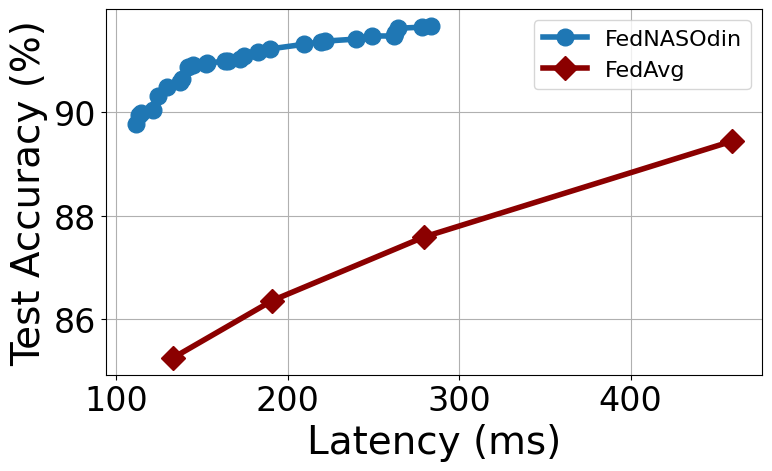

In [39]:
x_pareto = superfed_cpu_pareto_front[:, 0]
y_pareto = superfed_cpu_pareto_front[:, 1]
'''for i in range(len(superfed_gpu_pareto_front)-1):
    x1, y1 = superfed_gpu_pareto_front[i]
    x2, y2 = superfed_gpu_pareto_front[i + 1]
    plt.plot([x1, x2], [y1, y1], color='blue', linestyle='-')  # Horizontal line
    plt.plot([x2, x2], [y1, y2], color='blue', linestyle='-')  # Vertical line'''
plt.plot(x_pareto, y_pareto, marker='o', linestyle='-', label="FedNASOdin")

'''fednas_pareto_x = fednas_gpu_pareto_front[:, 0]
fednas_pareto_y = fednas_gpu_pareto_front[:, 1]
for i in range(len(fednas_gpu_pareto_front)-1):
    x1, y1 = fednas_gpu_pareto_front[i]
    x2, y2 = fednas_gpu_pareto_front[i + 1]
    plt.plot([x1, x2], [y1, y1], color='red', linestyle='-')  # Horizontal line
    plt.plot([x2, x2], [y1, y2], color='red', linestyle='-')  # Vertical line
plt.scatter(fednas_pareto_x, fednas_pareto_y, color='blue', s=75, zorder=2)'''
fedavg_pareto_x = fedavg_cpu_pareto_front[:, 0]
fedavg_pareto_y = fedavg_cpu_pareto_front[:, 1]
'''for i in range(len(fedavg_gpu_pareto_front)-1):
    x1, y1 = fedavg_gpu_pareto_front[i]
    x2, y2 = fedavg_gpu_pareto_front[i + 1]
    plt.plot([x1, x2], [y1, y1], color='red', linestyle='-')  # Horizontal line
    plt.plot([x2, x2], [y1, y2], color='red', linestyle='-')  # Vertical line'''
plt.plot(fedavg_pareto_x, fedavg_pareto_y, marker='D', color='darkred', linestyle='-', label="FedAvg")

fedpnas_pareto_x = []
fedpnas_pareto_y = []

# Add labels and legend
plt.xlabel('Latency (ms)')
plt.ylabel('Test Accuracy (%)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("CPU_NAS_Pareto.pdf")
plt.show()

In [40]:
from fedml_api.standalone.flofa.elastic_nn.ofa_mbv3_large_32x32 import (
     OFAMobileNetV3_32x32,
)
supernet2 = OFAMobileNetV3_32x32()


In [42]:
print(supernet2)
supernet2.set_max_net()

OFAMobileNetV3_32x32(
  (first_conv): ConvLayer(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): Hswish()
  )
  (blocks): ModuleList(
    (0): ResidualBlock(
      (conv): MBConvLayer(
        (depth_conv): Sequential(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU(inplace=True)
        )
        (point_linear): Sequential(
          (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (shortcut): IdentityLayer()
    )
    (1): ResidualBlock(
      (conv): DynamicMBConvLayer(
        (inverted_bottleneck): Sequential(
          (conv): D

In [44]:
acc, gpu_lat = evaluate(supernet2, dataset, gpu_device, skip_test=True)
acc, cpu_lat = evaluate(supernet2, dataset, cpu_device, skip_test=True)
print(gpu_lat, cpu_lat)

12.96866200864315 248.2999495230615


In [63]:
supernet2.set_active_subnet(ks=3, d=[1, 1, 1, 1, 1], e=3)
print(supernet2)

OFAMobileNetV3_32x32(
  (first_conv): ConvLayer(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): Hswish()
  )
  (blocks): ModuleList(
    (0): ResidualBlock(
      (conv): MBConvLayer(
        (depth_conv): Sequential(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU(inplace=True)
        )
        (point_linear): Sequential(
          (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (shortcut): IdentityLayer()
    )
    (1): ResidualBlock(
      (conv): DynamicMBConvLayer(
        (inverted_bottleneck): Sequential(
          (conv): D

In [64]:
acc, gpu_lat = evaluate(supernet2, dataset, gpu_device, skip_test=True)
acc, cpu_lat = evaluate(supernet2, dataset, cpu_device, skip_test=True)
print(gpu_lat, cpu_lat)

3.2091629691421986 20.34545848146081
